# Strain Stock gDNA Sequencing Analysis
## Seq Library: Plasmidsaurus_9-13-2025_HTGS8F


## Steps
1. QC
2. Hybrid assembly (done)
2. Breseq
3. Long read blast analysis
4. Build theoretical reference genome and compare to assembly.
5. (Map)

In [1]:
## Necessary for running locally (Natascha's laptop)
## Make sure running in appropriate environement

import sys

sys.path.append('/Users/nataschaspahr/code/ai_synbio_data_processing')

In [2]:
%load_ext autoreload
%autoreload 2

## Preliminary data organization
- Make short and long reads folder in base dir.
- Sort files into correct folder.
- Delete original folder. 
- Rename files based on LIMS measurement names.

In [3]:
import os

base_dir = '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F'
original = os.path.join(base_dir, 'received_fastq')
long_reads_dir = os.path.join(base_dir, 'long_reads')
short_reads_dir = os.path.join(base_dir, 'short_reads')
os.makedirs(os.path.join(long_reads_dir, 'received'), exist_ok=True)
os.makedirs(os.path.join(short_reads_dir, 'received'), exist_ok=True)

In [4]:
import os
from binfo_utils import create_manifest

manifest = create_manifest(original, platform='plasmidsaurus_hybrid')
manifest

sample_name                                          fwd_fastq  \
16  HTGS8F_10_3210-1  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
13  HTGS8F_11_3210-2  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
17  HTGS8F_12_3210-3  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
10  HTGS8F_13_3560-1  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
2   HTGS8F_14_3560-2  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
1   HTGS8F_15_3560-3  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
0   HTGS8F_16_3575-1  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
5   HTGS8F_17_3575-2  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
25  HTGS8F_18_3575-3  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
24  HTGS8F_19_3577-1  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
15   HTGS8F_1_ADP1-1  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
12  HTGS8F_20_3577-2  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
21  HTGS8F_21_3577-3  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
19  HTGS8F_22_3578-1  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
26  HTGS8F_23_3578-2  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
8   HTGS8F_24_3578-3  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
7   HTGS8F_25_3579-1  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
4   HTGS8F_26_3579-2  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
3   HTGS8F_27_3579-3  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
18   HTGS8F_2_ADP1-2  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
20   HTGS8F_3_ADP1-3  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
11  HTGS8F_4_2853T-1  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
9   HTGS8F_5_2853T-2  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
14  HTGS8F_6_2853T-3  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
6    HTGS8F_7_2853-1  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
23   HTGS8F_8_2853-2  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
22   HTGS8F_9_2853-3  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   

                                       nanopore_fastq  \
16  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
13  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
17  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
10  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
2   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
1   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
0   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
5   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
25  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
24  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
15  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
12  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
21  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
19  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
26  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
8   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
7   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
4   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
3   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
18  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
20  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
11  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
9   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
14  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
6   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
23  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
22  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   

                                            rvs_fastq  
16  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
13  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
17  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
10  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
2   /Users/nataschaspahr/data/s

In [5]:
import shutil

received = os.path.join(short_reads_dir, 'received')

for index, row in manifest.iterrows():
    os.rename(row['fwd_fastq'], os.path.join(received, os.path.basename(row['fwd_fastq'])))
    os.rename(row['rvs_fastq'], os.path.join(received, os.path.basename(row['rvs_fastq'])))
    os.rename(row['nanopore_fastq'], os.path.join(long_reads_dir, 'received', os.path.basename(row['nanopore_fastq'])))
# shutil.rmtree(original)

## Plasmidsaurus assemblies: dgoA copies

In [118]:
import pandas as pd
from binfo_utils import create_manifest

assemblies = os.path.join(base_dir, 'received_assemblies')
assembly_folders = [d for d in os.listdir(assemblies) if os.path.isdir(os.path.join(assemblies, d))]

def count_string_in_file(file_path, string):
    with open(file_path, 'r') as f:
        return f.read().count(string)
    
    
dgoa_string_counts = [
    count_string_in_file(
        os.path.join(
            base_dir,
            'received_assemblies',
            d,
            'ONT-plus-Illumina-polished',
            d+'_polished-reference.gbk',
        ),
        'dgoA'
    )
    for d in assembly_folders
]



In [126]:
frame = pd.DataFrame(list((dict(zip(assembly_folders, dgoa_string_counts)).items())), columns=['sample', 'dgoA count'])
frame['dgoA count'] = frame['dgoA count']/2
frame.sort_values('sample')

sample  dgoA count
19  HTGS8F_10_3210-1         1.0
23  HTGS8F_11_3210-2         1.0
8   HTGS8F_12_3210-3         1.0
16  HTGS8F_13_3560-1         0.0
26  HTGS8F_14_3560-2         0.0
9   HTGS8F_15_3560-3         0.0
13  HTGS8F_16_3575-1         0.0
15  HTGS8F_17_3575-2         0.0
1   HTGS8F_18_3575-3         0.0
10  HTGS8F_19_3577-1         0.0
5    HTGS8F_1_ADP1-1         0.0
14  HTGS8F_20_3577-2         0.0
4   HTGS8F_21_3577-3         0.0
17  HTGS8F_22_3578-1         0.0
21  HTGS8F_23_3578-2         0.0
0   HTGS8F_24_3578-3         0.0
18  HTGS8F_25_3579-1         0.0
24  HTGS8F_26_3579-2         0.0
7   HTGS8F_27_3579-3         0.0
2    HTGS8F_2_ADP1-2         0.0
11   HTGS8F_3_ADP1-3         0.0
3   HTGS8F_4_2853T-1         3.0
12  HTGS8F_5_2853T-2         2.0
22  HTGS8F_6_2853T-3         4.0
25   HTGS8F_7_2853-1         2.0
20   HTGS8F_8_2853-2         1.0
6    HTGS8F_9_2853-3         3.0

## Short reads: QC

In [6]:
import pandas as pd
from binfo_utils import create_manifest

manifest = create_manifest(received, platform='plasmidsaurus_hybrid')
sample_lookup_file = os.path.join(base_dir, 'measurement_filename_mapping.csv')
sample_lookup = pd.read_csv(sample_lookup_file)
sample_lookup = sample_lookup.loc[~sample_lookup['Plasmidsaurus Illumina R1'].isna()]
sample_lookup['Plasmidsaurus Illumina R1'] = received + '/' + sample_lookup['Plasmidsaurus Illumina R1']
sample_lookup['Plasmidsaurus Illumina R2'] = received + '/' + sample_lookup['Plasmidsaurus Illumina R2']
manifest = pd.merge(manifest, sample_lookup, left_on='fwd_fastq', right_on='Plasmidsaurus Illumina R1', how='inner')
for index, row in manifest.iterrows():
    old_fwd_name = row['fwd_fastq']
    new_fwd_name = row['fwd_fastq'].replace(row['sample_name'], row['LIMS Measurement name'])
    os.rename(old_fwd_name, new_fwd_name)
    old_rvs_name = row['rvs_fastq']
    new_rvs_name = row['rvs_fastq'].replace(row['sample_name'], row['LIMS Measurement name'])
    os.rename(old_rvs_name, new_rvs_name)

### QC1

In [10]:
from read_qc import run_fastqc
from binfo_utils import create_manifest

manifest = create_manifest(received, platform='plasmidsaurus_hybrid')


[run_fastqc(f) for f in manifest['fwd_fastq']]
[run_fastqc(f) for f in manifest['rvs_fastq']]

Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN2853.pyruvate.colon

Analysis complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:26:29.161 java[70654:6461893] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN2853.pyruvate.colon

Analysis complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:28:10.229 java[70761:6462773] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN2853.pyruvate.colon

Analysis complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:29:57.518 java[70894:6463854] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN2853_T

Analysis complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:31:11.028 java[71044:6465522] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN2853_T

Analysis complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:33:02.058 java[71133:6466205] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN2853_T

Analysis complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:33:41.058 java[71269:6467344] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3210.pyruvate.colon

Analysis complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:34:59.072 java[71326:6467860] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3210.pyruvate.colon

Analysis complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:36:42.738 java[71519:6469011] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3210.pyruvate.colon

Analysis complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:38:00.179 java[71660:6470239] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3560.colony1.Short_DNA_

Analysis complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:39:01.349 java[71760:6471106] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3560.colony2.Short_DNA_

Analysis complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:40:47.408 java[71857:6472112] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3560.colony3.Short_DNA_

Analysis complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:41:39.845 java[71987:6473350] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3575.colony1.Short_DNA_

Analysis complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:43:09.859 java[72070:6476423] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3575.colony2.Short_DNA_

Analysis complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 16:59:37.228 java[72180:6477526] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3575.colony3.Short_DNA_

Analysis complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 17:01:33.376 java[72290:6479232] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3577.colony1.Short_DNA_

Analysis complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 17:03:15.136 java[72526:6482318] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3577.colony2.Short_DNA_

Analysis complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 17:04:18.849 java[72563:6483370] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3577.colony3.Short_DNA_

Analysis complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 17:04:51.591 java[72592:6484018] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3578.colony1.Short_DNA_

Analysis complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 17:06:07.563 java[72620:6484371] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3578.colony2.Short_DNA_

Analysis complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 17:06:15.487 java[72658:6485512] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3578.colony3.Short_DNA_

Analysis complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 17:08:21.816 java[72660:6485658] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3579.colony1.Short_DNA_

Analysis complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 17:09:54.433 java[72792:6487051] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3579.colony2.Short_DNA_

Analysis complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 17:10:35.767 java[72883:6488852] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ACN3579.colony3.Short_DNA_

Analysis complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 17:11:45.998 java[72907:6489285] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz
Approx 60

Analysis complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 17:12:48.268 java[72941:6490117] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz
Approx 60

Analysis complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 17:13:44.089 java[72971:6490938] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz
application/gzip


Started analysis of ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 5% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 10% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 15% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 20% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 25% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 30% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 35% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 40% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 45% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 50% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 55% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz
Approx 60

Analysis complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1.fastq.gz


2025-09-24 17:15:02.191 java[72999:6491459] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN2853.pyruvate.colon

Analysis complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:16:24.546 java[73035:6492638] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN2853.pyruvate.colon

Analysis complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:18:05.731 java[73073:6493928] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN2853.pyruvate.colon

Analysis complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:19:52.316 java[73133:6495556] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN2853_T

Analysis complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:21:06.150 java[73186:6496878] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN2853_T

Analysis complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:22:58.350 java[73227:6497961] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN2853_T

Analysis complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:23:37.618 java[73383:6499913] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3210.pyruvate.colon

Analysis complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:24:56.500 java[73409:6500353] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3210.pyruvate.colon

Analysis complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:26:38.627 java[73450:6501315] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3210.pyruvate.colon

Analysis complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:27:55.584 java[73505:6502632] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3560.colony1.Short_DNA_

Analysis complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:28:56.000 java[73539:6503735] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3560.colony2.Short_DNA_

Analysis complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:30:41.439 java[73564:6504326] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3560.colony3.Short_DNA_

Analysis complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:31:33.066 java[73616:6505440] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3575.colony1.Short_DNA_

Analysis complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:33:02.188 java[73646:6506249] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3575.colony2.Short_DNA_

Analysis complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:34:32.632 java[73679:6507113] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3575.colony3.Short_DNA_

Analysis complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:36:26.083 java[73729:6508201] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3577.colony1.Short_DNA_

Analysis complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:38:12.073 java[73789:6510544] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3577.colony2.Short_DNA_

Analysis complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:39:20.534 java[73842:6512020] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3577.colony3.Short_DNA_

Analysis complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:39:55.832 java[73958:6513530] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3578.colony1.Short_DNA_

Analysis complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:41:14.318 java[73979:6514011] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3578.colony2.Short_DNA_

Analysis complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:41:22.933 java[74013:6514870] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3578.colony3.Short_DNA_

Analysis complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:43:35.532 java[74016:6515006] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3579.colony1.Short_DNA_

Analysis complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:45:13.601 java[74106:6516548] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3579.colony2.Short_DNA_

Analysis complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:45:57.833 java[74143:6517654] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ACN3579.colony3.Short_DNA_

Analysis complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:47:12.151 java[74165:6518209] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz
Approx 60

Analysis complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:48:19.953 java[74203:6519175] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz
Approx 60

Analysis complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:49:19.679 java[74267:6520436] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz
application/gzip


Started analysis of ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 5% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 10% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 15% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 20% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 25% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 30% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 35% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 40% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 45% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 50% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 55% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz
Approx 60

Analysis complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2.fastq.gz


2025-09-24 17:50:42.190 java[74306:6521210] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [11]:
manifest

sample_name  \
16  ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads   
10  ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads   
4   ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads   
22  ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1....   
5   ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2....   
11  ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3....   
9   ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads   
17  ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads   
26  ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads   
21           ANLstock.ACN3560.colony1.Short_DNA_reads   
6            ANLstock.ACN3560.colony2.Short_DNA_reads   
3            ANLstock.ACN3560.colony3.Short_DNA_reads   
19           ANLstock.ACN3575.colony1.Short_DNA_reads   
7            ANLstock.ACN3575.colony2.Short_DNA_reads   
2            ANLstock.ACN3575.colony3.Short_DNA_reads   
13           ANLstock.ACN3577.colony1.Short_DNA_reads   
15           ANLstock.ACN3577.colony2.Short_DNA_reads   
24           ANLstock.ACN3577.colony3.Short_DNA_reads   
18           ANLstock.ACN3578.colony1.Short_DNA_reads   
8            ANLstock.ACN3578.colony2.Short_DNA_reads   
0            ANLstock.ACN3578.colony3.Short_DNA_reads   
1            ANLstock.ACN3579.colony1.Short_DNA_reads   
25           ANLstock.ACN3579.colony2.Short_DNA_reads   
20           ANLstock.ACN3579.colony3.Short_DNA_reads   
12              ANLstock.ADP1.colony1.Short_DNA_reads   
14              ANLstock.ADP1.colony2.Short_DNA_reads   
23              ANLstock.ADP1.colony3.Short_DNA_reads   

                                            fwd_fastq  \
16  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
10  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
4   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
22  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
5   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
11  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
9   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
17  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
26  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
21  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
6   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
3   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
19  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
7   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
2   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
13  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
15  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
24  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
18  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
8   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
0   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
1   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
25  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
20  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
12  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
14  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
23  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   

                                            rvs_fastq  
16  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
10  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
4   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
22  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
5   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
11  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
9   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
17  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
26  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
21  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
6   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
3   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
19  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
7   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
2   /Use

### Trimming

In [12]:
import subprocess
from binfo_utils import create_manifest

trimmed = os.path.join(short_reads_dir, 'trimmed')
os.makedirs(trimmed, exist_ok=True)

manifest = create_manifest(received, platform='plasmidsaurus_hybrid')

for index, row in manifest.iterrows():

    read1 = str(os.path.basename(row['fwd_fastq'])).replace('.fastq.gz', '_trimmed.fastq.gz') 
    read2 = str(os.path.basename(row['rvs_fastq'])).replace('.fastq.gz', '_trimmed.fastq.gz')
    sample_name = row['sample_name']
    
    cutadapt_cmd = [
        'cutadapt',
        '-j', '10',
        '-q', '15, 15',  # quality cut-off, trimmed from both reads
        '-A', 'G{10}',  # fastQC indicated poly-G in read 2
        '--revcomp',
        '--minimum-length',  '20',
        '-o', os.path.join(trimmed, read1),
        '-p', os.path.join(trimmed, read2),
        row['fwd_fastq'],
        row['rvs_fastq'],
        f'--json={sample_name}.cutadapt.json'
    ]

    subprocess.run(cutadapt_cmd, check=True, cwd=trimmed)

This is cutadapt 5.1 with Python 3.12.9
Command line parameters: -j 10 -q 15, 15 -A G{10} --revcomp --minimum-length 20 -o /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz -p /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/received/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2.fastq.gz --json=ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads.cutadapt.json
Processing paired-end reads on 10 cores ...

=== Summary ===

Total read pairs processed:         23,250,157
  Read 2 with adapter:                 859,470 (

### QC2

In [13]:
from read_qc import run_fastqc
from binfo_utils import create_manifest

manifest = create_manifest(trimmed, platform='plasmidsaurus_hybrid')

[run_fastqc(f) for f in manifest['fwd_fastq']]
[run_fastqc(f) for f in manifest['rvs_fastq']]

Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illu

Analysis complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:23:28.108 java[76095:6551179] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illu

Analysis complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:25:06.457 java[76167:6552134] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illu

Analysis complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:26:50.618 java[76219:6553242] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads

Analysis complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:28:03.047 java[76287:6554885] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads

Analysis complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:29:51.287 java[76321:6555637] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads

Analysis complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:30:28.814 java[76449:6557202] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illu

Analysis complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:31:47.150 java[76464:6557651] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illu

Analysis complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:33:28.174 java[76561:6558774] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illu

Analysis complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:34:44.263 java[76654:6560024] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_

Analysis complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:35:44.023 java[76764:6561101] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_

Analysis complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:37:30.697 java[76846:6561980] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_

Analysis complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:38:20.283 java[76894:6563315] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_

Analysis complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:39:48.712 java[76938:6564365] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_

Analysis complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:41:19.893 java[77038:6565678] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_

Analysis complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:43:14.884 java[77152:6566912] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_

Analysis complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:45:00.623 java[77357:6568969] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_

Analysis complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:46:09.549 java[77492:6570305] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_

Analysis complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:46:43.987 java[77583:6571140] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_

Analysis complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:48:03.078 java[77611:6571672] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_

Analysis complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:48:11.852 java[77770:6574297] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_

Analysis complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:50:20.202 java[77773:6574491] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_

Analysis complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:51:54.112 java[77854:6577085] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_

Analysis complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:52:35.802 java[77906:6578512] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_

Analysis complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:53:46.955 java[77923:6579145] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Appr

Analysis complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:54:50.771 java[77968:6580166] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Appr

Analysis complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:55:47.865 java[78001:6581081] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 5% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 10% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 15% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 20% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 25% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 30% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 35% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 40% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 45% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Approx 50% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz
Appr

Analysis complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz


2025-09-24 18:57:05.764 java[78062:6582359] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illu

Analysis complete for ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 18:58:28.814 java[78101:6583543] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illu

Analysis complete for ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:00:08.199 java[78130:6584703] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illu

Analysis complete for ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:17:38.131 java[78185:6585876] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads

Analysis complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:18:46.607 java[78400:6588551] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads

Analysis complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:20:33.325 java[78431:6589275] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads

Analysis complete for ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:21:10.829 java[78564:6590559] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illu

Analysis complete for ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:22:27.466 java[78579:6591012] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illu

Analysis complete for ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:24:07.573 java[78650:6592013] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illu

Analysis complete for ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:25:21.158 java[78687:6593056] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3560.colony1.Short_DNA_reads_

Analysis complete for ANLstock.ACN3560.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:26:20.802 java[78716:6593812] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3560.colony2.Short_DNA_reads_

Analysis complete for ANLstock.ACN3560.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:28:04.503 java[78745:6594598] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3560.colony3.Short_DNA_reads_

Analysis complete for ANLstock.ACN3560.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:29:52.321 java[78818:6595913] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3575.colony1.Short_DNA_reads_

Analysis complete for ANLstock.ACN3575.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:31:19.439 java[78868:6597031] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3575.colony2.Short_DNA_reads_

Analysis complete for ANLstock.ACN3575.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:34:03.104 java[78904:6597914] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3575.colony3.Short_DNA_reads_

Analysis complete for ANLstock.ACN3575.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:36:14.755 java[79005:6599851] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3577.colony1.Short_DNA_reads_

Analysis complete for ANLstock.ACN3577.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:38:17.861 java[79154:6601534] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3577.colony2.Short_DNA_reads_

Analysis complete for ANLstock.ACN3577.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:39:37.562 java[79226:6603096] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3577.colony3.Short_DNA_reads_

Analysis complete for ANLstock.ACN3577.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:40:17.527 java[79268:6603970] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3578.colony1.Short_DNA_reads_

Analysis complete for ANLstock.ACN3578.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:41:48.496 java[79280:6604435] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3578.colony2.Short_DNA_reads_

Analysis complete for ANLstock.ACN3578.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:41:59.111 java[79324:6605516] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3578.colony3.Short_DNA_reads_

Analysis complete for ANLstock.ACN3578.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:44:29.626 java[79333:6605681] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3579.colony1.Short_DNA_reads_

Analysis complete for ANLstock.ACN3579.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:46:17.080 java[79409:6607369] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3579.colony2.Short_DNA_reads_

Analysis complete for ANLstock.ACN3579.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:47:05.231 java[79455:6608668] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ACN3579.colony3.Short_DNA_reads_

Analysis complete for ANLstock.ACN3579.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:48:24.235 java[79483:6609282] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Appr

Analysis complete for ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:49:35.236 java[79535:6610321] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Appr

Analysis complete for ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:50:38.079 java[79574:6611102] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


Running FastQC on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
application/gzip


Started analysis of ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 5% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 10% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 15% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 20% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 25% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 30% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 35% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 40% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 45% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Approx 50% complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz
Appr

Analysis complete for ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz


2025-09-24 19:52:03.119 java[79600:6611698] [JRSAppKitAWT markAppIsDaemon] failed. SetApplicationIsDaemon returned -50


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Short reads: Breseq

In [41]:
## Only running rest of analysis over the dgoA and ADP1 samples

manifest = create_manifest(trimmed, platform='plasmidsaurus_hybrid')
sample_indexes = [0,1,2,3,4,5,6,7,8,24,25,26]
manifest = manifest.iloc[sample_indexes]
manifest

sample_name  \
11  ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads   
23  ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads   
18  ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads   
16  ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1....   
5   ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2....   
10  ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3....   
24  ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads   
9   ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads   
4   ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads   
14              ANLstock.ADP1.colony1.Short_DNA_reads   
6               ANLstock.ADP1.colony2.Short_DNA_reads   
8               ANLstock.ADP1.colony3.Short_DNA_reads   

                                            rvs_fastq  \
11  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
23  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
18  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
16  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
5   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
10  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
24  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
9   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
4   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
14  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
6   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
8   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   

                                            fwd_fastq  
11  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
23  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
18  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
16  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
5   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
10  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
24  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
9   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
4   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
14  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
6   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
8   /Users/nataschaspahr/data/seq_data/Plasmidsaur...

In [42]:
manifest['ref_gbk'] = ['/Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoAEcoli_NSS_dgoAasGene.gbk']*6 + \
    ['/Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoABest_NSS_dgoAasGene.gbk']*3 + \
    ['/Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk']*3
manifest['rpoA_locus_ACN2821'] = ['NC_005966:3122573-3123580']*9 + [None]*3
manifest['rpoA_locus_ADP1Neidle'] = [None]*9 + ['NC_005966:3121923-3122930']*3
manifest['dgoA_locus_ACN2821'] = ['NC_005966:1678034-1682709']*9 + [None]*3

In [43]:
manifest

sample_name  \
11  ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads   
23  ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads   
18  ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads   
16  ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1....   
5   ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2....   
10  ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3....   
24  ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads   
9   ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads   
4   ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads   
14              ANLstock.ADP1.colony1.Short_DNA_reads   
6               ANLstock.ADP1.colony2.Short_DNA_reads   
8               ANLstock.ADP1.colony3.Short_DNA_reads   

                                            rvs_fastq  \
11  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
23  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
18  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
16  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
5   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
10  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
24  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
9   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
4   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
14  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
6   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
8   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   

                                            fwd_fastq  \
11  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
23  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
18  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
16  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
5   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
10  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
24  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
9   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
4   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
14  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
6   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
8   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   

                                              ref_gbk  \
11  /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
23  /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
18  /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
16  /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
5   /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
10  /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
24  /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
9   /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
4   /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
14  /Users/nataschaspahr/Reference_DBs/genomes/ADP...   
6   /Users/nataschaspahr/Reference_DBs/genomes/ADP...   
8   /Users/nataschaspahr/Reference_DBs/genomes/ADP...   

           rpoA_locus_ACN2821      rpoA_locus_ADP1Neidle  \
11  NC_005966:3122573-3123580                       None   
23  NC_005966:3122573-3123580                       None   
18  NC_005966:3122573-3123580                       None   
16  NC_005966:3122573-3123580                       None   
5   NC_005966:3122573-3123580                       None   
10  NC_005966:3122573-3123580                       None   
24  NC_005966:3122573-3123580                       None   
9   NC_005966:3122573-3123580                       None   
4   NC_005966:3122573-3123580                       None   
14                       None  NC_005966:3121923-3122930   
6                        None  NC_005966:3121923-3122930   
8                        None  NC_005966:3121923-3122930   

           dgoA_locus_ACN2821  
11  NC_005966:1678034-1682709  
23  NC_005966:1678034-1682709  
18  NC_005966:1678034-1682709  
16  NC_005966:1678034-1682709  
5   NC_005966:1678034-1682709  
10  NC_005966:1678034-1682709  
24  NC_005966:1678034-1682709  
9   NC_005966:1678034-1682709  
4   N

In [20]:
from binfo_utils import create_manifest
import os

base_dir = '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F'
original = os.path.join(base_dir, 'received_fastq')
long_reads_dir = os.path.join(base_dir, 'long_reads')
short_reads_dir = os.path.join(base_dir, 'short_reads')
received = os.path.join(short_reads_dir, 'received')
trimmed = os.path.join(short_reads_dir, 'trimmed')
# manifest = create_manifest(trimmed, platform='plasmidsaurus_hybrid')

### Breseq

In [21]:
from breseq import run_breseq
import os

breseq = os.path.join(short_reads_dir, 'breseq')
os.makedirs(breseq, exist_ok=True)

for _, row in manifest.iterrows():
    sample_dir = os.path.join(breseq, row['sample_name'])
    os.makedirs(sample_dir, exist_ok=True)
    run_breseq(row['ref_gbk'], sample_dir, row['fwd_fastq'], row['rvs_fastq'], polymorphism_prediction=True, fold_coverage=300)

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoAEcoli_NSS_dgoAasGene.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads -j 10 --polymorphism-prediction --limit-fold-coverage 300


breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoAEcoli_NSS_dgoAasGene.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads -j 10 --polymorphism-prediction --limit-fold-coverage 300


breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoAEcoli_NSS_dgoAasGene.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads -j 10 --polymorphism-prediction --limit-fold-coverage 300


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
----------------------------------> WARNING <-----------------------------------
Length assigned to sequence 'NC_005966' from LOCUS line (3599271) does not match length previously assigned from source feature (1680319). The larger of the two lengths will be used. If you encounter further errors, make sure LOCUS lengths match the true lengths of your DNA sequences.
--------------------------------------------------------------------------------
----------------------------------> WARNING <----------------------------------

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoAEcoli_NSS_dgoAasGene.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads -j 10 --polymorphism-prediction --limit-fold-coverage 300


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
----------------------------------> WARNING <-----------------------------------
Length assigned to sequence 'NC_005966' from LOCUS line (3599271) does not match length previously assigned from source feature (1680319). The larger of the two lengths will be used. If you encounter further errors, make sure LOCUS lengths match the true lengths of your DNA sequences.
--------------------------------------------------------------------------------
----------------------------------> WARNING <----------------------------------

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoAEcoli_NSS_dgoAasGene.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads -j 10 --polymorphism-prediction --limit-fold-coverage 300


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
----------------------------------> WARNING <-----------------------------------
Length assigned to sequence 'NC_005966' from LOCUS line (3599271) does not match length previously assigned from source feature (1680319). The larger of the two lengths will be used. If you encounter further errors, make sure LOCUS lengths match the true lengths of your DNA sequences.
--------------------------------------------------------------------------------
----------------------------------> WARNING <----------------------------------

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoAEcoli_NSS_dgoAasGene.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads -j 10 --polymorphism-prediction --limit-fold-coverage 300


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
----------------------------------> WARNING <-----------------------------------
Length assigned to sequence 'NC_005966' from LOCUS line (3599271) does not match length previously assigned from source feature (1680319). The larger of the two lengths will be used. If you encounter further errors, make sure LOCUS lengths match the true lengths of your DNA sequences.
--------------------------------------------------------------------------------
----------------------------------> WARNING <----------------------------------

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoABest_NSS_dgoAasGene.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads -j 10 --polymorphism-prediction --limit-fold-coverage 300


breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoABest_NSS_dgoAasGene.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads -j 10 --polymorphism-prediction --limit-fold-coverage 300


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
----------------------------------> WARNING <-----------------------------------
Length assigned to sequence 'NC_005966' from LOCUS line (3599289) does not match length previously assigned from source feature (1873708). The larger of the two lengths will be used. If you encounter further errors, make sure LOCUS lengths match the true lengths of your DNA sequences.
--------------------------------------------------------------------------------
----------------------------------> WARNING <----------------------------------

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoABest_NSS_dgoAasGene.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads -j 10 --polymorphism-prediction --limit-fold-coverage 300


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
----------------------------------> WARNING <-----------------------------------
Length assigned to sequence 'NC_005966' from LOCUS line (3599289) does not match length previously assigned from source feature (1873708). The larger of the two lengths will be used. If you encounter further errors, make sure LOCUS lengths match the true lengths of your DNA sequences.
--------------------------------------------------------------------------------
----------------------------------> WARNING <----------------------------------

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/ANLstock.ADP1.colony1.Short_DNA_reads -j 10 --polymorphism-prediction --limit-fold-coverage 300


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R1_trimmed
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 17935612 bases: 2707509872
    Filtered reads: 10783932 bases: 1627919702 (coverage limit option)
    Filtered reads:       26 bases:       3816 (≥90.0% same base)
    Analyzed reads:  7151654 bases: 1079586354
  READ FILE::ANLstock.ADP1.colony1.Short_DNA_reads_illumina_R2_trimmed
  ::SKIPPED DUE TO REACHING COVERAGE LIMIT::
  ::TOTAL:

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ADP1.colony2.Short_DNA_reads_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/ANLstock.ADP1.colony2.Short_DNA_reads -j 10 --polymorphism-prediction --limit-fold-coverage 300


breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed.fastq.gz /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/trimmed/ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed.fastq.gz --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/ANLstock.ADP1.colony3.Short_DNA_reads -j 10 --polymorphism-prediction --limit-fold-coverage 300


---> bowtie2  :: version 2.5.4 [/opt/anaconda3/envs/bre_env/bin/bowtie2]
---> bowtie2  :: NOTE :: breseq output may vary slightly depending on your bowtie2 version,
---> bowtie2  :: NOTE :: and occasionally bowtie2 versions may have bugs that cause crashes.
---> bowtie2  :: NOTE :: bowtie2 version 2.4.5 is recommended with this breseq version.
---> R        :: version 4.4.2 [/opt/anaconda3/envs/bre_env/bin/R]
+++   NOW PROCESSING Read and reference sequence file input
  READ FILE::ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R1_trimmed
    Converting/filtering FASTQ file...
    Original base quality format: SANGER New format: SANGER
    Original reads: 21960578 bases: 3315195854
    Filtered reads: 14809091 bases: 2235607523 (coverage limit option)
    Filtered reads:       13 bases:       1912 (≥90.0% same base)
    Analyzed reads:  7151474 bases: 1079586419
  READ FILE::ANLstock.ADP1.colony3.Short_DNA_reads_illumina_R2_trimmed
  ::SKIPPED DUE TO REACHING COVERAGE LIMIT::
  ::TOTAL:

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

### Amplicon copy number from coverage

In [46]:
from breseq import parse_region_average_cov_from_file, run_bam2cov


manifest['rpoA_cov'] = [None]*12
manifest['dgoA_cov'] = [None]*12

manifest.loc[manifest.index[:9],'rpoA_cov'] = [
    parse_region_average_cov_from_file(
        run_bam2cov(
            os.path.join(breseq, row['sample_name']),
            row['rpoA_locus_ACN2821']))
    for _, row in manifest.iloc[:9].iterrows()
]

manifest.loc[manifest.index[:9],'dgoA_cov'] = [
    parse_region_average_cov_from_file(
        run_bam2cov(
            os.path.join(breseq, row['sample_name']),
            row['dgoA_locus_ACN2821']))
    for _, row in manifest.iloc[:9].iterrows()
]

breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

In [48]:
manifest['dgoA_rpoA_ratio'] = manifest['dgoA_cov'] / manifest['rpoA_cov']
manifest

sample_name  \
11  ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads   
23  ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads   
18  ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads   
16  ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1....   
5   ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2....   
10  ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3....   
24  ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads   
9   ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads   
4   ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads   
14              ANLstock.ADP1.colony1.Short_DNA_reads   
6               ANLstock.ADP1.colony2.Short_DNA_reads   
8               ANLstock.ADP1.colony3.Short_DNA_reads   

                                            rvs_fastq  \
11  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
23  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
18  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
16  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
5   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
10  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
24  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
9   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
4   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
14  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
6   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
8   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   

                                            fwd_fastq  \
11  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
23  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
18  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
16  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
5   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
10  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
24  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
9   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
4   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
14  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
6   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
8   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   

                                              ref_gbk  \
11  /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
23  /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
18  /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
16  /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
5   /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
10  /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
24  /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
9   /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
4   /Users/nataschaspahr/Reference_DBs/genomes/ACN...   
14  /Users/nataschaspahr/Reference_DBs/genomes/ADP...   
6   /Users/nataschaspahr/Reference_DBs/genomes/ADP...   
8   /Users/nataschaspahr/Reference_DBs/genomes/ADP...   

           rpoA_locus_ACN2821      rpoA_locus_ADP1Neidle  \
11  NC_005966:3122573-3123580                       None   
23  NC_005966:3122573-3123580                       None   
18  NC_005966:3122573-3123580                       None   
16  NC_005966:3122573-3123580                       None   
5   NC_005966:3122573-3123580                       None   
10  NC_005966:3122573-3123580                       None   
24  NC_005966:3122573-3123580                       None   
9   NC_005966:3122573-3123580                       None   
4   NC_005966:3122573-3123580                       None   
14                       None  NC_005966:3121923-3122930   
6                        None  NC_005966:3121923-3122930   
8                        None  NC_005966:3121923-3122930   

           dgoA_locus_ACN2821 rpoA_cov dgoA_cov dgoA_rpoA_ratio  
11  NC_005966:1678034-1682709  303.701  14203.7       46.768697  
23  NC_005966:1678034-1682709    307.6  13701.3       44.542588  
18  NC_005966:1678034-1682709  296.658  12431.1       41.903808  
16  NC_005966:1678034-1682709

In [94]:
pd.set_option('display.max_colwidth', None)
manifest[['sample_name', 'rpoA_cov', 'dgoA_cov', 'dgoA_rpoA_ratio']]


sample_name rpoA_cov  \
0               ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads  303.701   
1               ANLstock.ACN2853.pyruvate.colony2.Short_DNA_reads    307.6   
2               ANLstock.ACN2853.pyruvate.colony3.Short_DNA_reads  296.658   
3   ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Short_DNA_reads  313.506   
4   ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Short_DNA_reads  289.653   
5   ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Short_DNA_reads  293.169   
6               ANLstock.ACN3210.pyruvate.colony1.Short_DNA_reads  300.945   
7               ANLstock.ACN3210.pyruvate.colony2.Short_DNA_reads   301.08   
8               ANLstock.ACN3210.pyruvate.colony3.Short_DNA_reads  282.421   
9                           ANLstock.ADP1.colony1.Short_DNA_reads     None   
10                          ANLstock.ADP1.colony2.Short_DNA_reads     None   
11                          ANLstock.ADP1.colony3.Short_DNA_reads     None   

   dgoA_cov dgoA_rpoA_ratio  
0   14203.7       46.768697  
1   13701.3       44.542588  
2   12431.1       41.903808  
3   3499.03       11.160967  
4   10942.3       37.777271  
5   13440.6       45.845911  
6   220.707         0.73338  
7   226.609        0.752654  
8    225.63        0.798914  
9      None             NaN  
10     None             NaN  
11     None             NaN

### Comparison tables

In [53]:
manifest.reset_index(drop=True, inplace=True)

In [90]:
# Before doing the genome diff file comparison, must rename files so that they are named correctly in the html output
# Also, must replace '.' in file names, else everything after '.' is discarded

import shutil

compare = os.path.join(breseq, 'compare')
os.makedirs(compare, exist_ok=True)

samples = manifest['sample_name'].to_list()

for sample in samples:
    old_gd_path = os.path.join(breseq, sample, 'data/output.gd')
    new_gd_path = os.path.join(breseq, compare, f'{sample.replace('.', '_')}.gd')
    shutil.copy(old_gd_path, new_gd_path)

In [91]:
from breseq import compare_gdiff

gdiffs_2853 = [os.path.join(compare, (x.replace('.', '_') + '.gd')) for x in manifest.iloc[:6]['sample_name']]
gdiffs_3210 = [os.path.join(compare, (x.replace('.', '_') + '.gd')) for x in manifest.iloc[6:9]['sample_name']]
gdiffs_ADP1 = [os.path.join(compare, (x.replace('.', '_') + '.gd')) for x in manifest.iloc[9:]['sample_name']]

compare_gdiff(
    '/Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoAEcoli_NSS_dgoAasGene.gbk',
    os.path.join(compare, '2853_colonies_comparison.html'),
    gdiffs_2853
)

compare_gdiff(
    '/Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoABest_NSS_dgoAasGene.gbk',
    os.path.join(compare, '3210_colonies_comparison.html'),
    gdiffs_3210
)

compare_gdiff(
    '/Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk',
    os.path.join(compare, 'ADP1_colonies_comparison.html'),
    gdiffs_ADP1
)

# # And again, in table format for Excel

# format = 'CSV'

# compare_gdiff(
#     '/Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoAEcoli_NSS_dgoAasGene.gbk',
#     os.path.join(compare, '2853_colonies_comparison.txt'),
#     gdiffs_2853,
#     format=format
# )

# compare_gdiff(
#     '/Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoABest_NSS_dgoAasGene.gbk',
#     os.path.join(compare, '3210_colonies_comparison.txt'),
#     gdiffs_3210,
#     format=format
# )

# compare_gdiff(
#     '/Users/nataschaspahr/Reference_DBs/genomes/ADP1_Neidle_CDM.gbk',
#     os.path.join(compare, 'ADP1_colonies_comparison.txt'),
#     gdiffs_ADP1,
#     format=format
# )

breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

'/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/compare/ADP1_colonies_comparison.html'

In [89]:
pd.read_csv('/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/compare/2853_colonies_comparison.txt')

aa_new_seq  aa_position aa_ref_seq  clone codon_new_seq  codon_number  \
0             S        384.0          G    NaN           AGT         384.0   
1             I        161.0          V    NaN           ATT         161.0   
2           NaN          NaN        NaN    NaN           NaN           NaN   
3             V         11.0          V    NaN           GTT          11.0   
4             T        183.0          A    NaN           ACC         183.0   
...         ...          ...        ...    ...           ...           ...   
1413          L         21.0          L    NaN           TTG          21.0   
1414          G         13.0          G    NaN           GGA          13.0   
1415          S          7.0          G    NaN           AGC           7.0   
1416          T          1.0          M    NaN           ACG           1.0   
1417          H        143.0          R    NaN           CAC         143.0   

      codon_position  codon_position_is_indeterminate codon_ref_seq  \
0                1.0                              NaN           GGT   
1                1.0                              NaN           GTT   
2                NaN                              NaN           NaN   
3                3.0                              NaN           GTC   
4                1.0                              NaN           GCC   
...              ...                              ...           ...   
1413             3.0                              NaN           TTA   
1414             3.0                              NaN           GGG   
1415             1.0                              NaN           GGC   
1416             2.0                              NaN           ATG   
1417             2.0                              NaN           CGC   

      frequency  ... repeat_ref_copies repeat_seq     seq_id size  \
0      1.000000  ...               NaN        NaN  NC_005966  NaN   
1      1.000000  ...               NaN        NaN  NC_005966  NaN   
2      1.000000  ...               NaN        NaN  NC_005966  NaN   
3      1.000000  ...               NaN        NaN  NC_005966  NaN   
4      1.000000  ...               NaN        NaN  NC_005966  NaN   
...         ...  ...               ...        ...        ...  ...   
1413   0.308410  ...               NaN        NaN  NC_005966  NaN   
1414   0.229494  ...               NaN        NaN  NC_005966  NaN   
1415   0.190601  ...               NaN        NaN  NC_005966  NaN   
1416   0.118859  ...               NaN        NaN  NC_005966  NaN   
1417   1.000000  ...               NaN        NaN  NC_005966  NaN   

           snp_type time                                              title  \
0     nonsynonymous   -1  ANLstock_ACN2853_pyruvate_colony1_Short_DNA_re...   
1     nonsynonymous   -1  ANLstock_ACN2853_pyruvate_colony1_Short_DNA_re...   
2               NaN   -1  ANLstock_ACN2853_pyruvate_colony1_Short_DNA_re...   
3        synonymous   -1  ANLstock_ACN2853_pyruvate_colony1_Short_DNA_re...   
4     nonsynonymous   -1  ANLstock_ACN2853_pyruvate_colony1_Short_DNA_re...   
...             ...  ...                                                ...   
1413     synonymous   -1  ANLstock_ACN2853_T_dgoA-Best_pyruvate_colony3_...   
1414     synonymous   -1  ANLstock_ACN2853_T_dgoA-Best_pyruvate_colony3_...   
1415  nonsynonymous   -1  ANLstock_ACN2853_T_dgoA-Best_pyruvate_colony3_...   
1416  nonsynonymous   -1  ANLstock_ACN2853_T_dgoA-Best_pyruvate_colony3_...   
1417  nonsynonymous   -1  ANLstock_ACN2853_T_dgoA-Best_pyruvate_colony3_...   

      transl_table treatment type  
0             11.0       NaN  SNP  
1             11.0       NaN  SNP  
2              NaN       NaN  INS  
3             11.0       NaN  SNP  
4             11.0       NaN  SNP  
...            ...       ...  ...  
1413          11.0       NaN  SNP  
1414          11.0       NaN  SNP  
1415          11.0       NaN  SNP  
1416          11.0       NaN  SNP  
1417          11.0       NaN  SNP  

[141

## Long Reads: QC

In [ ]:
## Running nanocomp (have to activate nanocomp_env first. Some incompatibility with tool in bre_env)

In [1]:
## Necessary for running locally (Natascha's laptop)
## Make sure running in appropriate environement

import sys

sys.path.append('/Users/nataschaspahr/code/ai_synbio_data_processing')

In [2]:
%load_ext autoreload
%autoreload 2

In [7]:
import os

base_dir = '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F'
original = os.path.join(base_dir, 'received_fastq')
long_reads_dir = os.path.join(base_dir, 'long_reads')
short_reads_dir = os.path.join(base_dir, 'short_reads')
os.makedirs(os.path.join(long_reads_dir, 'received'), exist_ok=True)
os.makedirs(os.path.join(short_reads_dir, 'received'), exist_ok=True)

In [8]:
import pandas as pd
from binfo_utils import create_manifest

received = os.path.join(long_reads_dir, 'received')
manifest = create_manifest(received, platform='plasmidsaurus_hybrid')
sample_lookup_file = os.path.join(base_dir, 'measurement_filename_mapping.csv')
sample_lookup = pd.read_csv(sample_lookup_file)
sample_lookup = sample_lookup.loc[~sample_lookup['Plasmidsaurus Nanopore'].isna()]
sample_lookup['Plasmidsaurus Nanopore'] = received + '/' + sample_lookup['Plasmidsaurus Nanopore']
manifest = pd.merge(manifest, sample_lookup, left_on='nanopore_fastq', right_on='Plasmidsaurus Nanopore', how='inner')

In [9]:
for index, row in manifest.iterrows():
    old_fwd_name = row['nanopore_fastq']
    new_fwd_name = row['nanopore_fastq'].replace(row['sample_name'], row['LIMS Measurement name'])
    os.rename(old_fwd_name, new_fwd_name)

In [10]:
manifest = create_manifest(received, platform='plasmidsaurus_hybrid')
manifest

sample_name  \
22   ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads   
17   ANLstock.ACN2853.pyruvate.colony2.Long_DNA_reads   
2    ANLstock.ACN2853.pyruvate.colony3.Long_DNA_reads   
24  ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1....   
16  ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2....   
0   ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3....   
9    ANLstock.ACN3210.pyruvate.colony1.Long_DNA_reads   
1    ANLstock.ACN3210.pyruvate.colony2.Long_DNA_reads   
19   ANLstock.ACN3210.pyruvate.colony3.Long_DNA_reads   
4             ANLstock.ACN3560.colony1.Long_DNA_reads   
10            ANLstock.ACN3560.colony2.Long_DNA_reads   
20            ANLstock.ACN3560.colony3.Long_DNA_reads   
15            ANLstock.ACN3575.colony1.Long_DNA_reads   
21            ANLstock.ACN3575.colony2.Long_DNA_reads   
12            ANLstock.ACN3575.colony3.Long_DNA_reads   
11            ANLstock.ACN3577.colony1.Long_DNA_reads   
3             ANLstock.ACN3577.colony2.Long_DNA_reads   
14            ANLstock.ACN3577.colony3.Long_DNA_reads   
5             ANLstock.ACN3578.colony1.Long_DNA_reads   
6             ANLstock.ACN3578.colony2.Long_DNA_reads   
26            ANLstock.ACN3578.colony3.Long_DNA_reads   
13            ANLstock.ACN3579.colony1.Long_DNA_reads   
25            ANLstock.ACN3579.colony2.Long_DNA_reads   
7             ANLstock.ACN3579.colony3.Long_DNA_reads   
18               ANLstock.ADP1.colony1.Long_DNA_reads   
23               ANLstock.ADP1.colony2.Long_DNA_reads   
8                ANLstock.ADP1.colony3.Long_DNA_reads   

                                       nanopore_fastq  
22  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
17  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
2   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
24  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
16  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
0   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
9   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
1   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
19  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
4   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
10  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
20  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
15  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
21  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
12  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
11  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
3   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
14  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
5   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
6   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
26  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
13  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
25  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
7   /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
18  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
23  /Users/nataschaspahr/data/seq_data/Plasmidsaur...  
8   /Users/nataschaspahr/data/seq_data/Plasmidsaur...

In [11]:
from read_qc import run_nanocomp

manifest = create_manifest(received, platform='plasmidsaurus_hybrid')

run_nanocomp(
    manifest['nanopore_fastq'].to_list(),
    manifest['sample_name'].to_list(),
    os.path.join(received, 'nanocomp_reports'),
    threads=10)

In [13]:
from read_qc import run_filtlong

filtered = os.path.join(long_reads_dir, 'filtered')
os.makedirs(filtered, exist_ok=True)

[run_filtlong(f, filtered, min_length=1000, keep_percent=90) for f in manifest['nanopore_fastq']]

Running filtlong on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/received/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads_nanopore.fastq.gz, output will be saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/filtered
Running filtlong on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/received/ANLstock.ACN2853.pyruvate.colony2.Long_DNA_reads_nanopore.fastq.gz, output will be saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/filtered
Running filtlong on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/received/ANLstock.ACN2853.pyruvate.colony3.Long_DNA_reads_nanopore.fastq.gz, output will be saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/filtered
Running filtlong on /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/received/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colo

['/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/filtered/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads_nanopore_filtered.fastq.gz',
 '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/filtered/ANLstock.ACN2853.pyruvate.colony2.Long_DNA_reads_nanopore_filtered.fastq.gz',
 '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/filtered/ANLstock.ACN2853.pyruvate.colony3.Long_DNA_reads_nanopore_filtered.fastq.gz',
 '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/filtered/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Long_DNA_reads_nanopore_filtered.fastq.gz',
 '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/filtered/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Long_DNA_reads_nanopore_filtered.fastq.gz',
 '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/filtered/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3.Long_DNA_rea

In [14]:
from read_qc import run_nanocomp

manifest = create_manifest(filtered, platform='plasmidsaurus_hybrid')

run_nanocomp(
    manifest['nanopore_fastq'].to_list(),
    manifest['sample_name'].to_list(),
    os.path.join(filtered, 'nanocomp_reports'),
    threads=10)

**Long read QC observation:**
After qual filtering, the N50 for this sample is less than half that of the samples from ALE1b (11-14 vs 26-37 kb). Same filtering setting were used.


## Long reads: Blast analysis

In [ ]:
# Activate blast_env

In [1]:
## Necessary for running locally (Natascha's laptop)
## Make sure running in appropriate environement

import sys

sys.path.append('/Users/nataschaspahr/code/ai_synbio_data_processing')

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
import os
from blast import make_blast_db

fasta = '/Users/nataschaspahr/Reference_DBs/blast/ADP1_Neidle_dgoA_flanks/ADP1_Neidle_dgoA_flanks.fasta'
blast_db = '/Users/nataschaspahr/Reference_DBs/blast/ADP1_Neidle_dgoA_flanks/ADP1_Neidle_dgoA_flanks'

make_blast_db(
	fasta,
	blast_db
)



Building a new DB, current time: 09/29/2025 14:32:36
New DB name:   /Users/nataschaspahr/Reference_DBs/blast/ADP1_Neidle_dgoA_flanks/ADP1_Neidle_dgoA_flanks
New DB title:  /Users/nataschaspahr/Reference_DBs/blast/ADP1_Neidle_dgoA_flanks/ADP1_Neidle_dgoA_flanks.fasta
Sequence type: Nucleotide
Deleted existing Nucleotide BLAST database named /Users/nataschaspahr/Reference_DBs/blast/ADP1_Neidle_dgoA_flanks/ADP1_Neidle_dgoA_flanks
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 2 sequences in 0.00187397 seconds.




'/Users/nataschaspahr/Reference_DBs/blast/ADP1_Neidle_dgoA_flanks/ADP1_Neidle_dgoA_flanks'

In [104]:
import os
from binfo_utils import create_manifest

base_dir = '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F'
original = os.path.join(base_dir, 'received_fastq')
long_reads_dir = os.path.join(base_dir, 'long_reads')
short_reads_dir = os.path.join(base_dir, 'short_reads')
filtered = os.path.join(long_reads_dir, 'filtered')
manifest = create_manifest(filtered, platform='plasmidsaurus_hybrid')
manifest.sort_values('sample_name', inplace=True)
manifest.reset_index(drop=True, inplace=True)


In [105]:
from blast import blast_reads

blast = os.path.join(long_reads_dir, 'blast')
os.makedirs(blast, exist_ok=True)

manifest['blast_results'] = [
    blast_reads(
        x[1]['nanopore_fastq'],
        blast_db, 
        blast+'/'+ x[1]['sample_name']+'_blast_results.tsv'
        )[0]        
    for x in manifest.iterrows()
]


BLAST results saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads_blast_results.tsv
BLAST results saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony2.Long_DNA_reads_blast_results.tsv
BLAST results saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony3.Long_DNA_reads_blast_results.tsv
BLAST results saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1.Long_DNA_reads_blast_results.tsv
BLAST results saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2.Long_DNA_reads_blast_results.tsv
BLAST results saved to /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLst

In [106]:
# Define features that we will look for

from binfo_utils import json_to_dict

features = json_to_dict('/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/marker_features.json')

In [107]:
# Count reads

from binfo_utils import count_reads

manifest['n_reads'] = [
    count_reads(x)
    for x in manifest['nanopore_fastq']
]

In [108]:
from blast import process_flank_blast_results

manifest['both_flanks_blast_results'] = [
    process_flank_blast_results(x)[0][0]        
    for x in manifest['blast_results']
]

manifest['one_flank_blast_results'] = [
    process_flank_blast_results(x)[1][0]        
    for x in manifest['blast_results']
]

Processing /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads_blast_results.tsv
No reads with both flanks in /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads_blast_results.tsv.
Processing /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony2.Long_DNA_reads_blast_results.tsv
No reads with both flanks in /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony2.Long_DNA_reads_blast_results.tsv.
Processing /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony3.Long_DNA_reads_blast_results.tsv
No reads with both flanks in /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/blast/ANLstock.ACN2853.pyruvate.colony3.Long_DNA_re

In [109]:
import pandas as pd

# Get number of reads per sample that have one flank, that have two flanks

manifest['n_reads_both_flanks'] = [
    int(len(pd.read_csv(x, sep='\t'))/2) # 2 flank results have 2 hits per read
    if x is not None else 0
    for x in manifest['both_flanks_blast_results']
]
    
manifest['n_reads_one_flank'] = [
    len(pd.read_csv(x, sep='\t'))
    if x is not None else 0
    for x in manifest['one_flank_blast_results']
]    

### One flank results

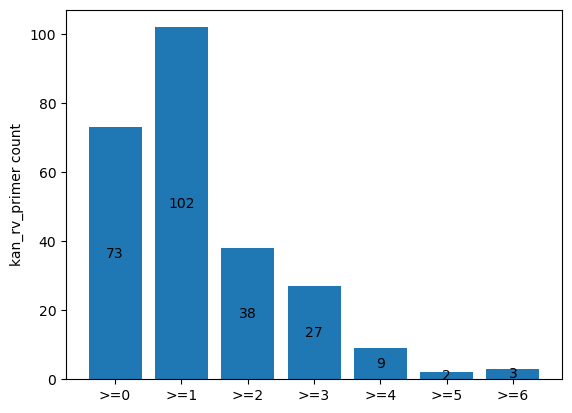

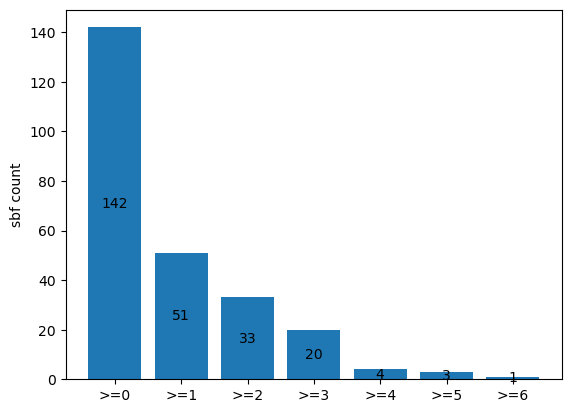

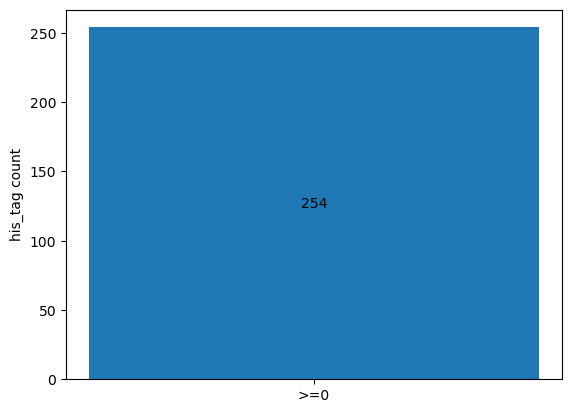

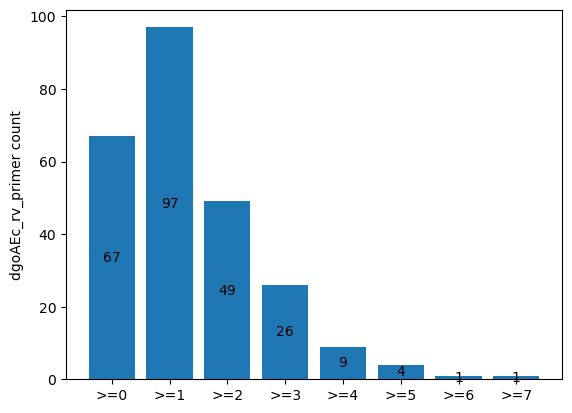

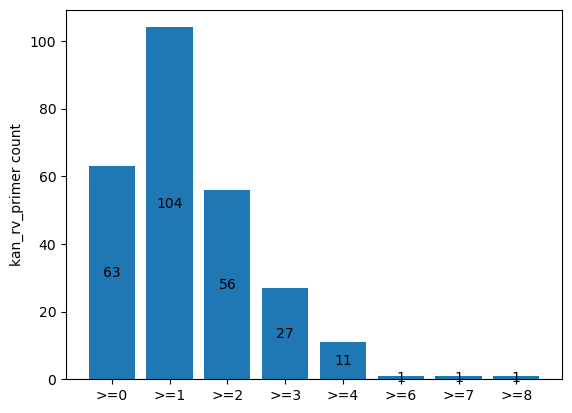

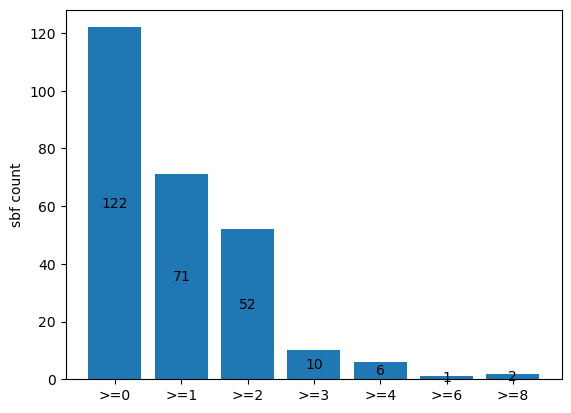

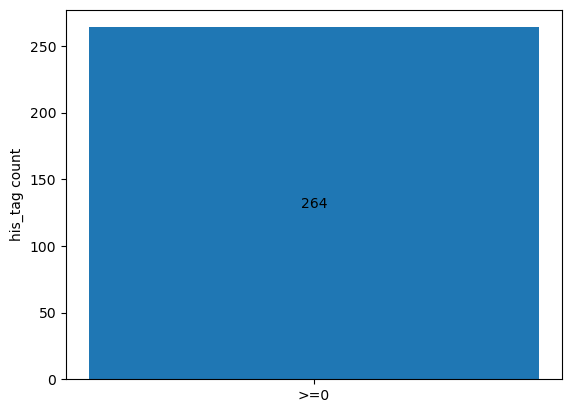

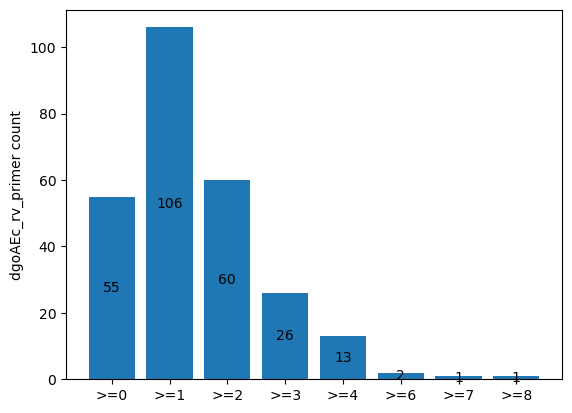

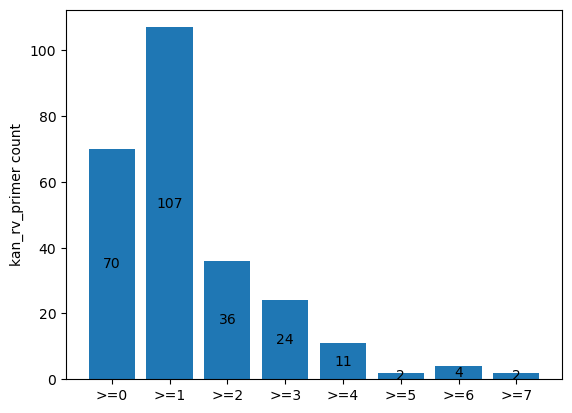

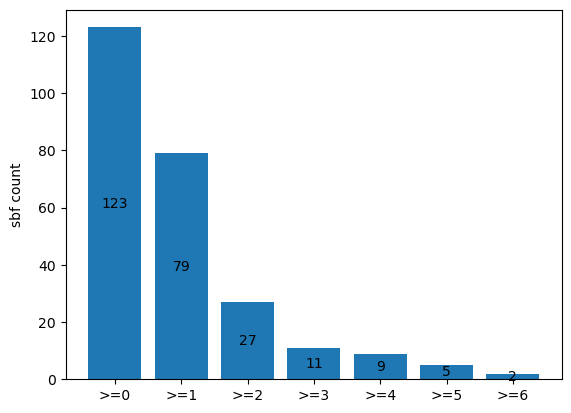

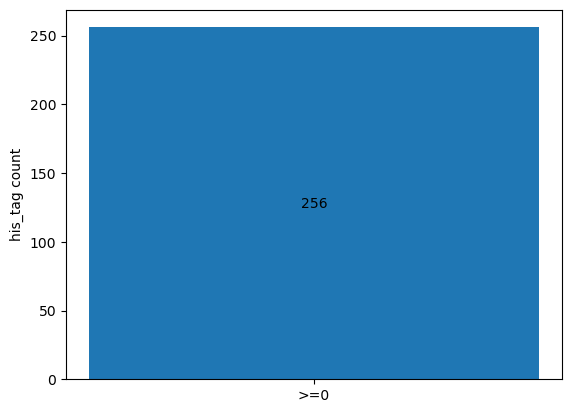

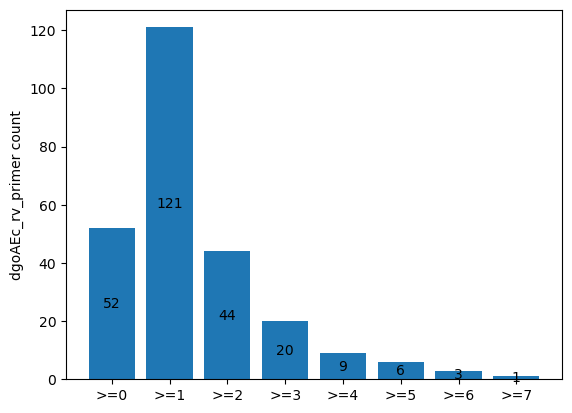

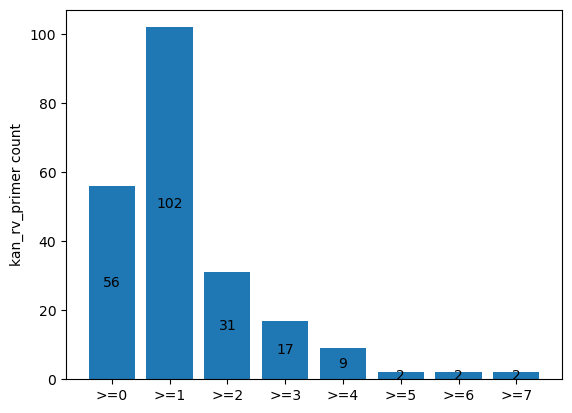

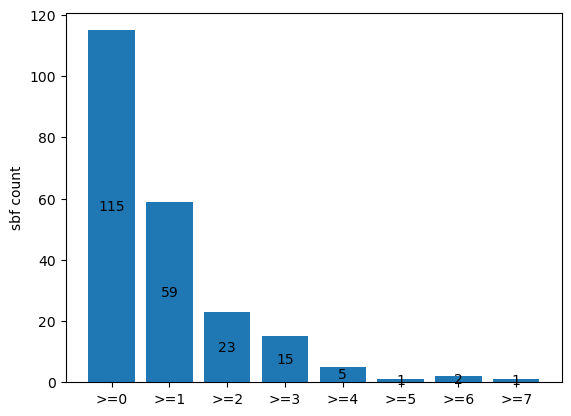

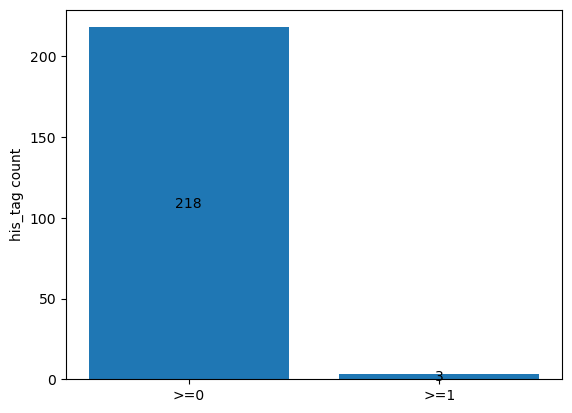

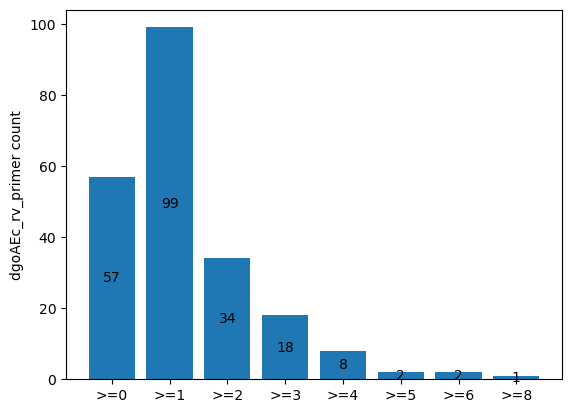

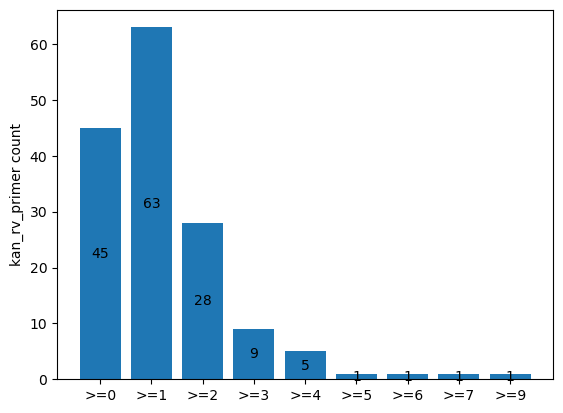

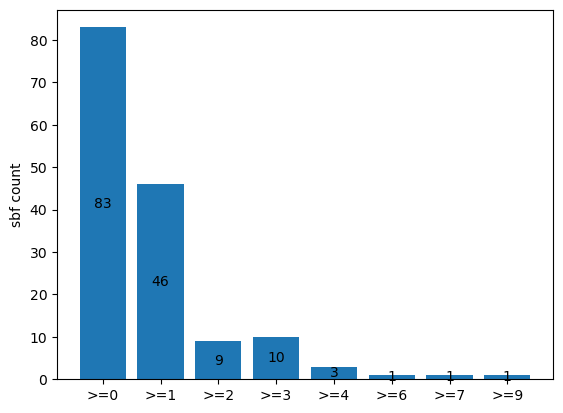

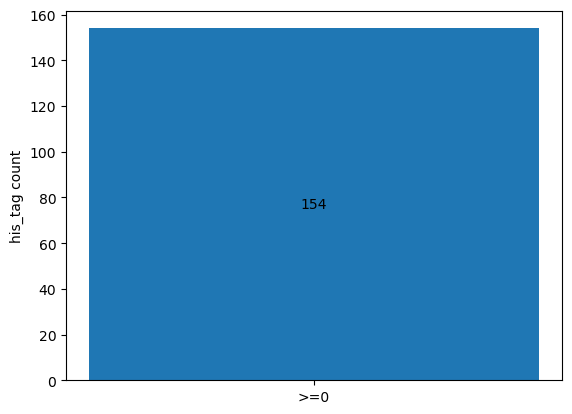

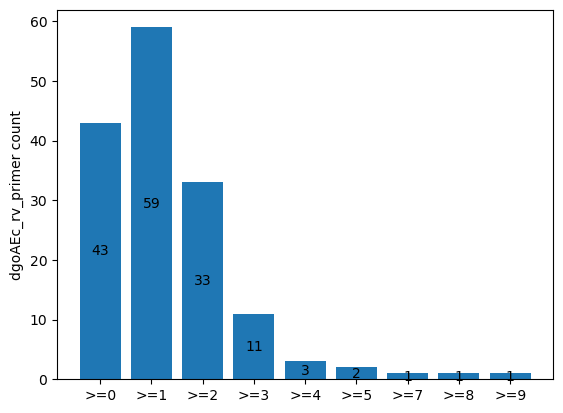

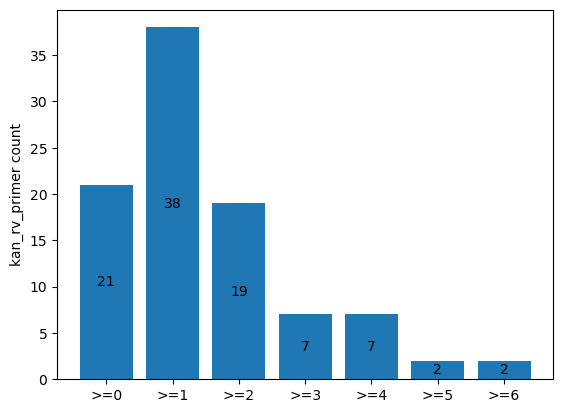

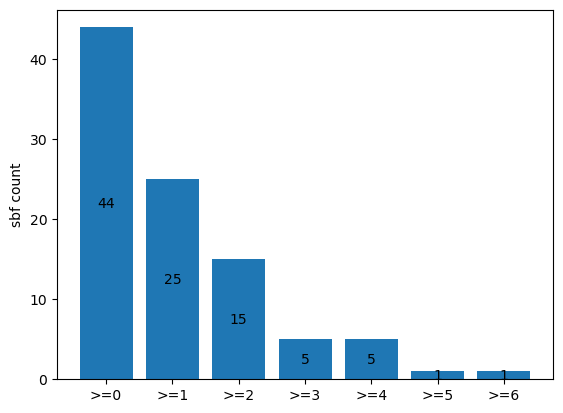

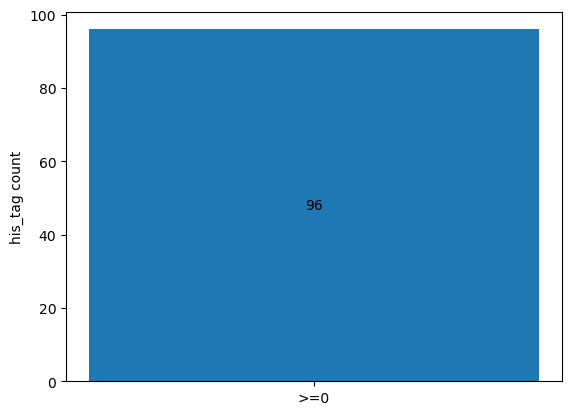

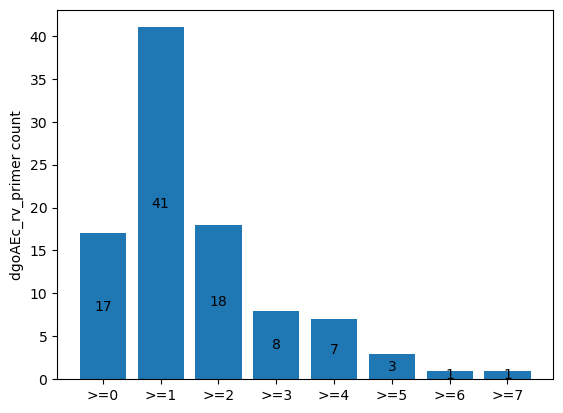

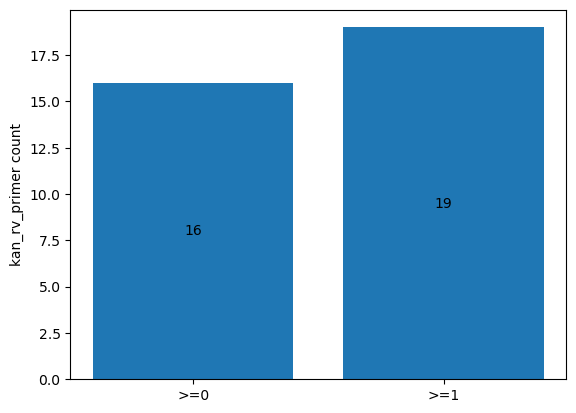

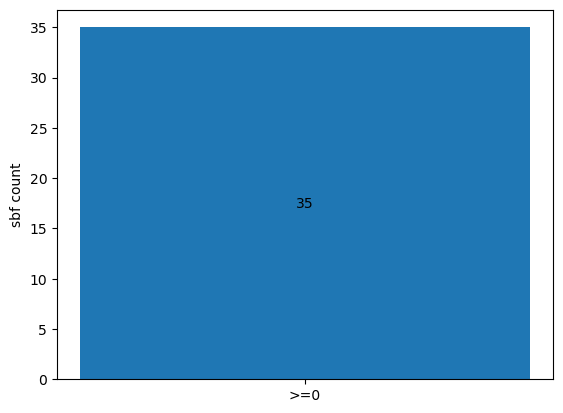

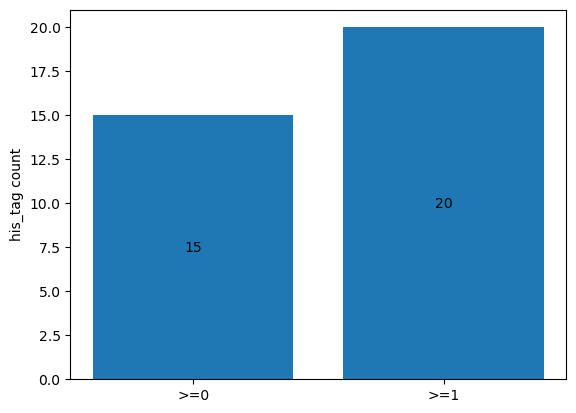

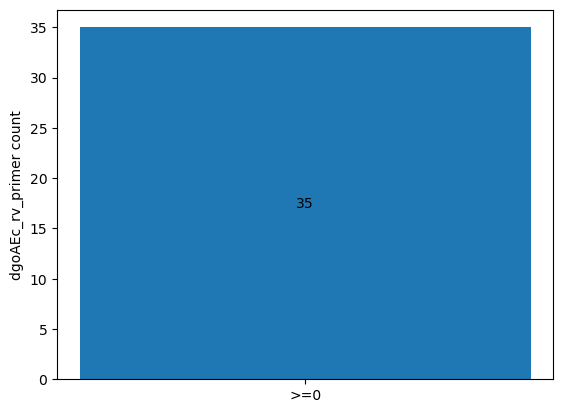

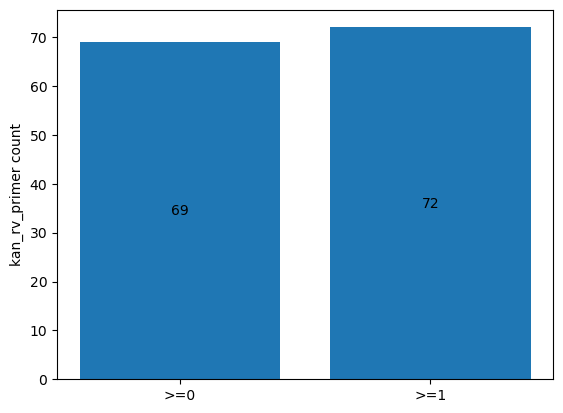

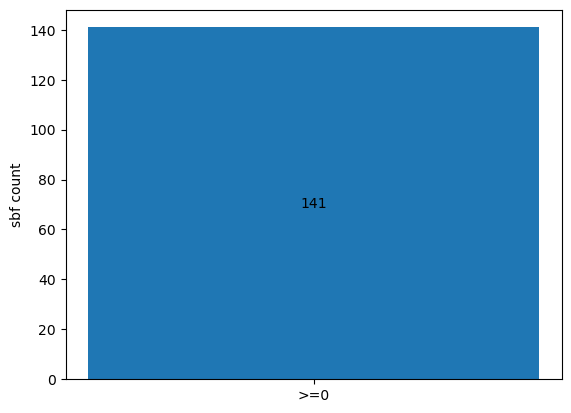

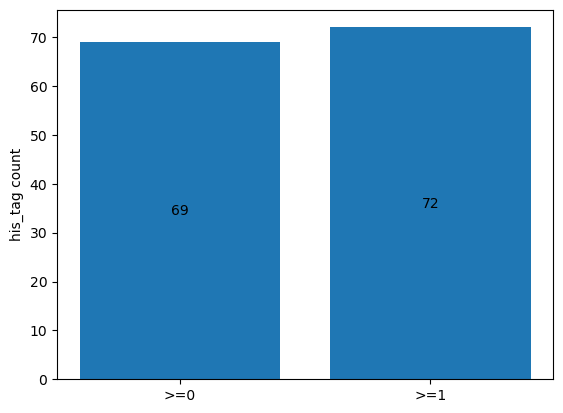

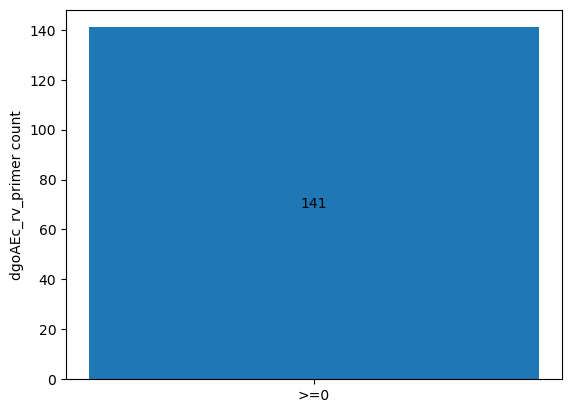

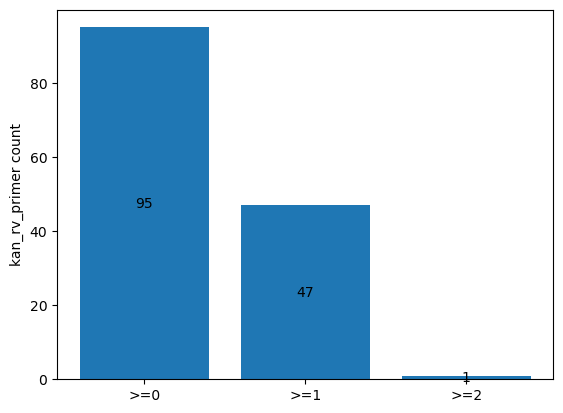

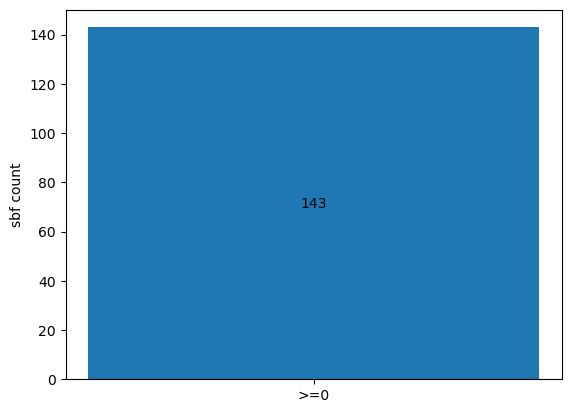

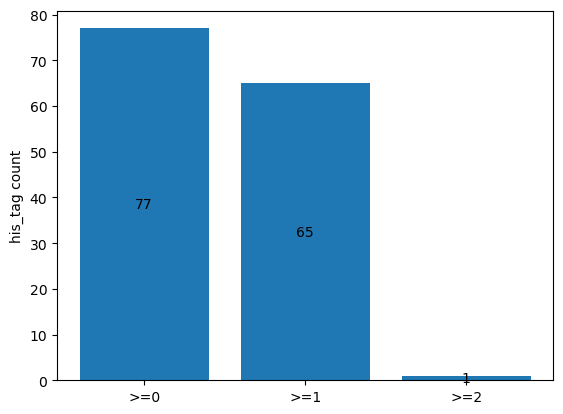

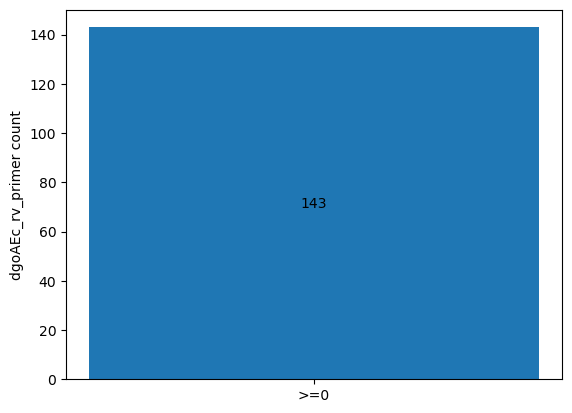

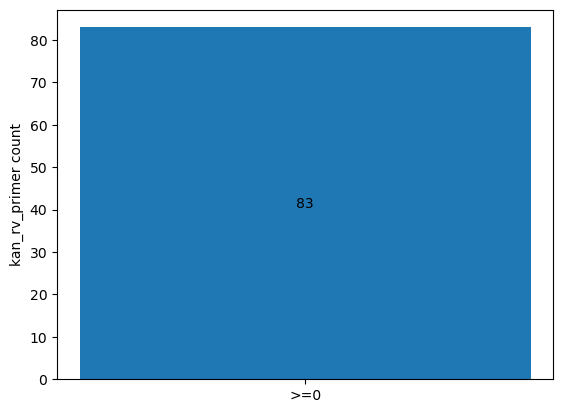

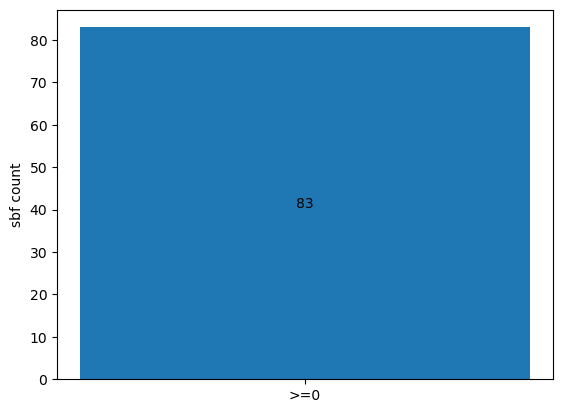

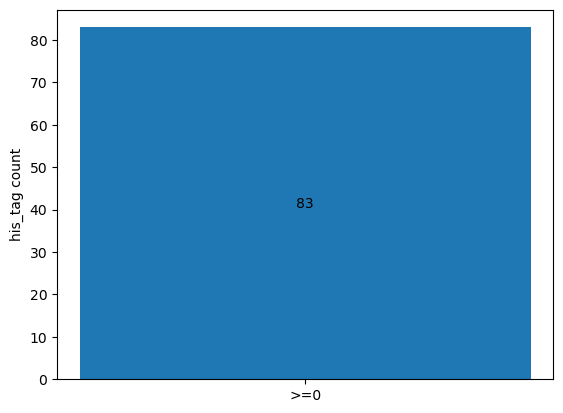

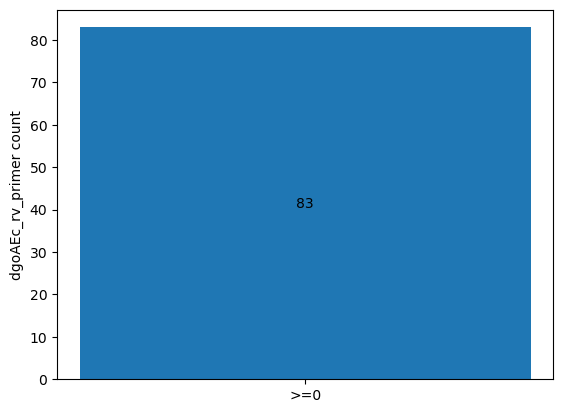

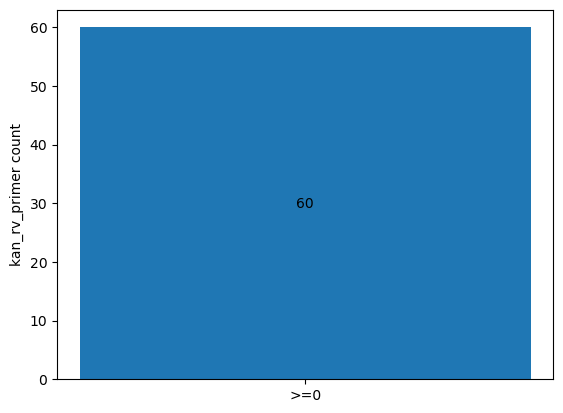

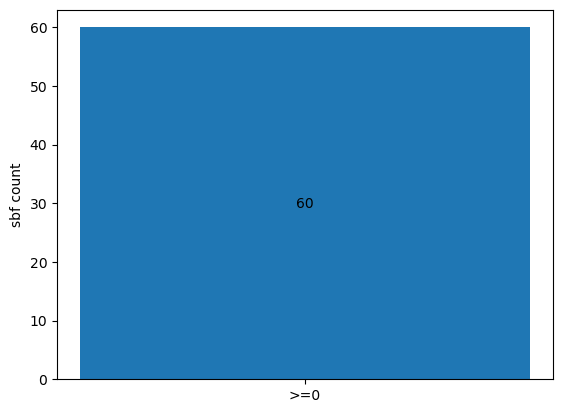

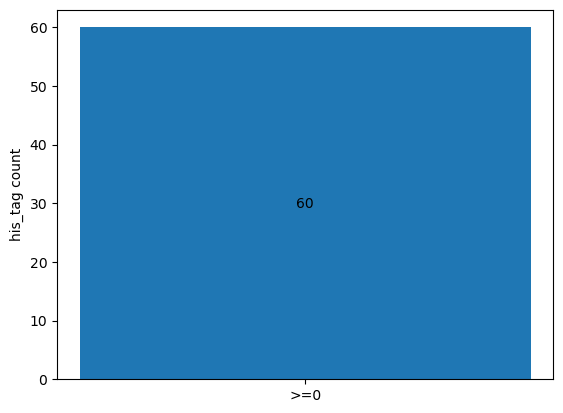

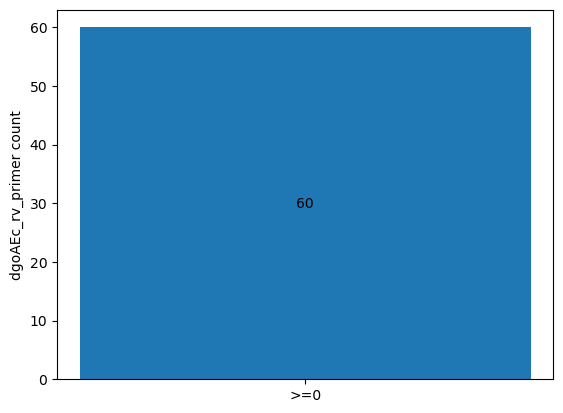

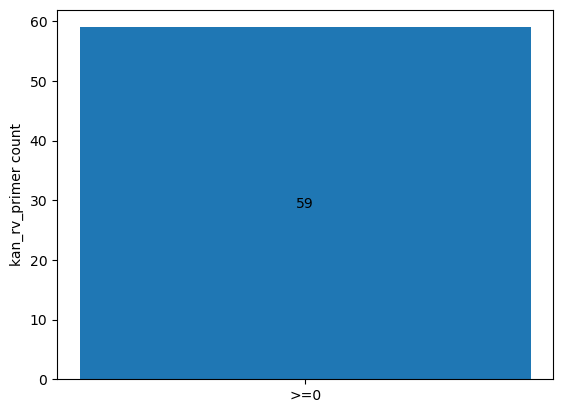

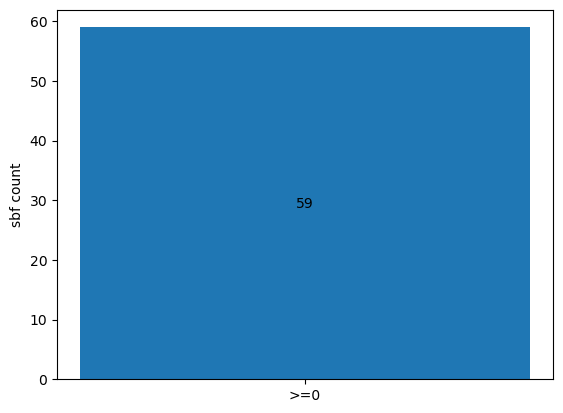

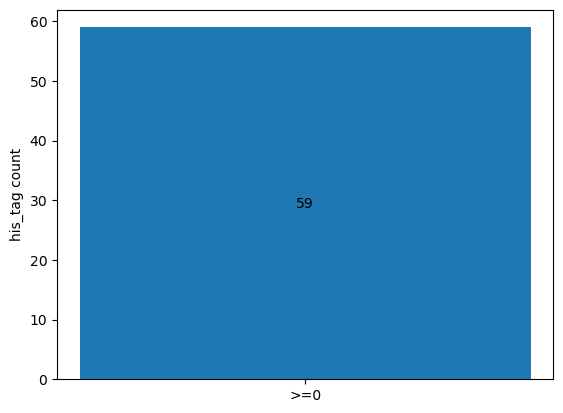

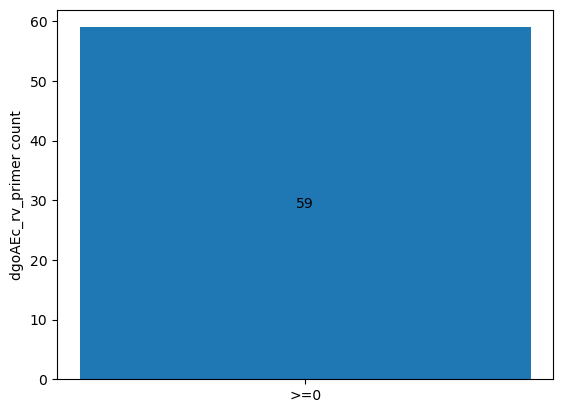

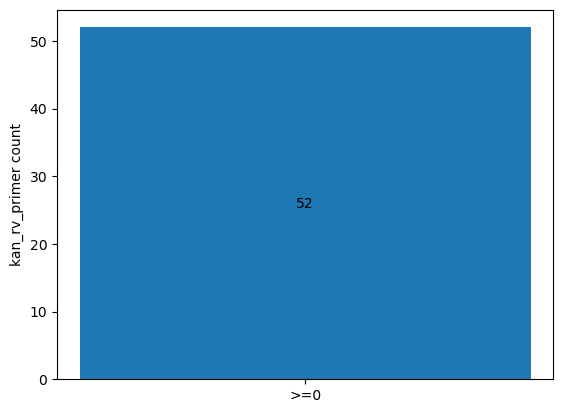

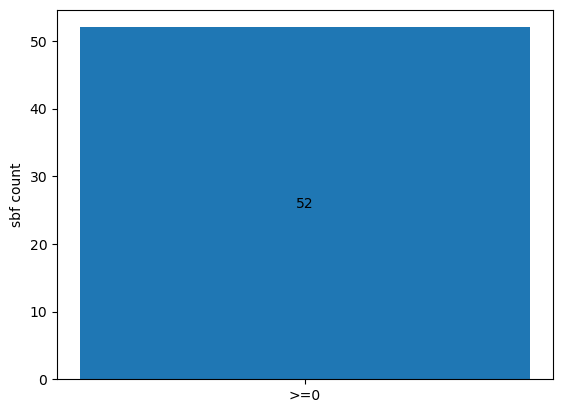

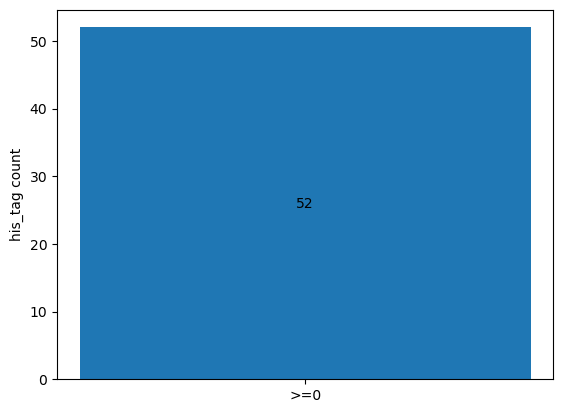

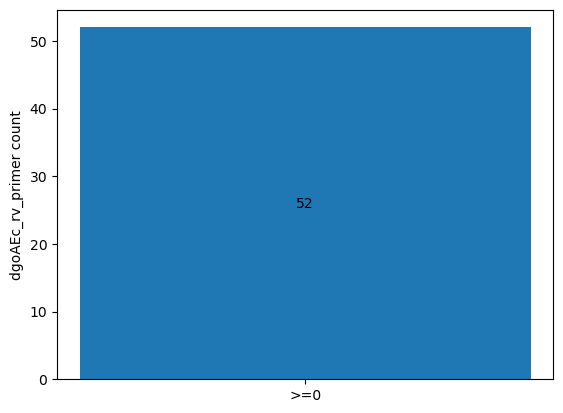

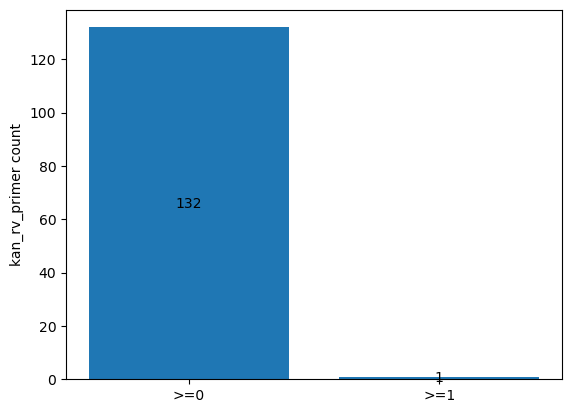

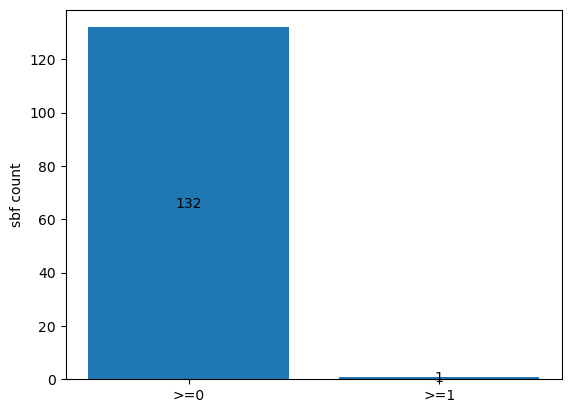

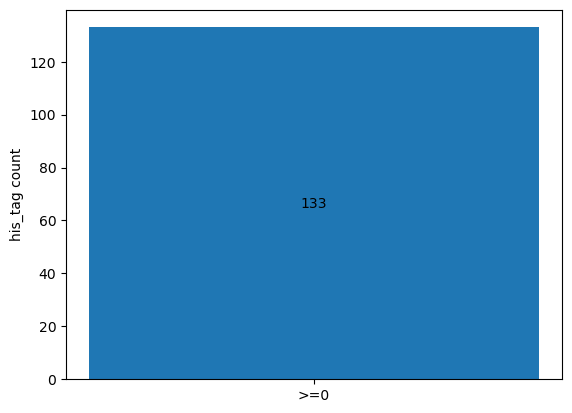

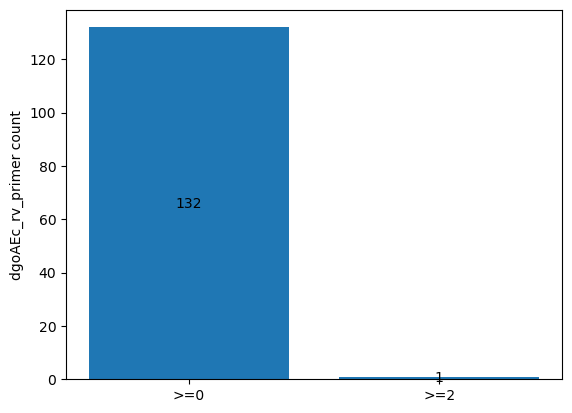

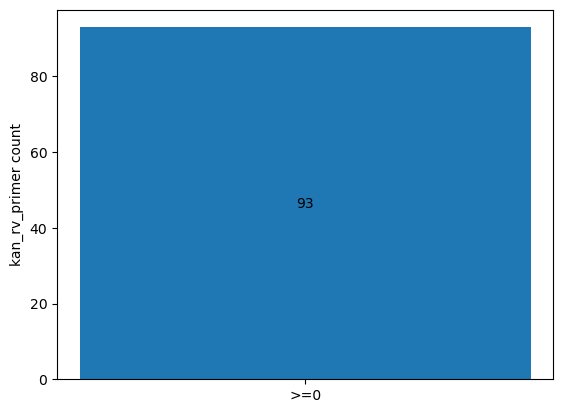

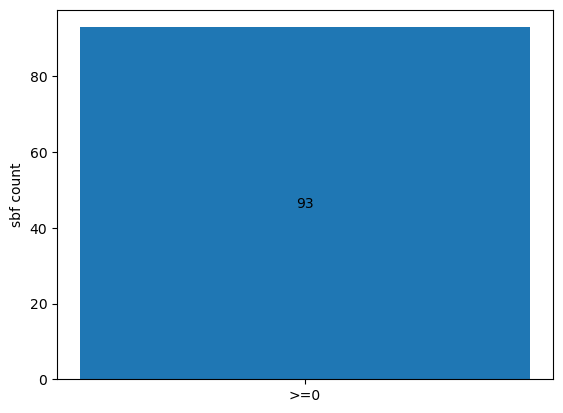

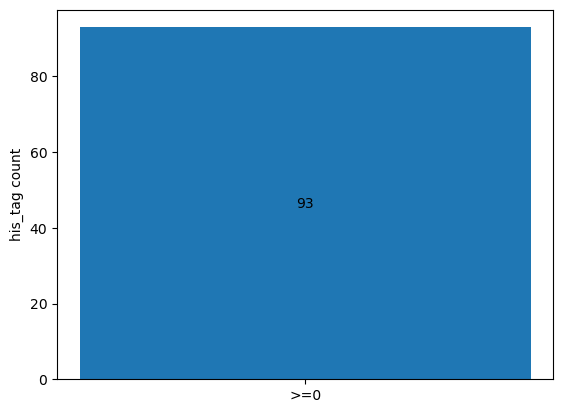

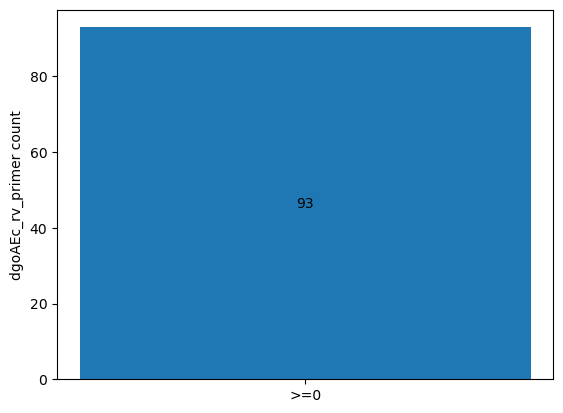

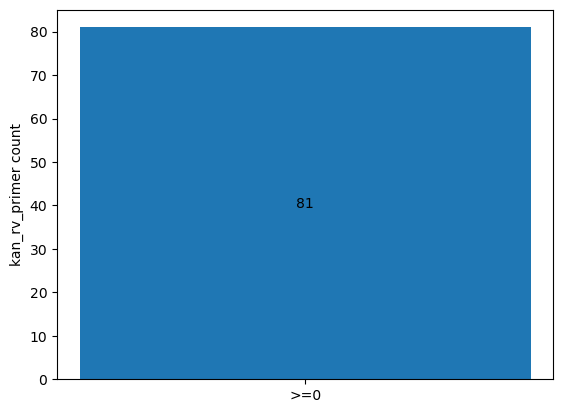

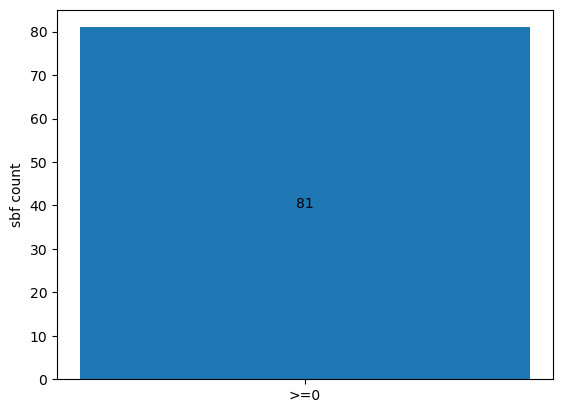

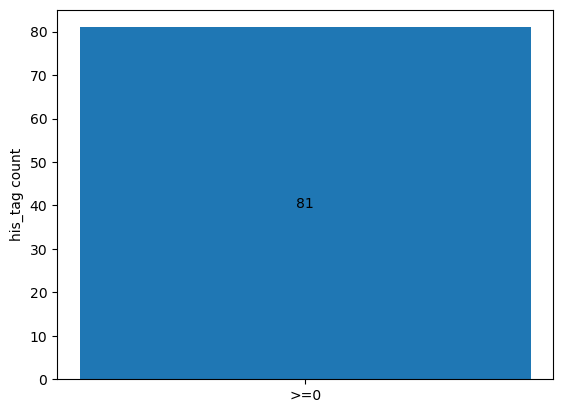

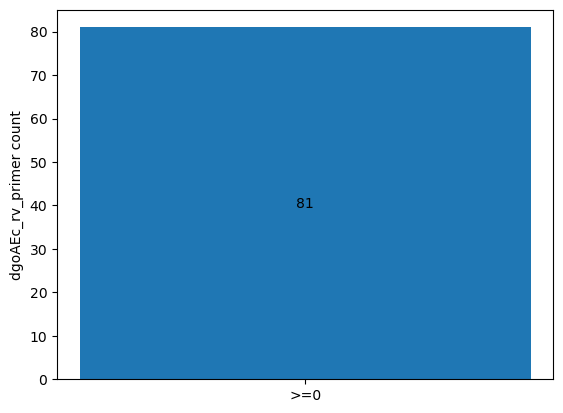

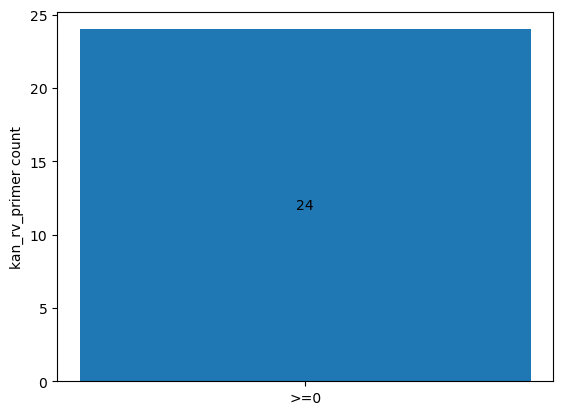

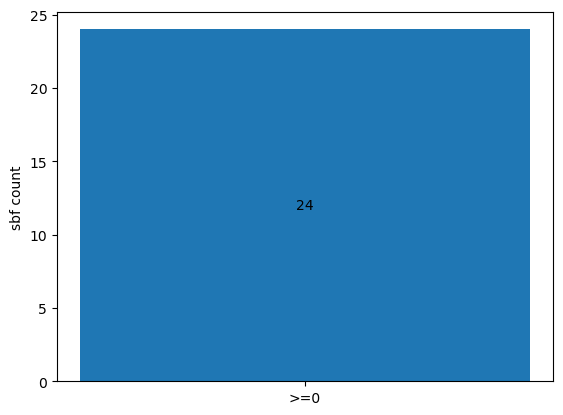

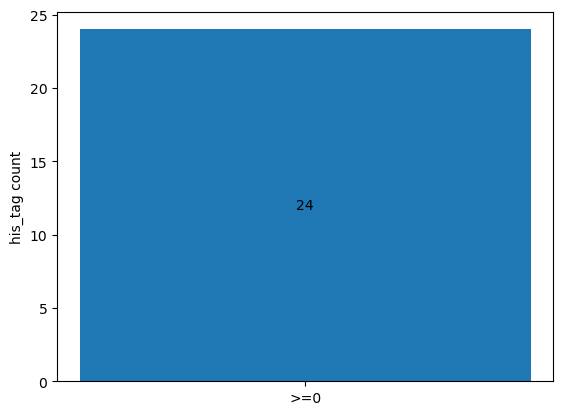

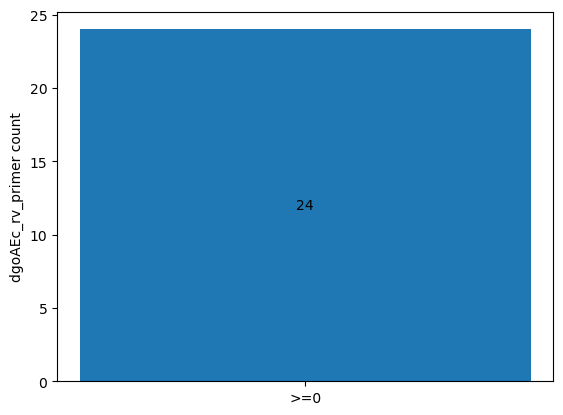

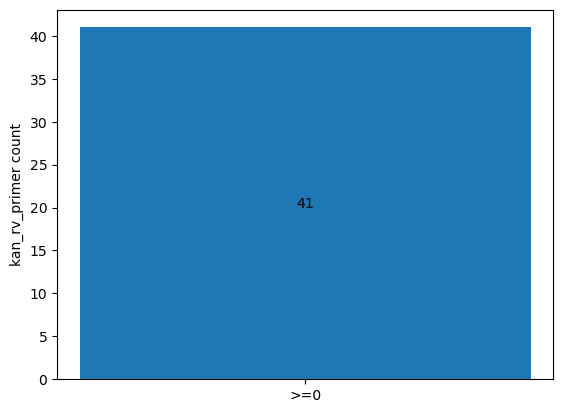

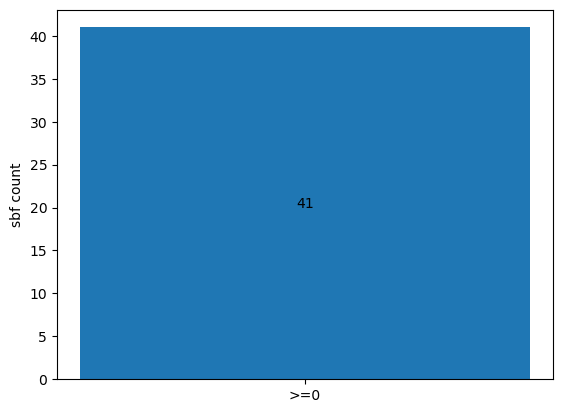

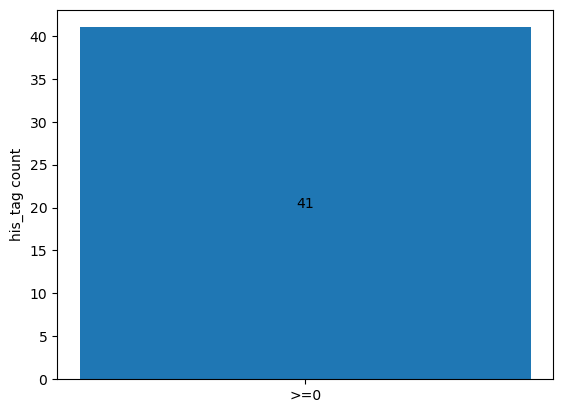

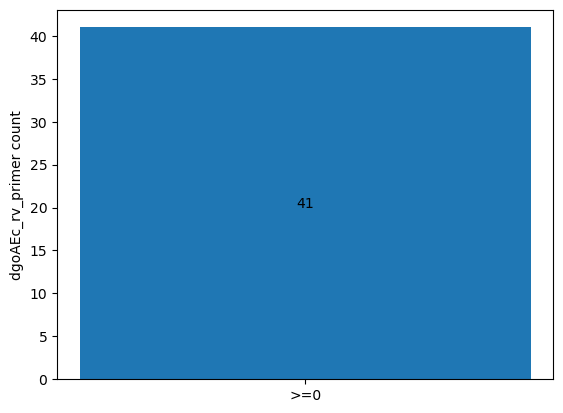

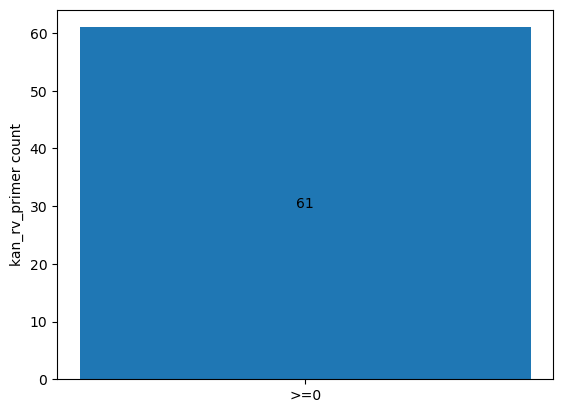

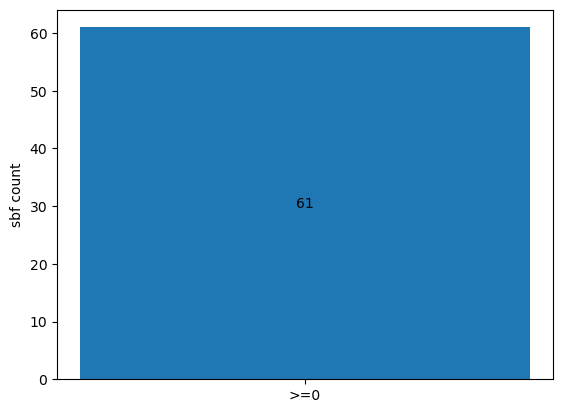

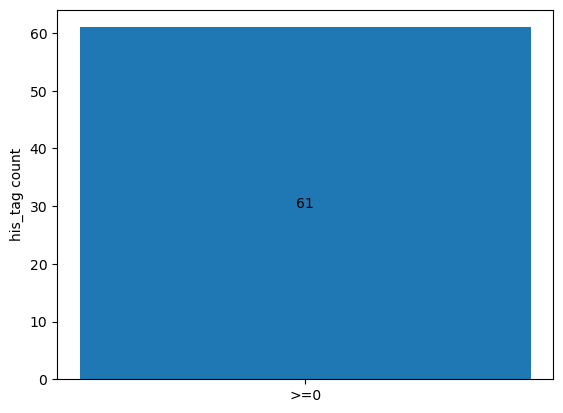

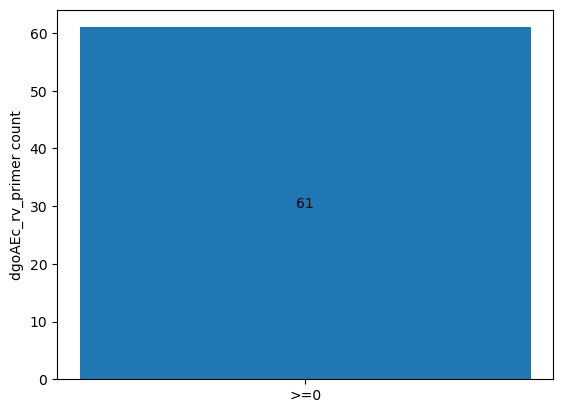

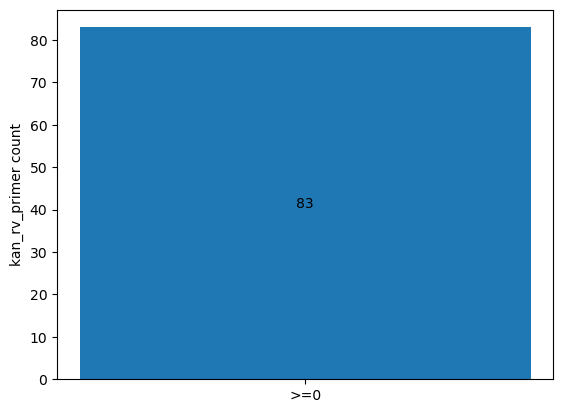

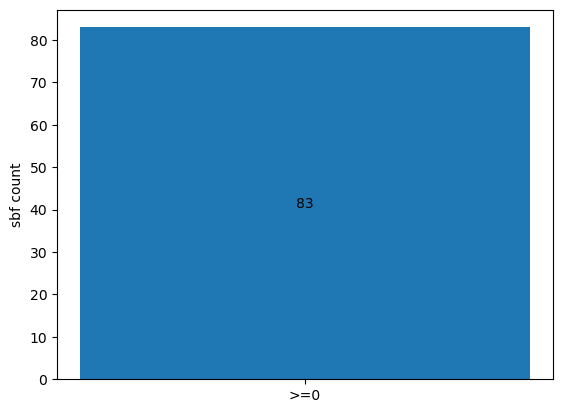

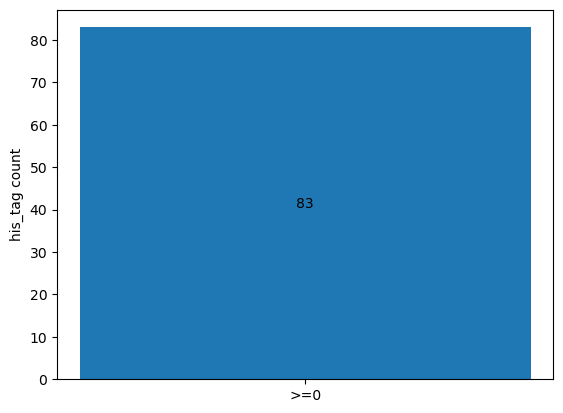

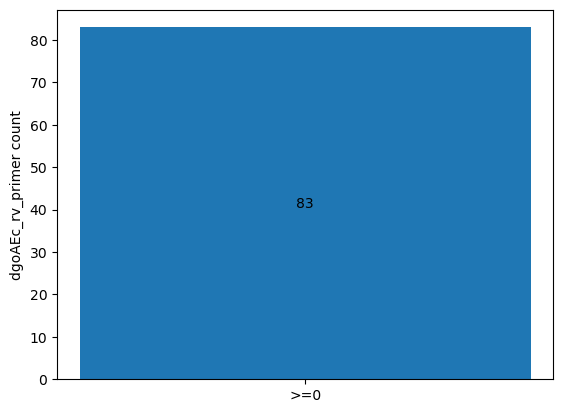

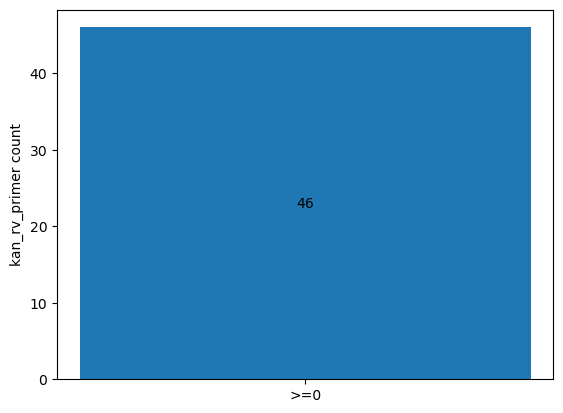

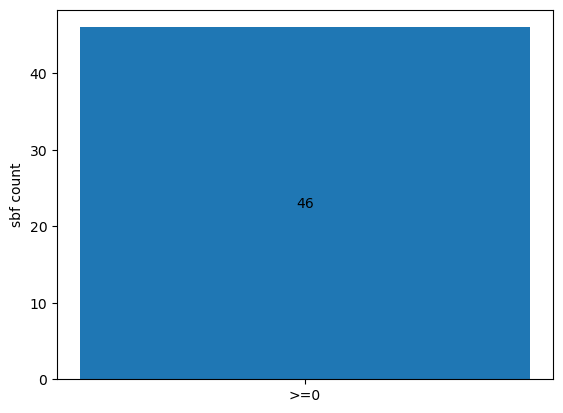

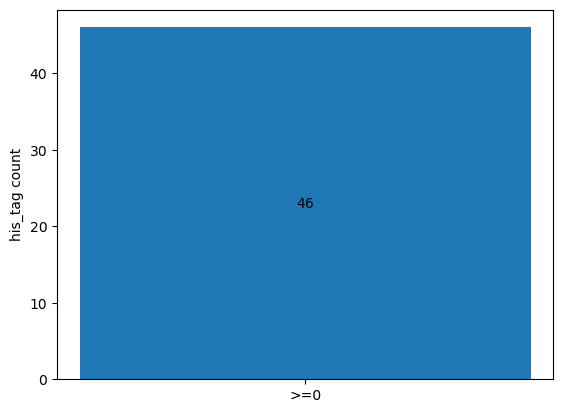

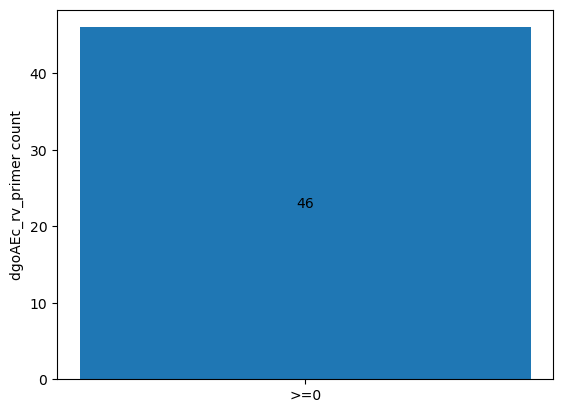

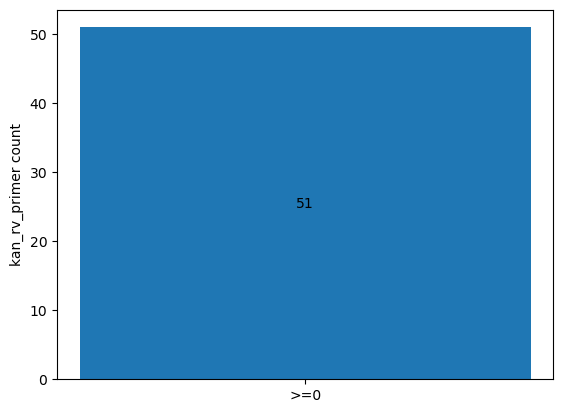

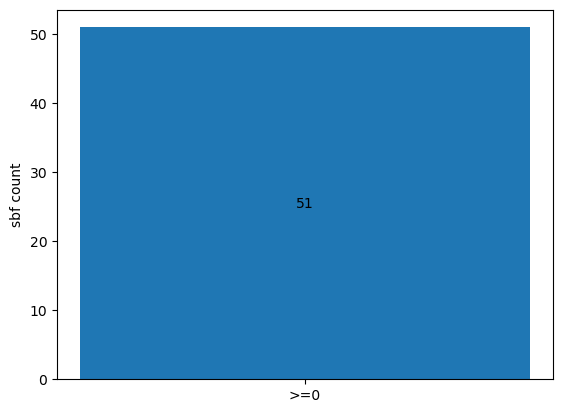

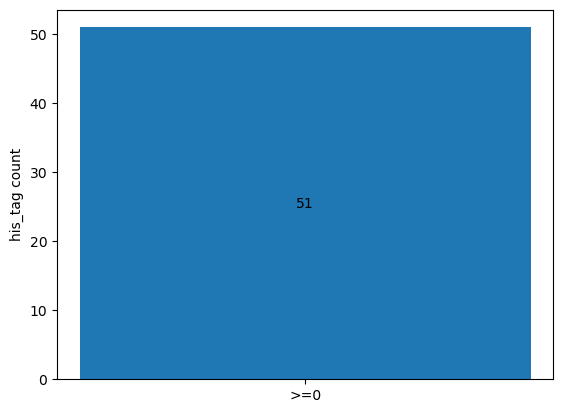

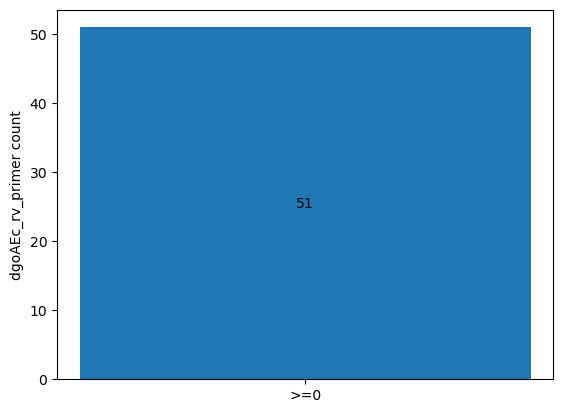

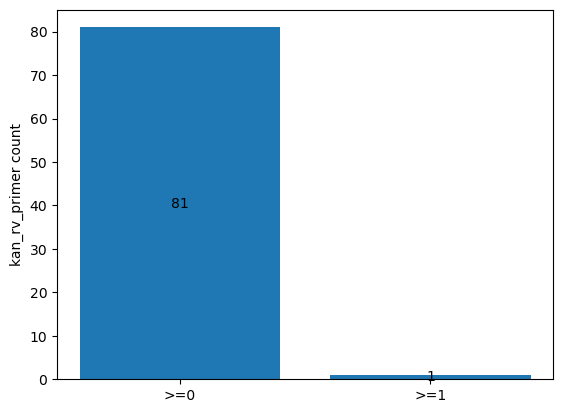

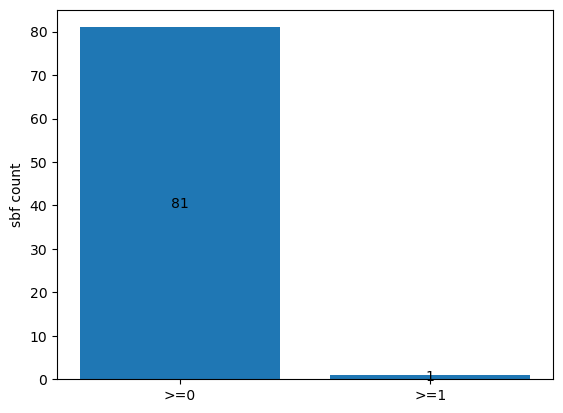

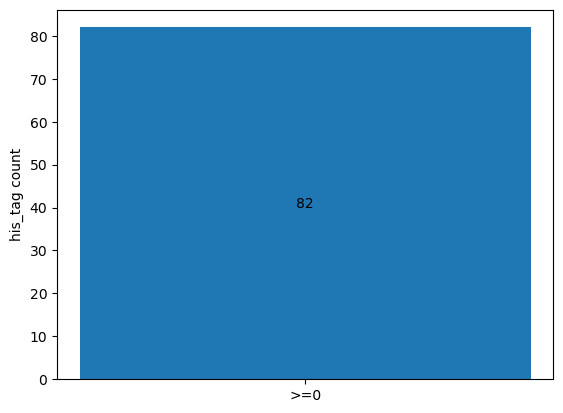

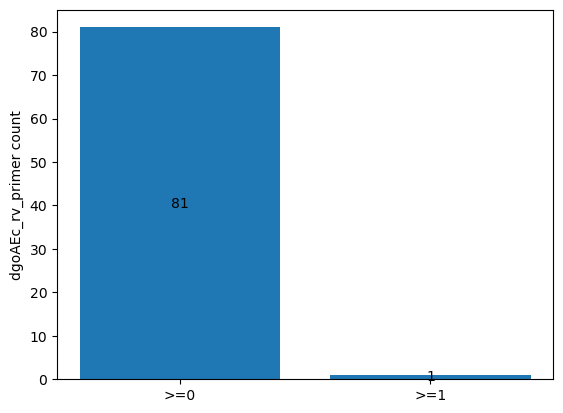

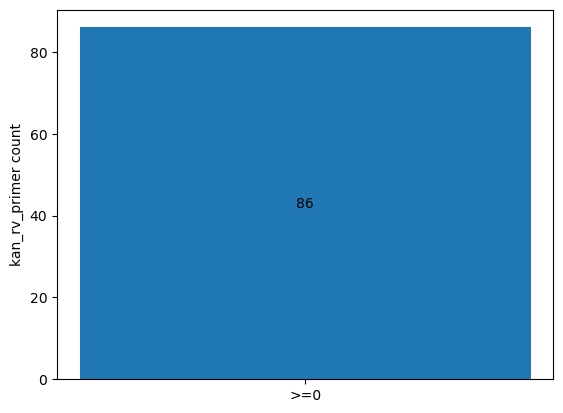

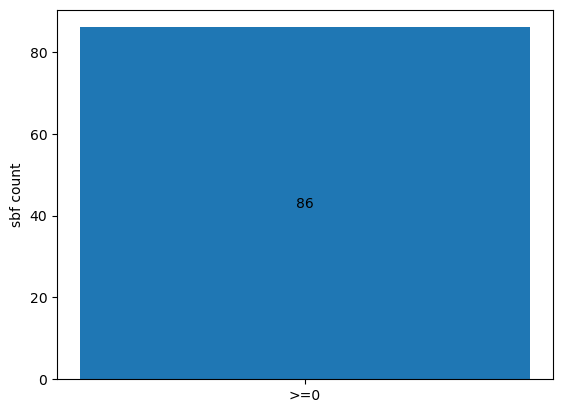

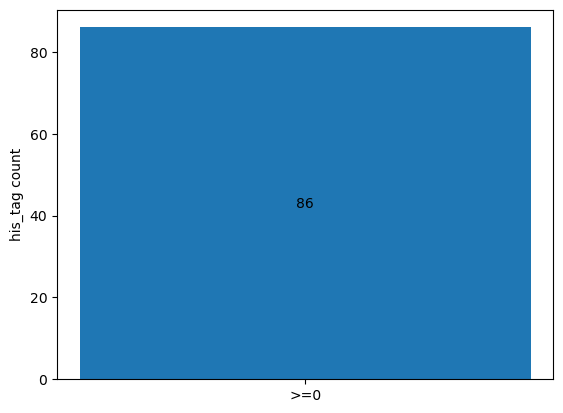

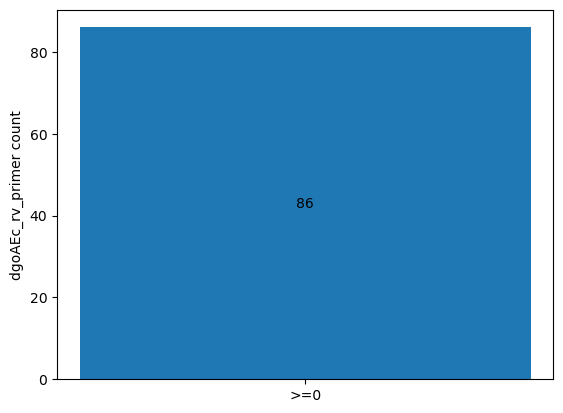

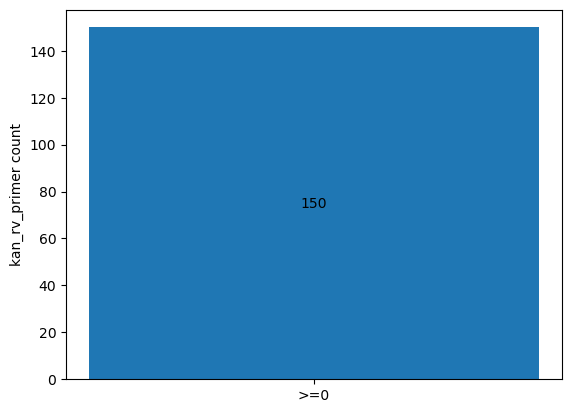

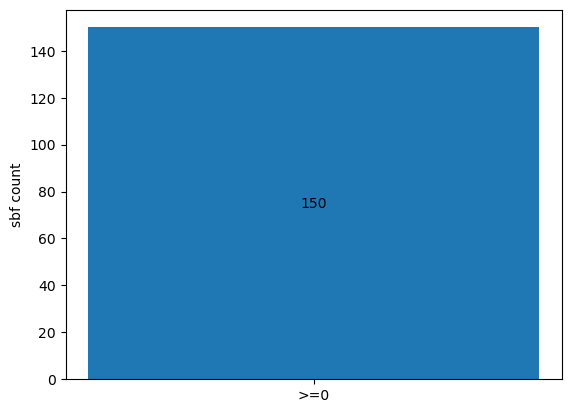

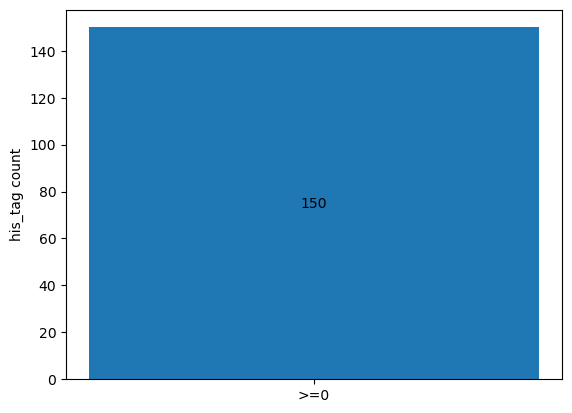

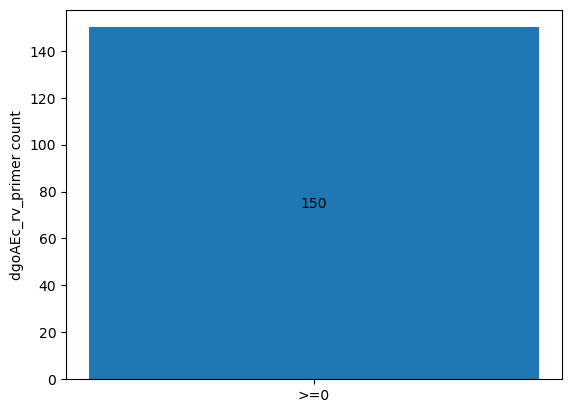

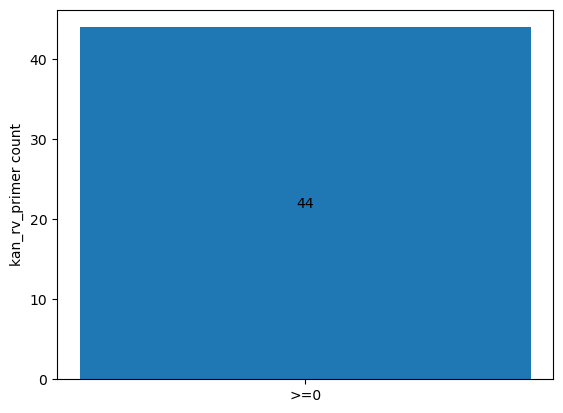

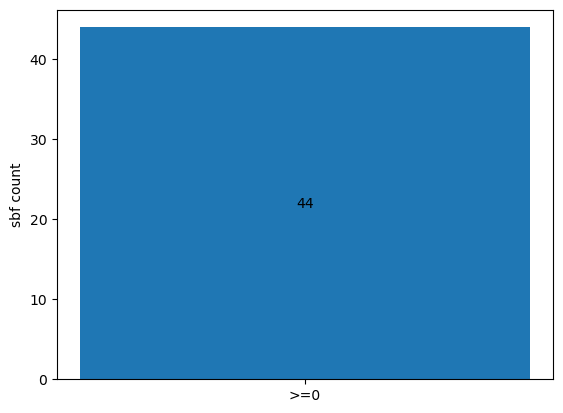

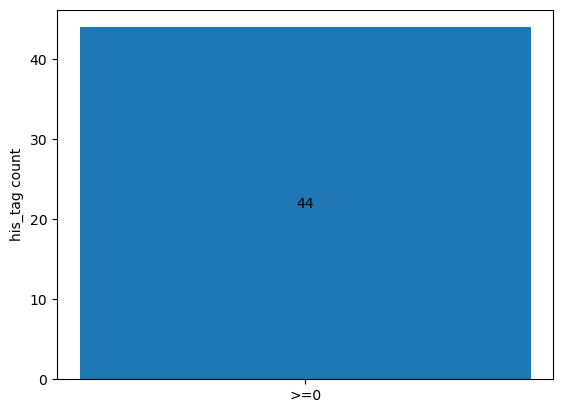

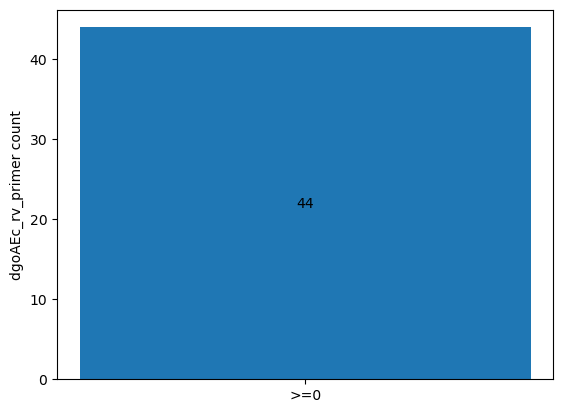

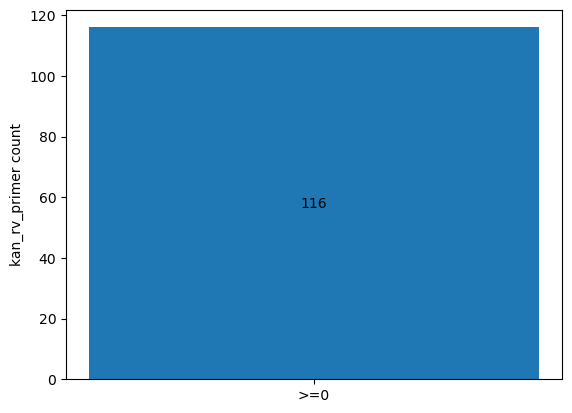

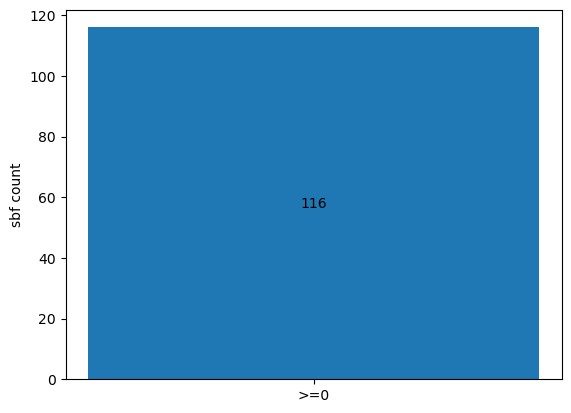

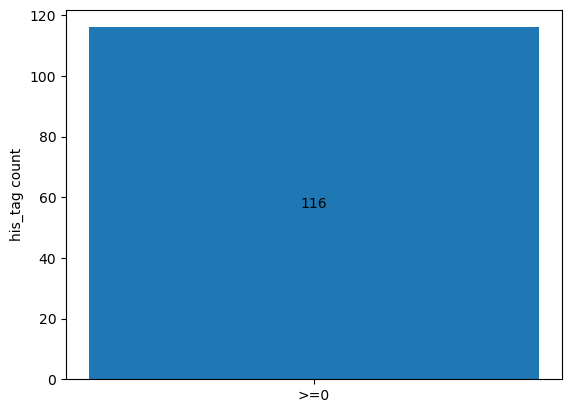

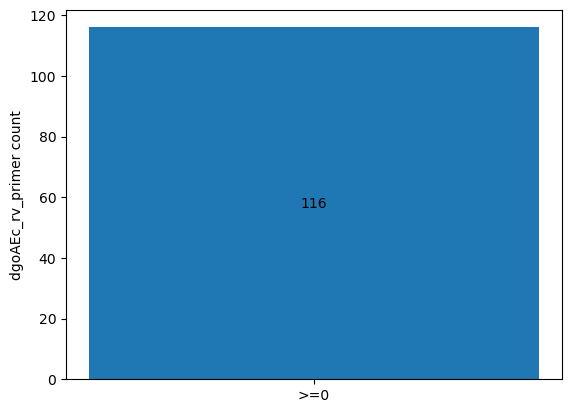

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [110]:
# Count features in one flank blast results and plot

from blast import count_features_in_blast_results, plot_feature_counts

[
    count_features_in_blast_results(
        x,
        features 
        ).pipe(
            plot_feature_counts,
            features,
            out_pdf = x.replace('.tsv', '_feature_counts.pdf')
            )
    for x in manifest['one_flank_blast_results']
] 

In [111]:
# Count and sum features in one flank blast results and add to manifest

from blast import count_features_in_blast_results

mean_feature_counts =[
    count_features_in_blast_results(
        x,
        features 
        )[list(features.keys())].mean()
    for x in manifest['one_flank_blast_results']
]

mean_feature_counts = pd.DataFrame(mean_feature_counts)
mean_feature_counts.rename(columns={col: col+'_mean_one_flank' for col in mean_feature_counts.columns}, inplace=True)

manifest = pd.concat([manifest, mean_feature_counts], axis=1)

In [112]:
# Categorize dgoA allele presentation in one flank blast results

def categorize_dgoA(row):
    # Condition set 1
    if row['his_tag'] == 0:
        his_tag_cat = 'best=0'
    elif row['his_tag'] == 1:
        his_tag_cat = 'best=1'
    elif row['his_tag'] >= 1:
        his_tag_cat = 'best>=1'
    else:
        his_tag_cat = 'best=other'

    # Condition set 2
    if row['dgoAEc_rv_primer'] == 0:
        dgoAEc_cat = 'Ecoli=0'
    elif row['dgoAEc_rv_primer'] == 1:
        dgoAEc_cat = 'Ecoli=1'
    elif row['dgoAEc_rv_primer'] >= 1:
        dgoAEc_cat = 'Ecoli>=1'
    else:
        dgoAEc_cat = 'Ecoli=other'

    return f'{his_tag_cat} & {dgoAEc_cat}'


In [113]:
dgoA_cat_counts =[
    count_features_in_blast_results(
        x,
        features 
        ).apply(categorize_dgoA, axis=1).value_counts()
    for x in manifest['one_flank_blast_results']
]
dgoA_cat_counts = pd.DataFrame(dgoA_cat_counts).set_index(manifest.index).fillna(0).convert_dtypes()

for col in dgoA_cat_counts.columns:
    manifest[col] = dgoA_cat_counts[col]/manifest['n_reads_one_flank']*100

### Both flank results

File does not exist.
File does not exist.
File does not exist.


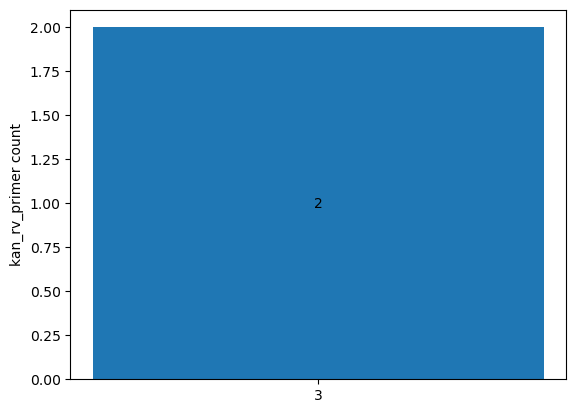

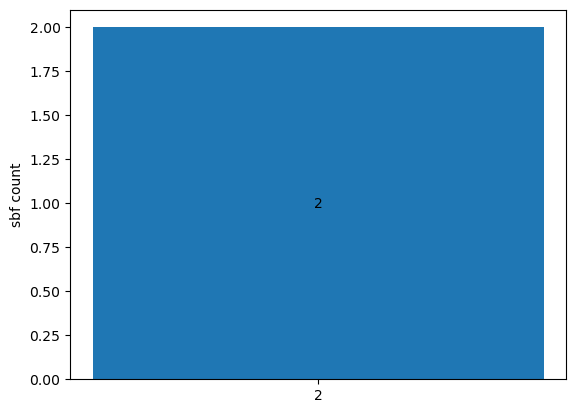

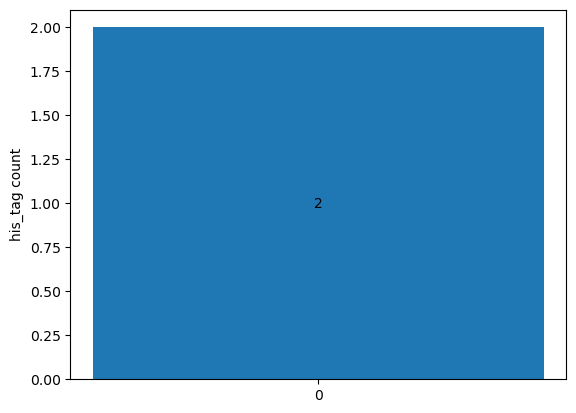

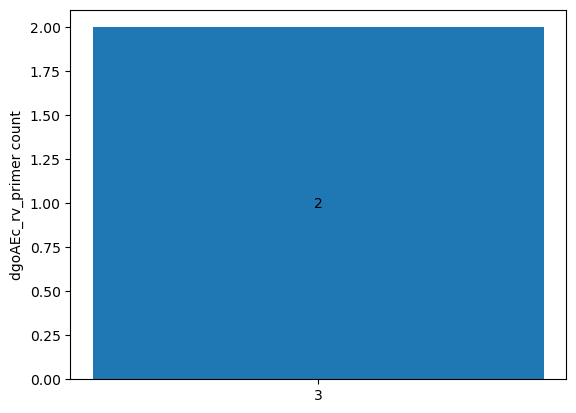

File does not exist.
File does not exist.


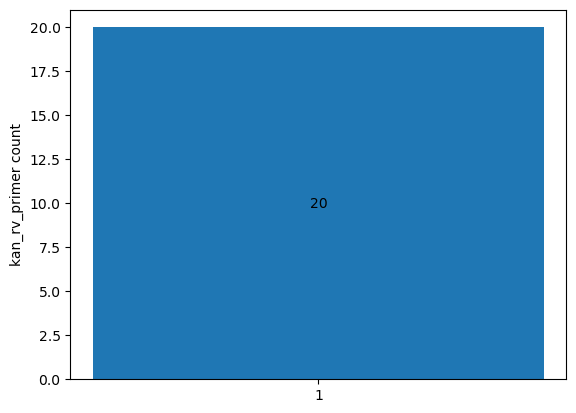

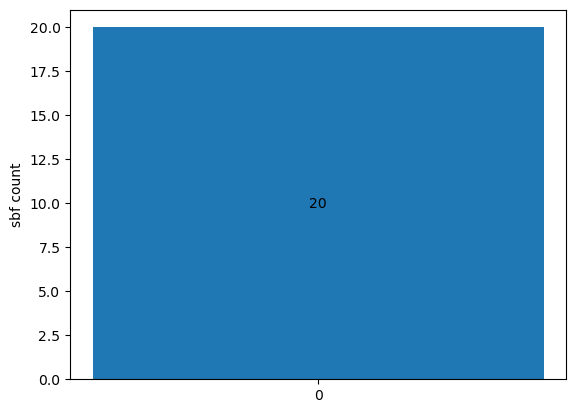

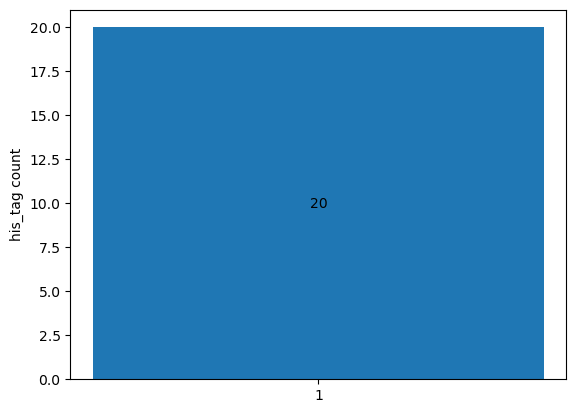

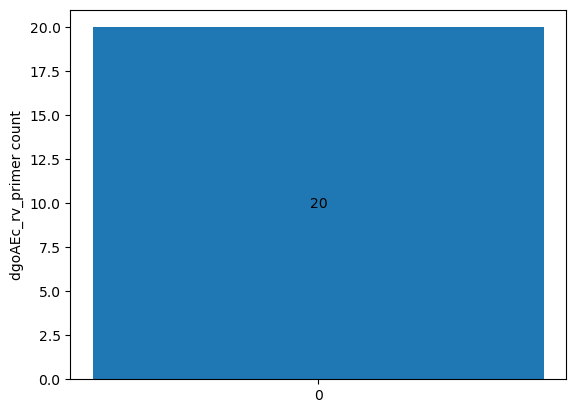

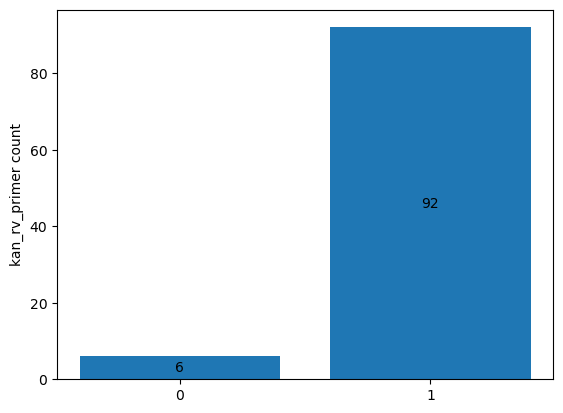

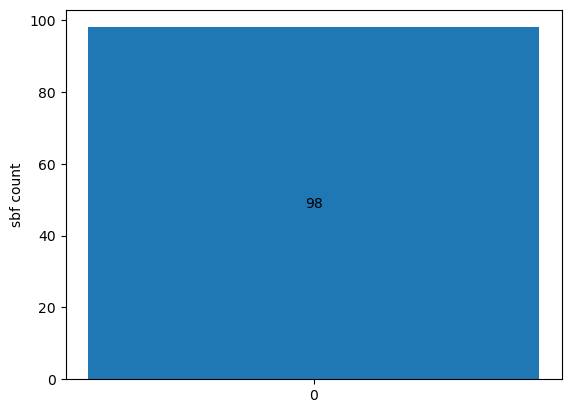

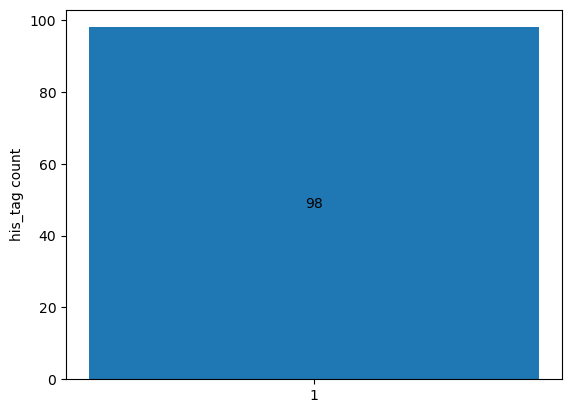

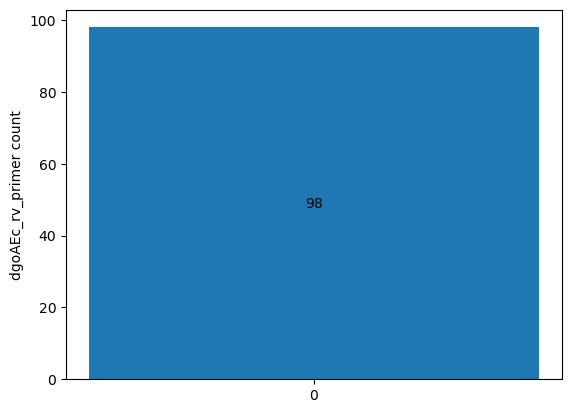

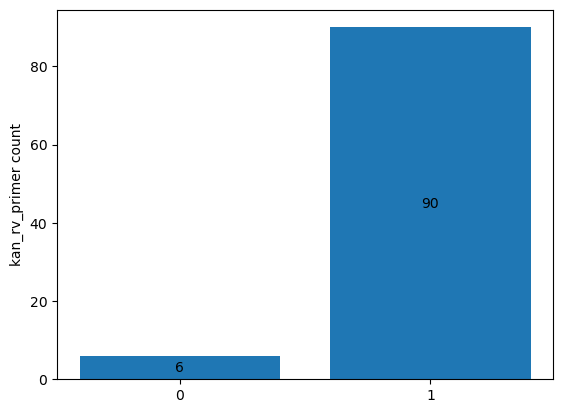

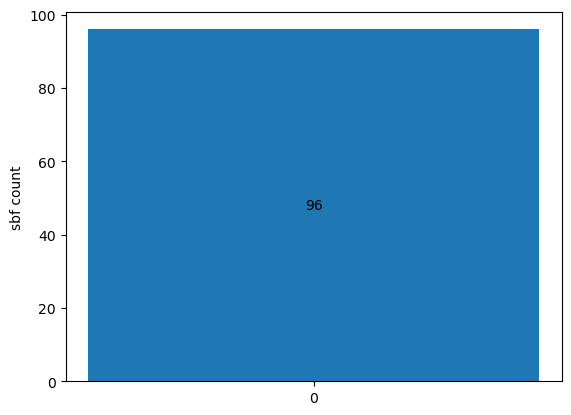

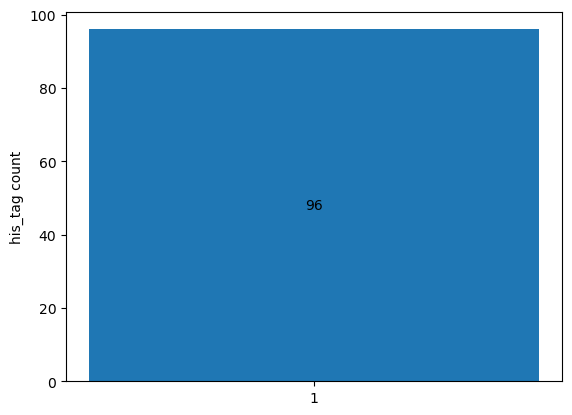

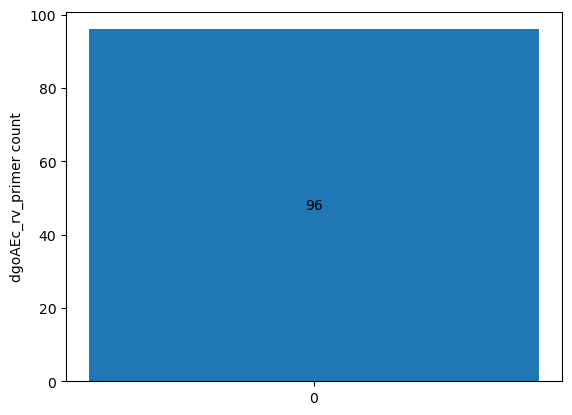

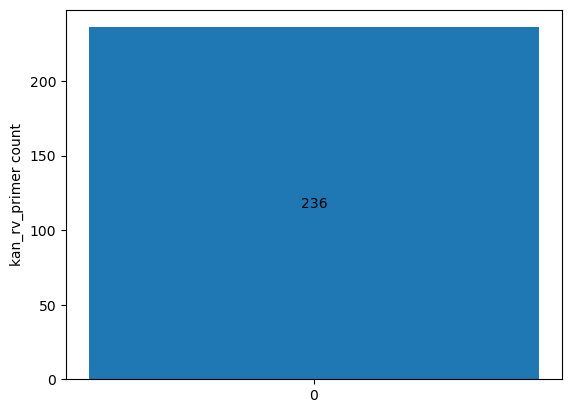

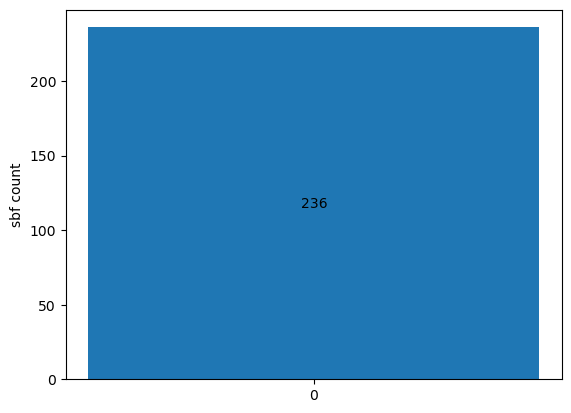

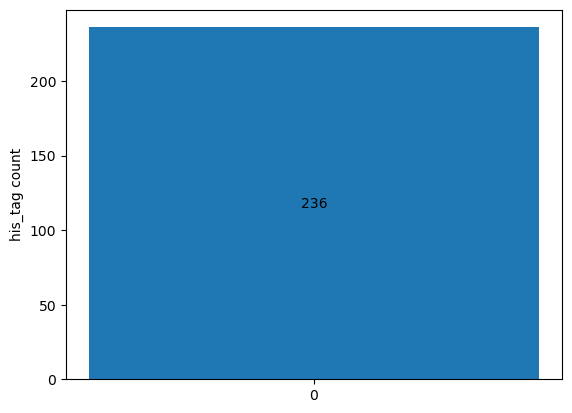

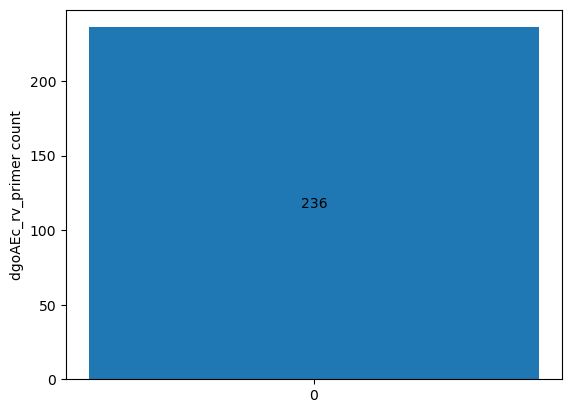

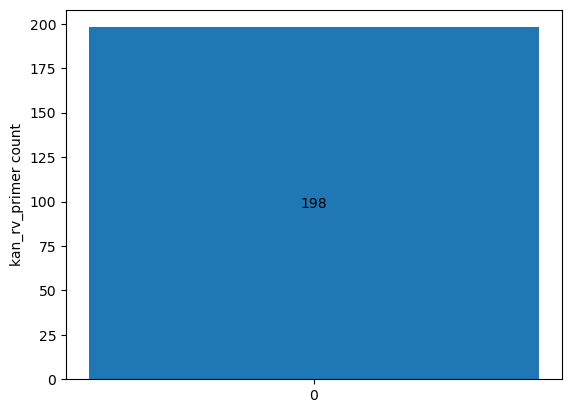

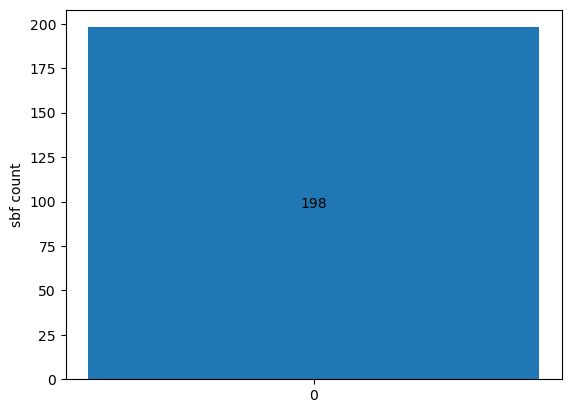

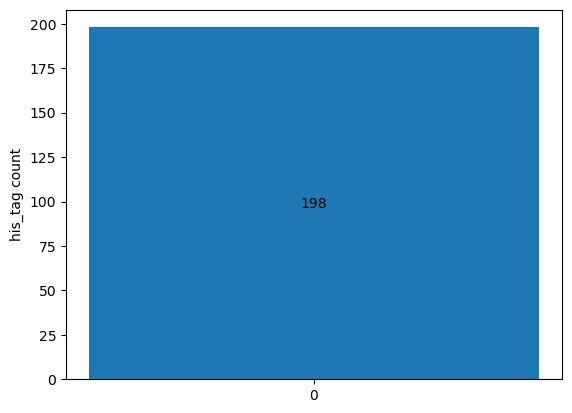

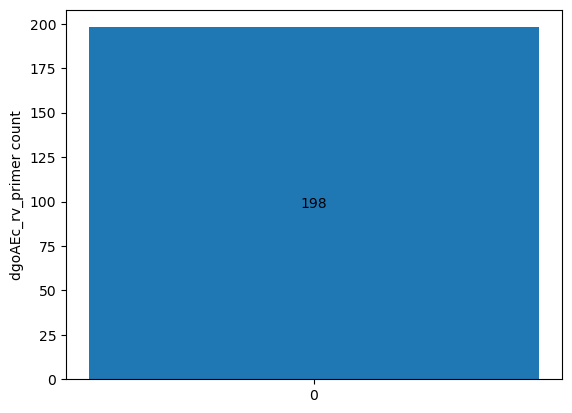

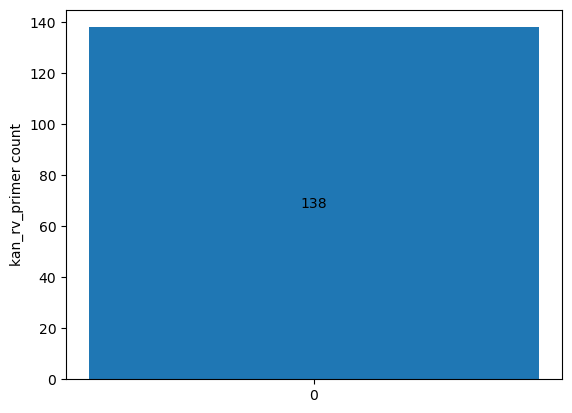

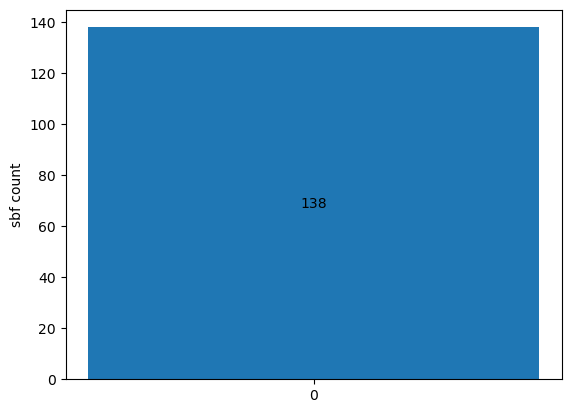

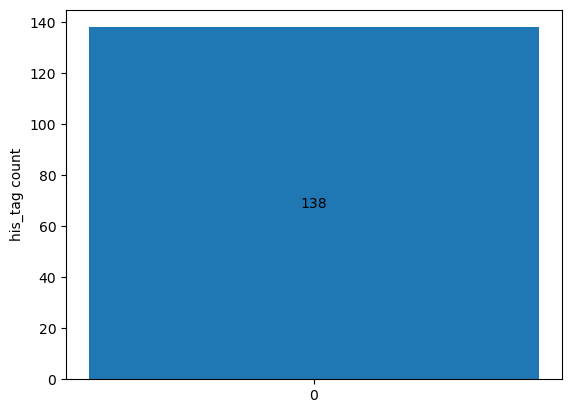

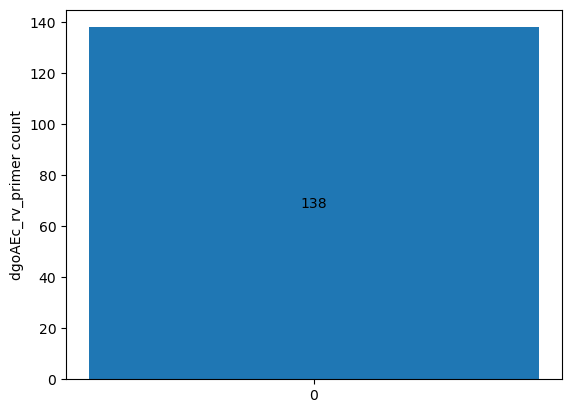

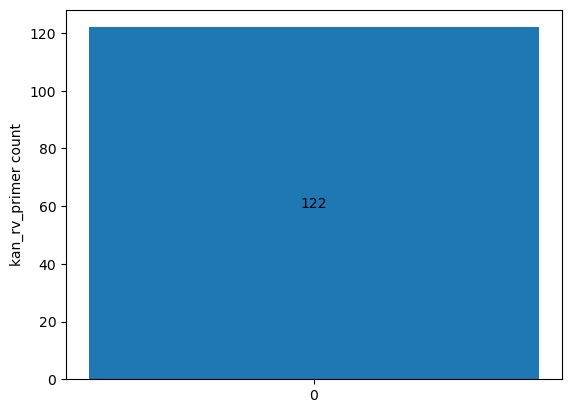

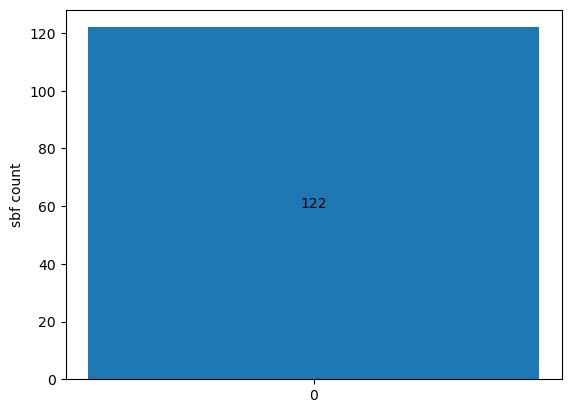

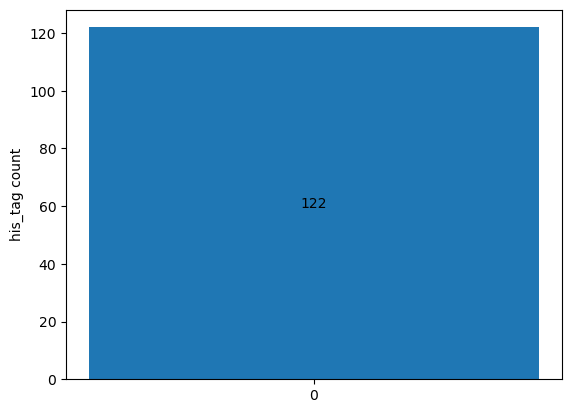

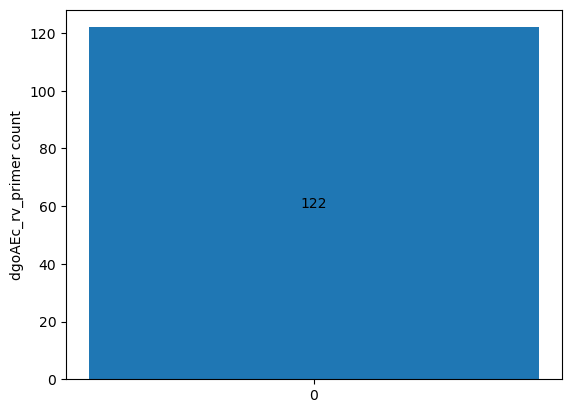

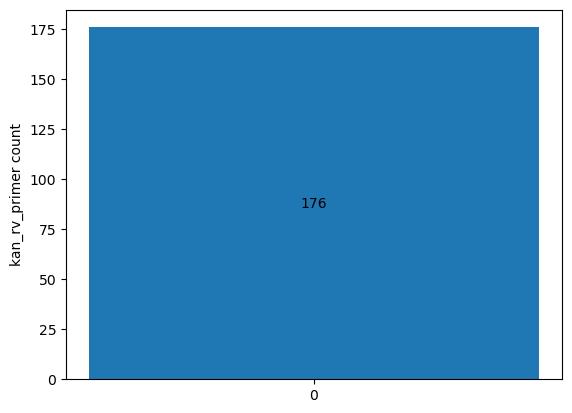

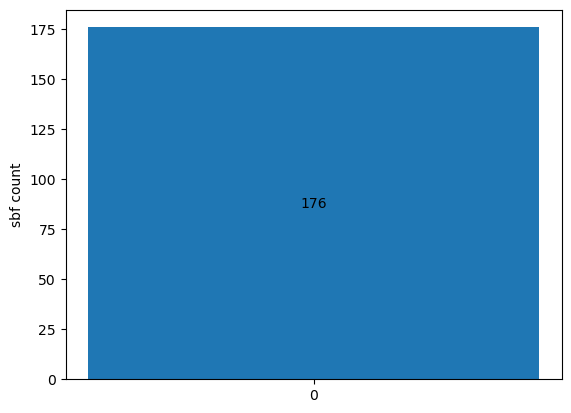

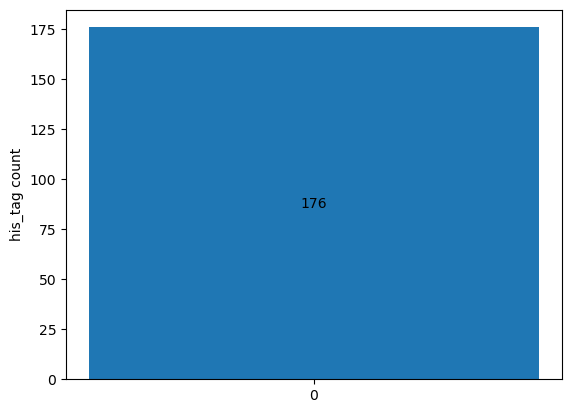

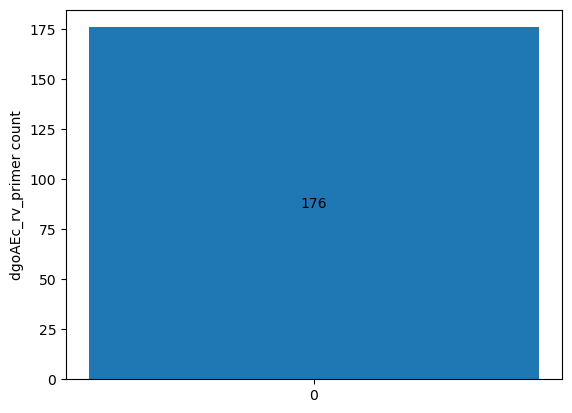

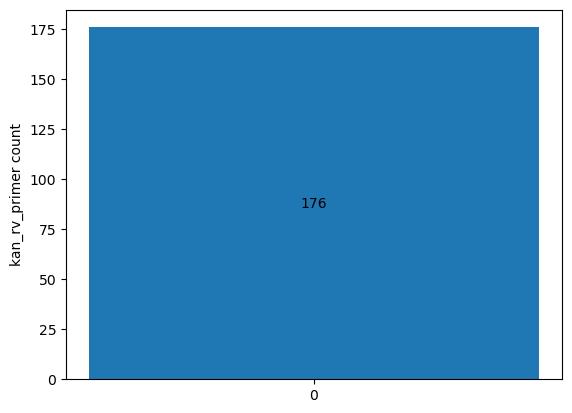

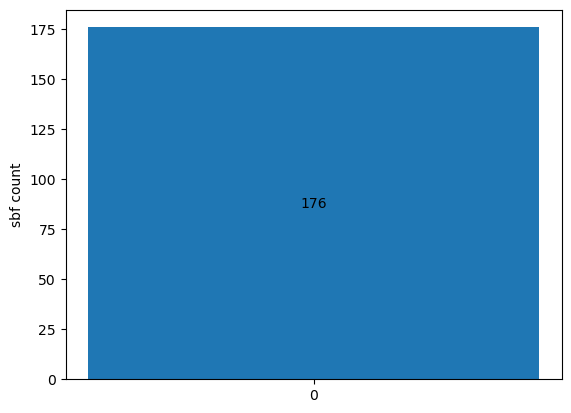

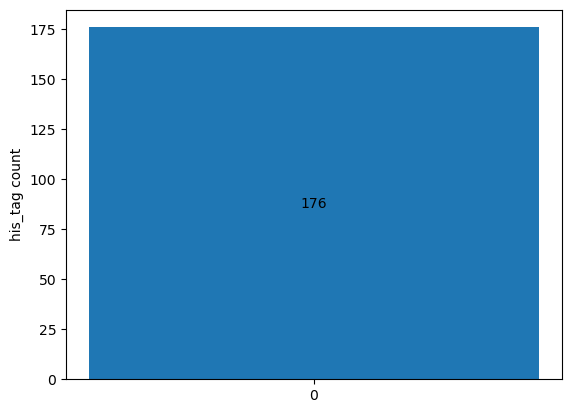

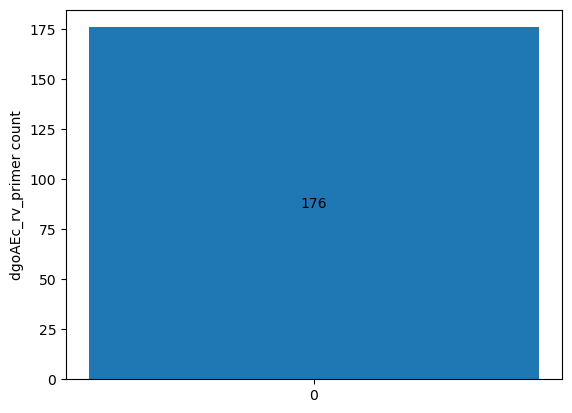

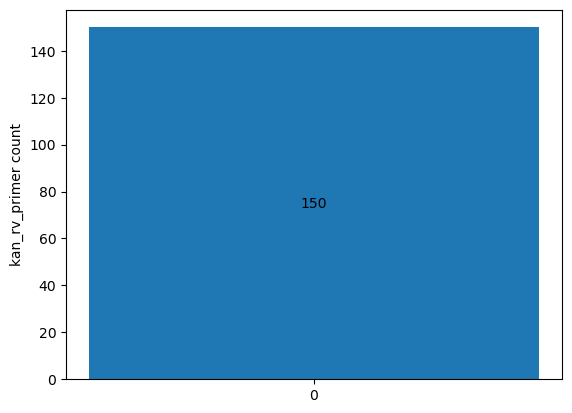

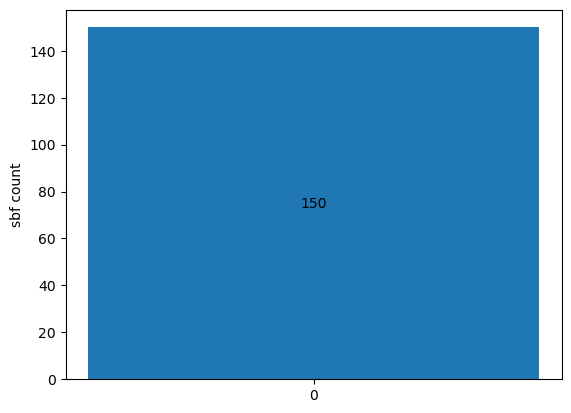

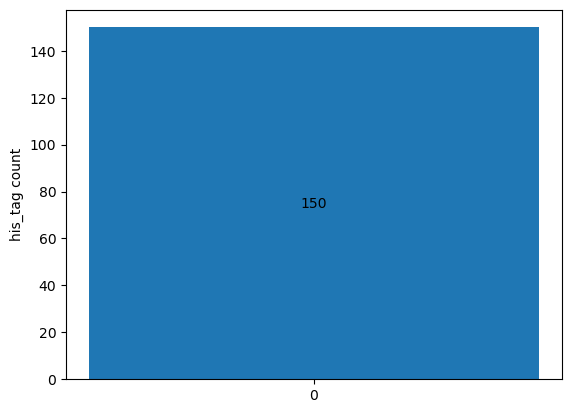

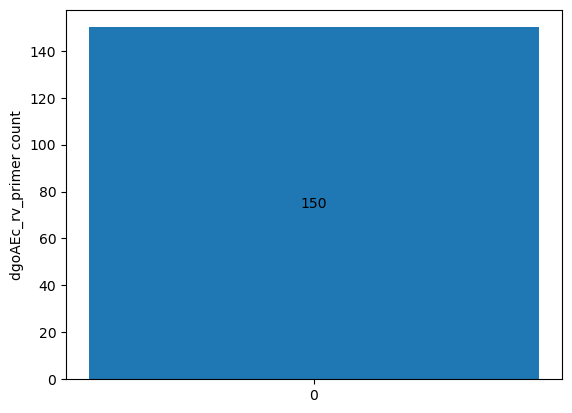

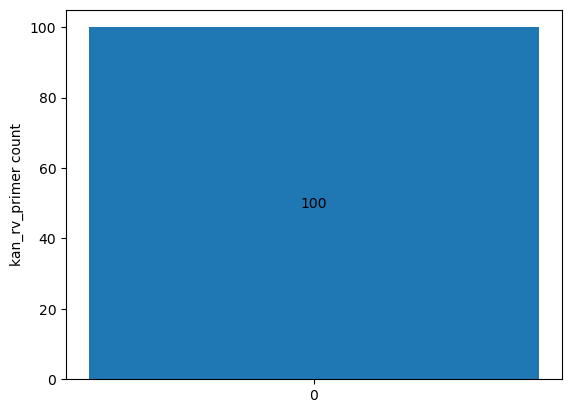

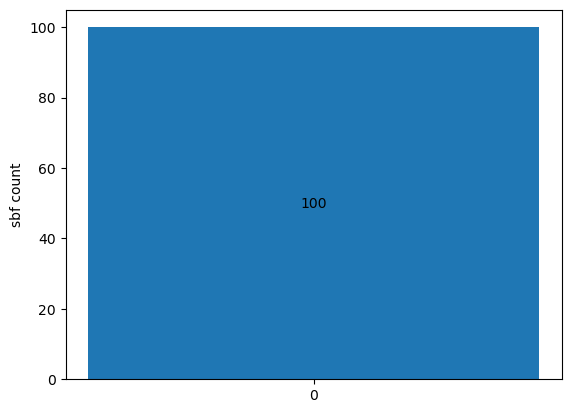

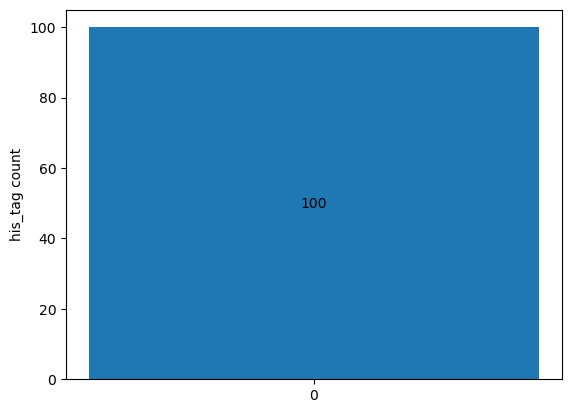

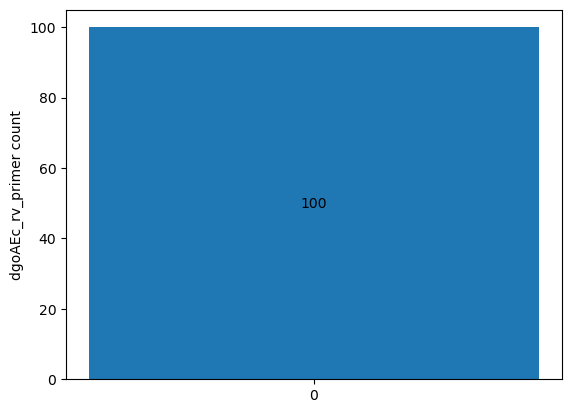

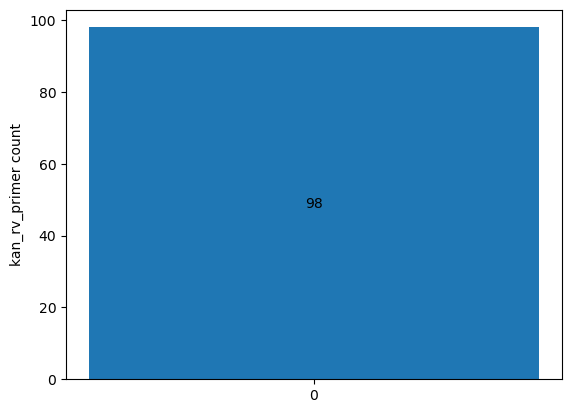

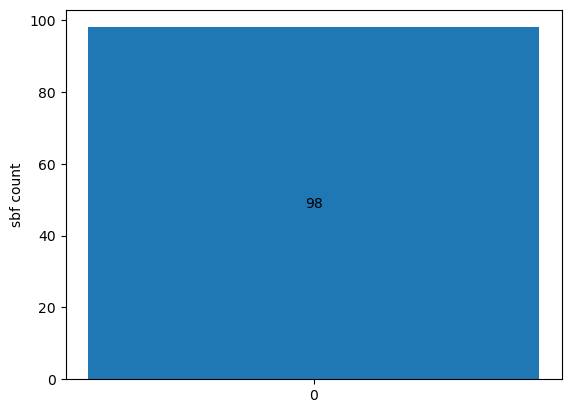

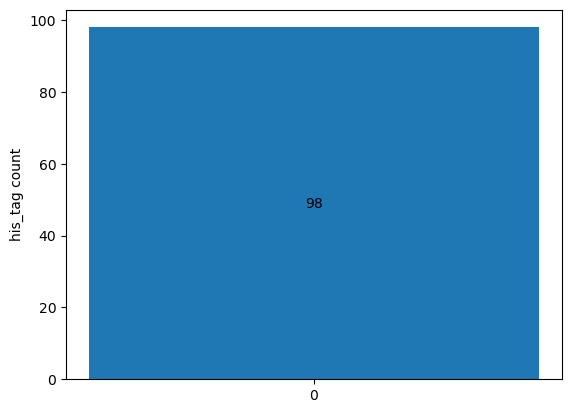

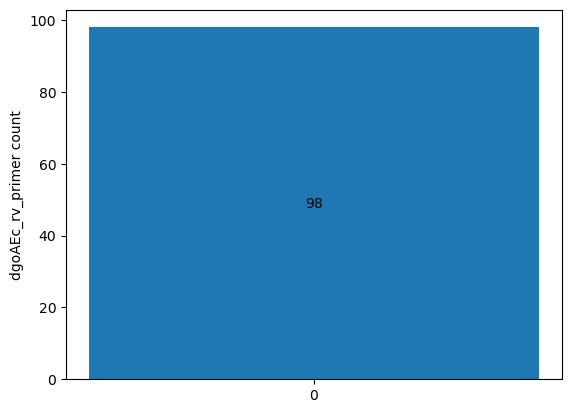

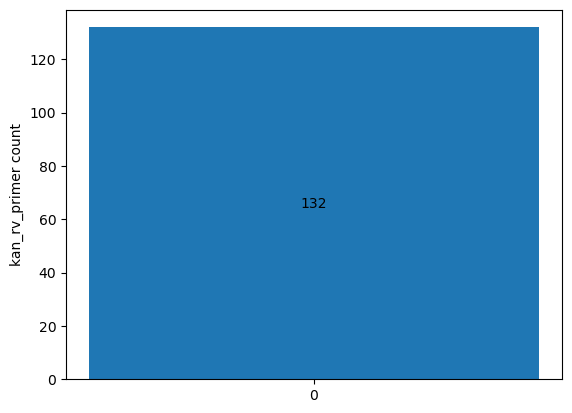

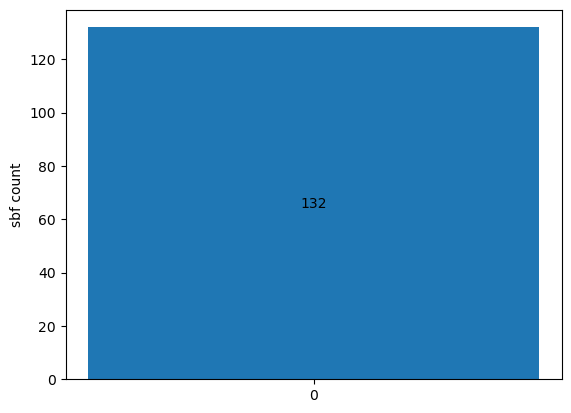

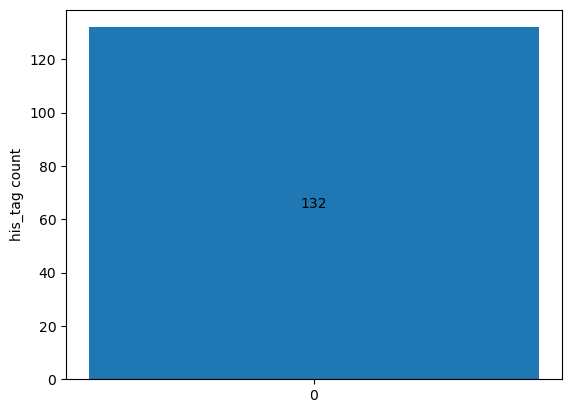

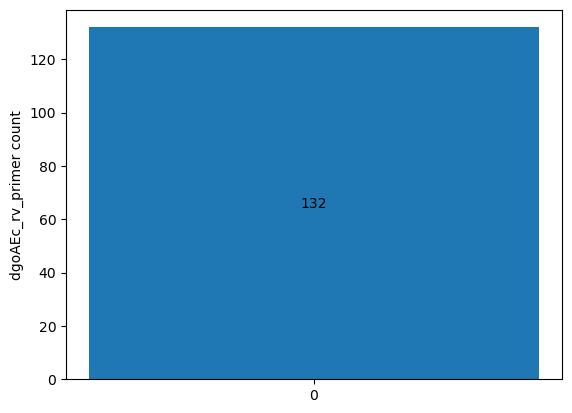

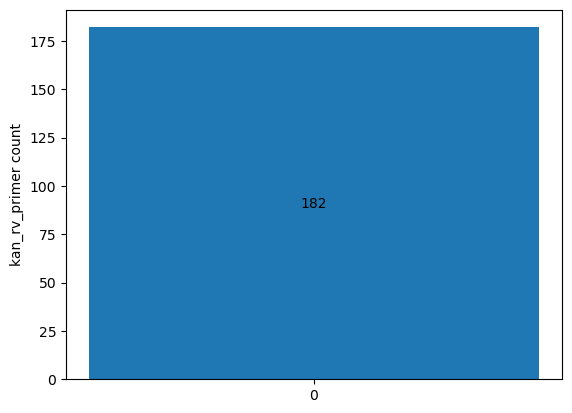

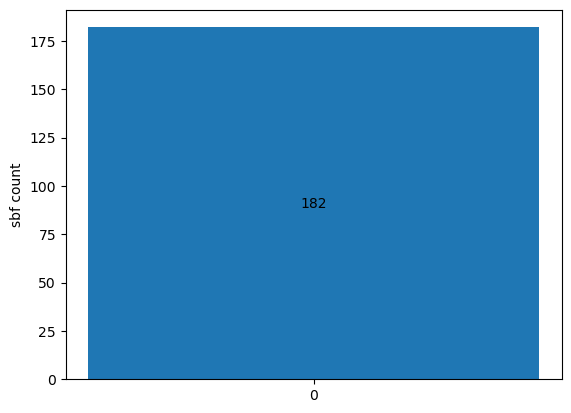

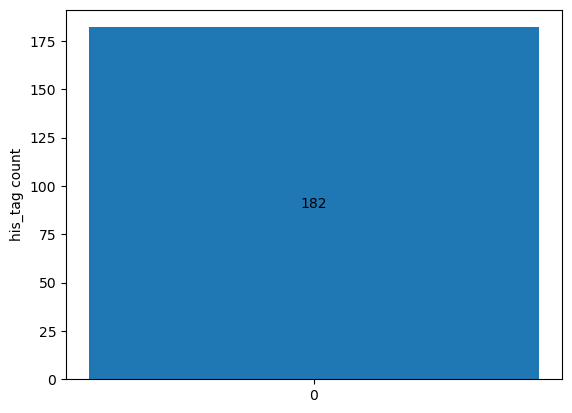

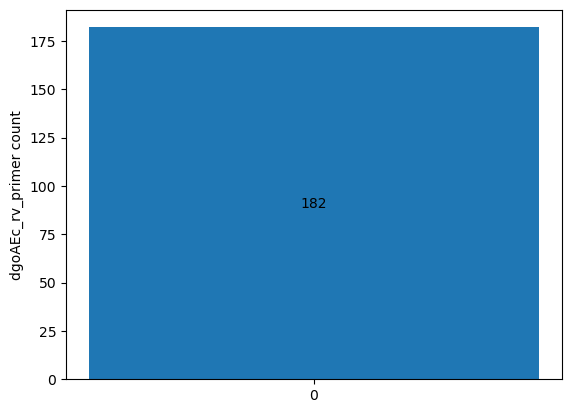

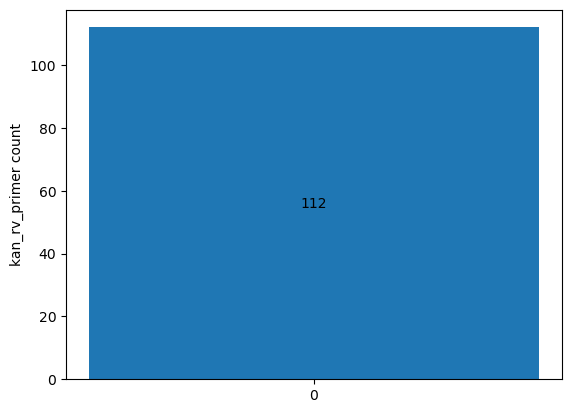

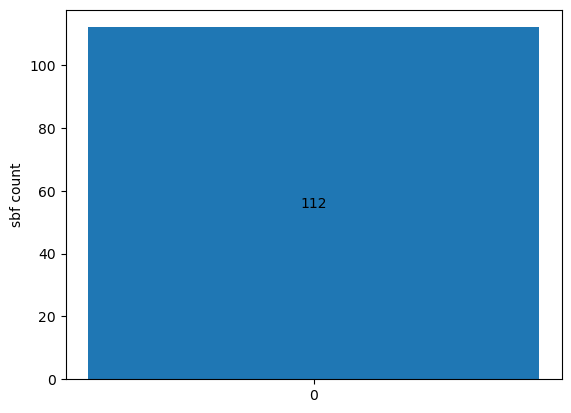

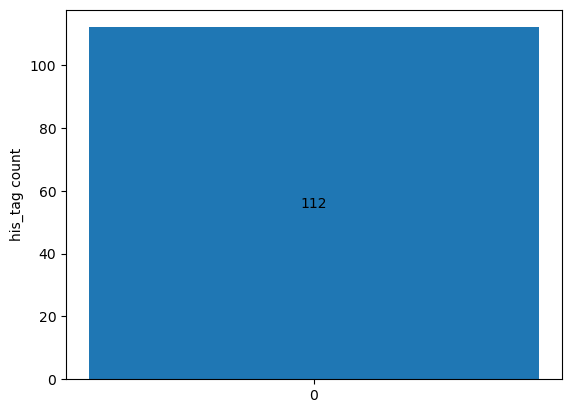

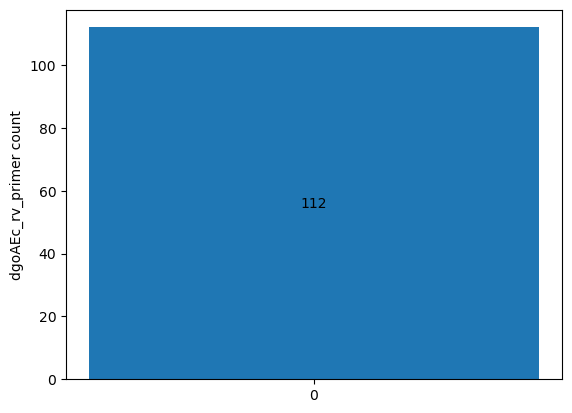

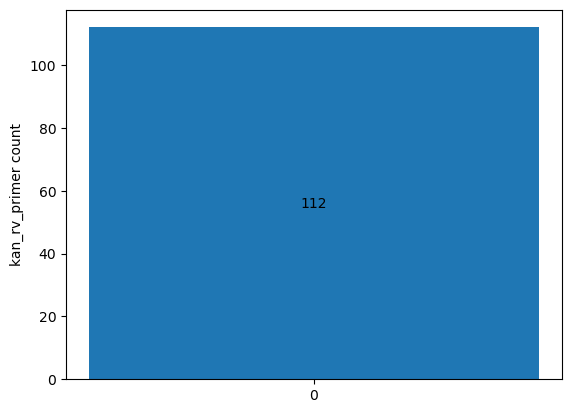

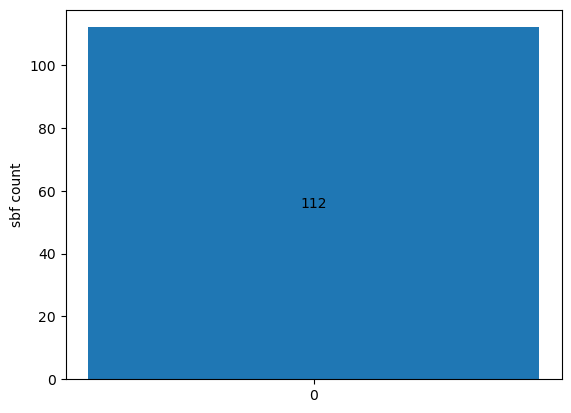

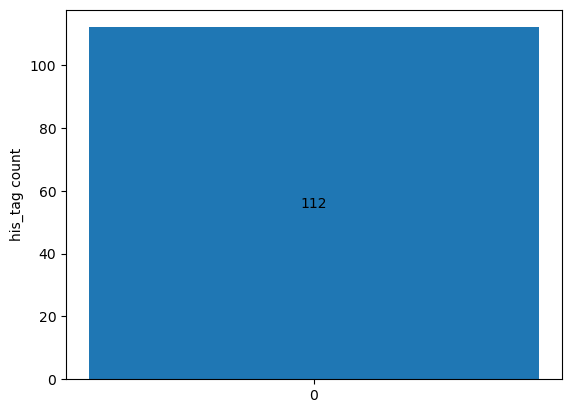

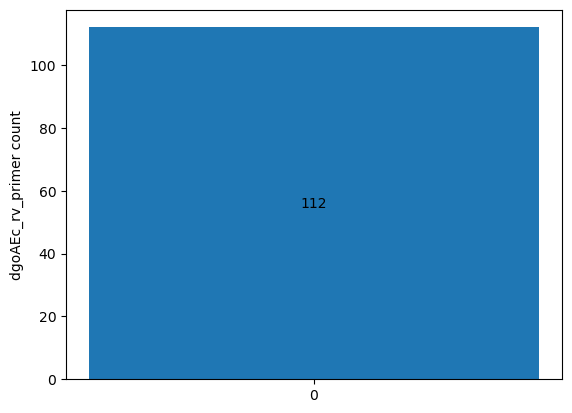

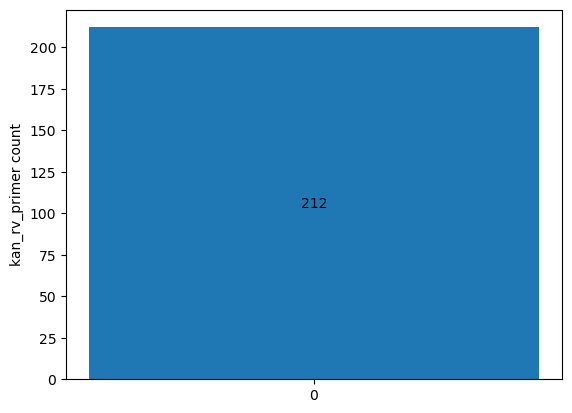

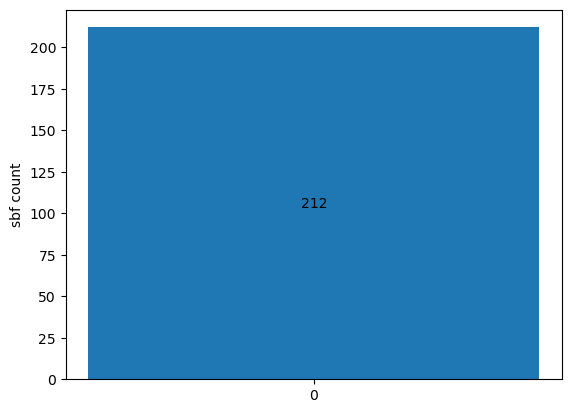

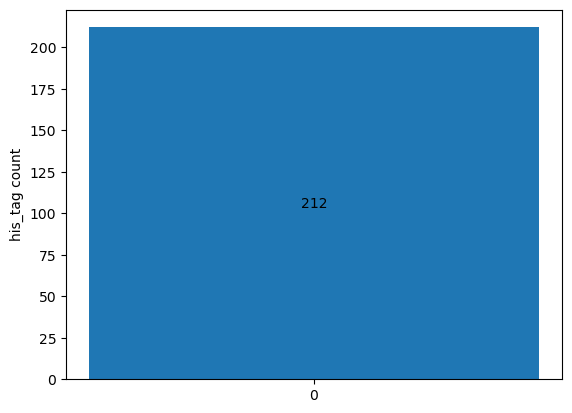

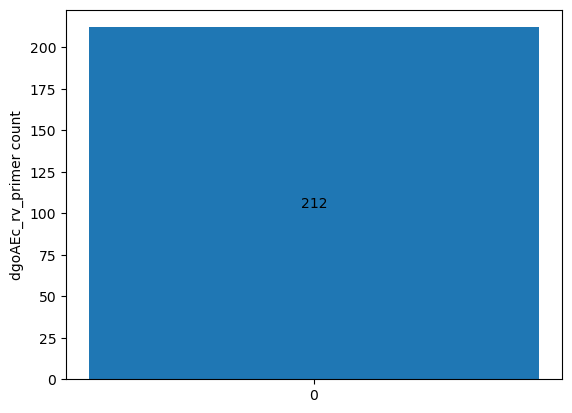

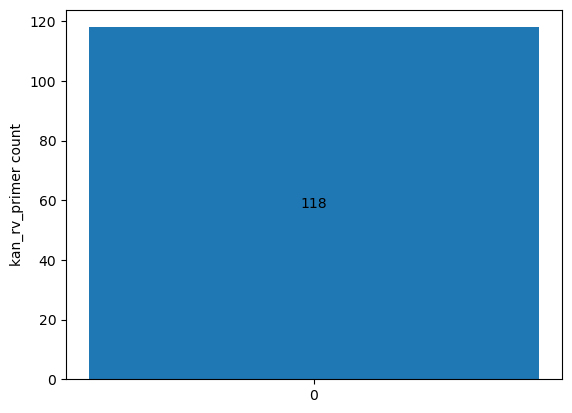

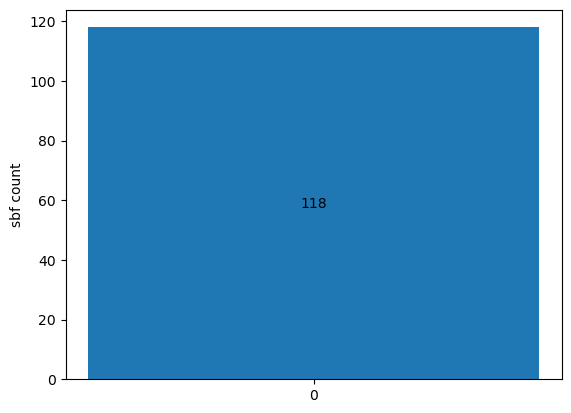

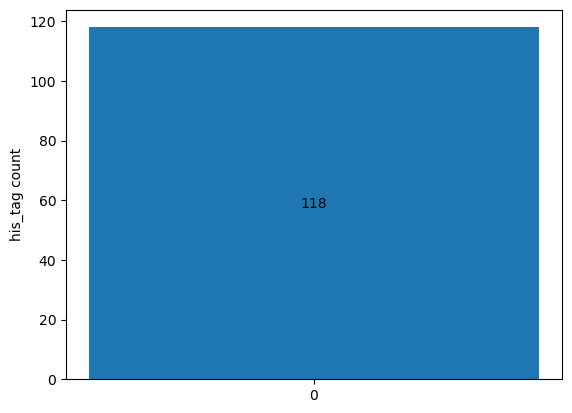

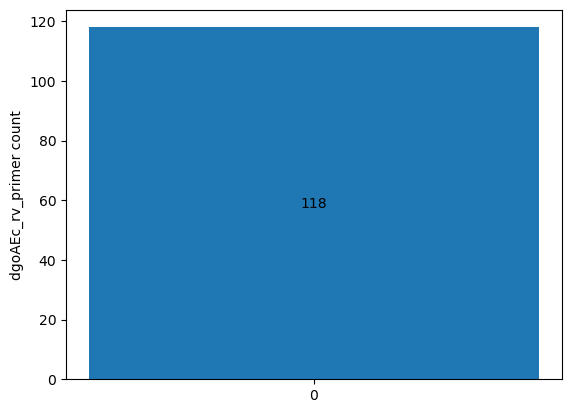

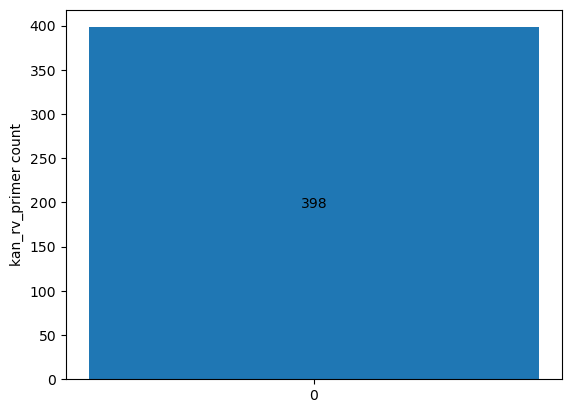

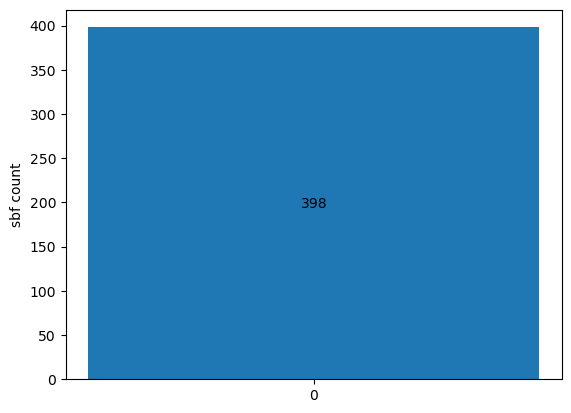

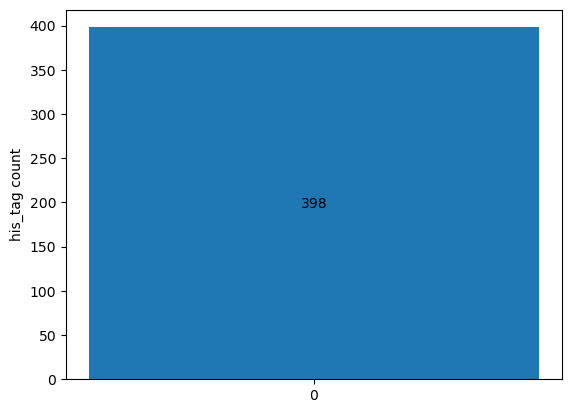

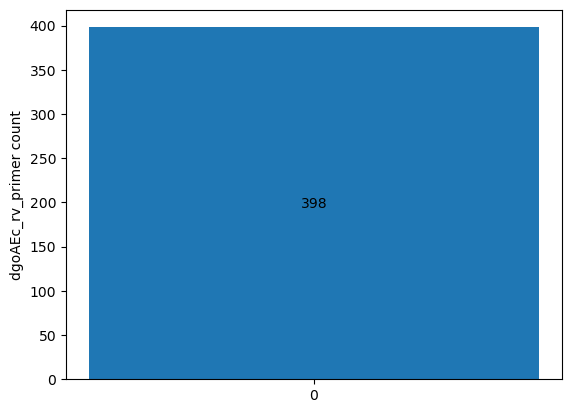

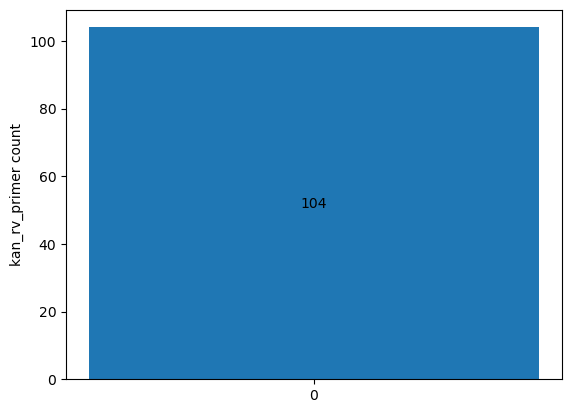

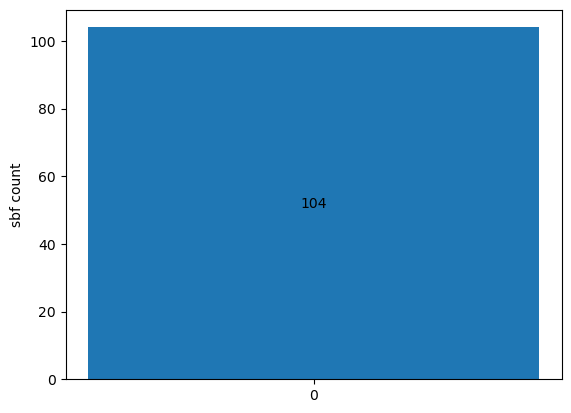

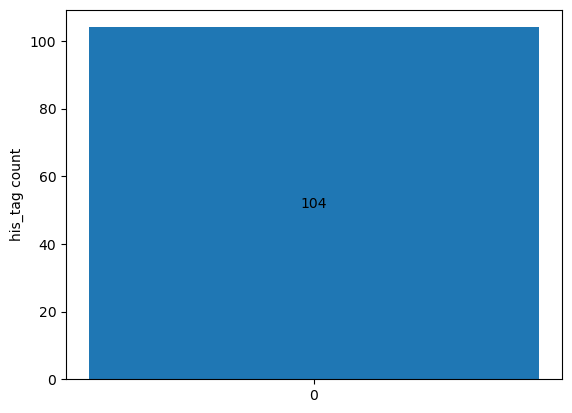

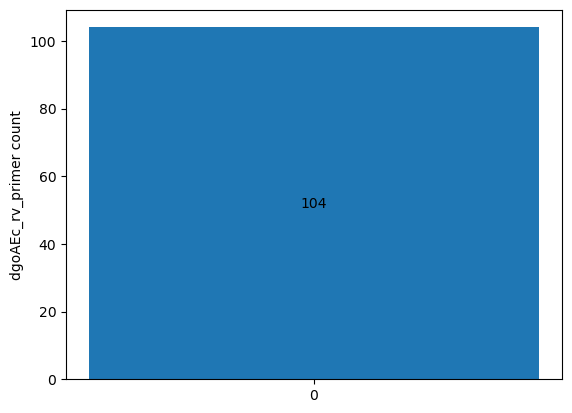

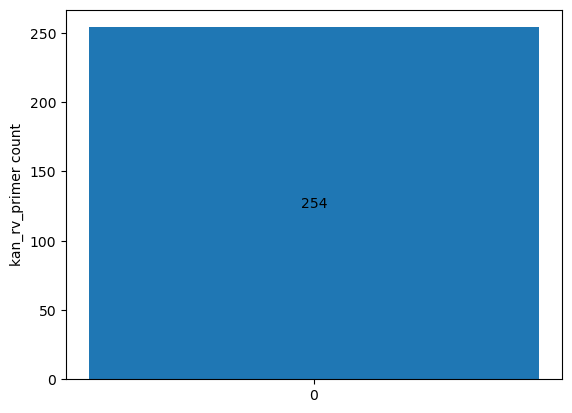

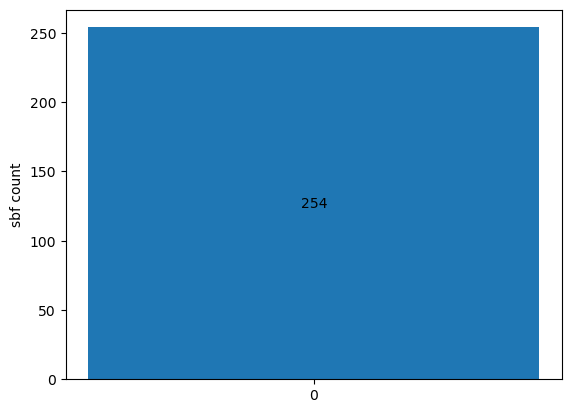

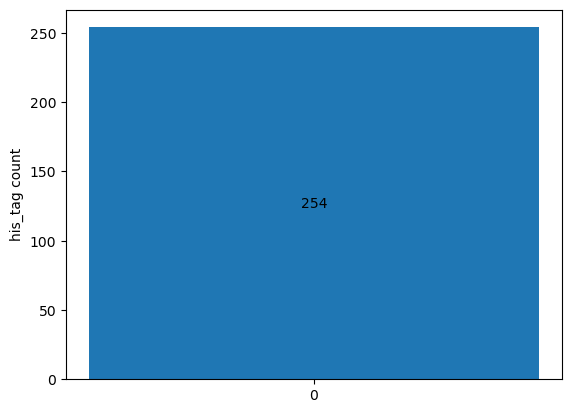

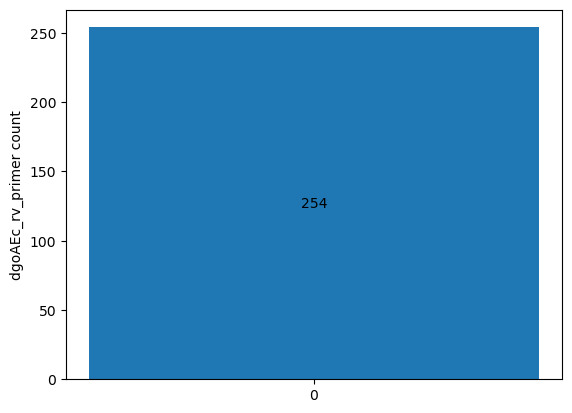

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [114]:
# Count features in two flank blast results and plot

from blast import count_features_in_blast_results, plot_feature_counts

[
    count_features_in_blast_results(
        x,
        features
    ).pipe(
        plot_feature_counts,
        features,
        out_pdf=x.replace('.tsv', '_feature_counts.pdf'),
        greaterorequal=False
    ) if count_features_in_blast_results(x, features) is not None else None
    for x in manifest['both_flanks_blast_results']
] 

In [115]:
# Count and sum features in both flanks blast results and add to manifest

from blast import count_features_in_blast_results

mean_feature_counts =[
    count_features_in_blast_results(
        x,
        features 
        )[list(features.keys())].mean()
    if count_features_in_blast_results(x, features) is not None else pd.Series(dict(zip(features.keys(), [None, None, None, None])))
    for x in manifest['both_flanks_blast_results']
]

mean_feature_counts = pd.DataFrame(mean_feature_counts)
mean_feature_counts.rename(columns={col: col+'_mean_both_flanks' for col in mean_feature_counts.columns}, inplace=True)

manifest = pd.concat([manifest, mean_feature_counts], axis=1)

File does not exist.
File does not exist.
File does not exist.
File does not exist.
File does not exist.


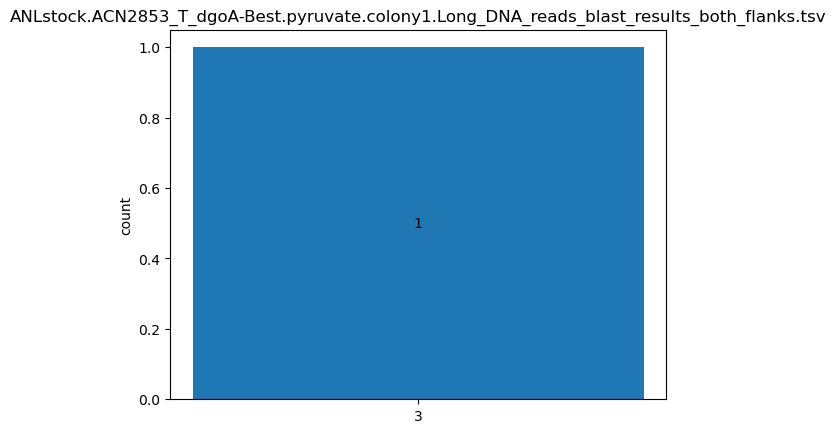

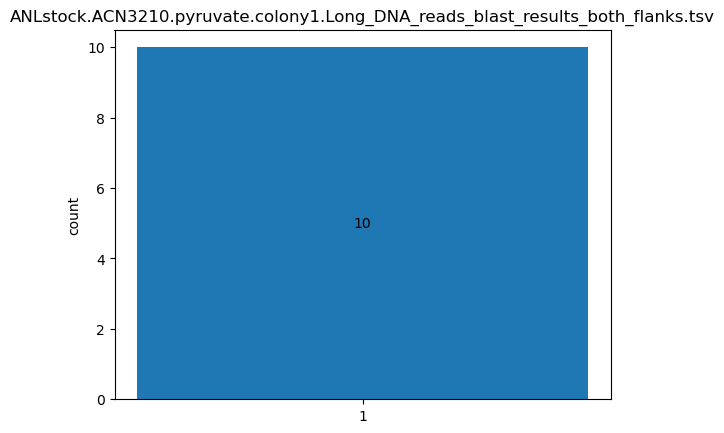

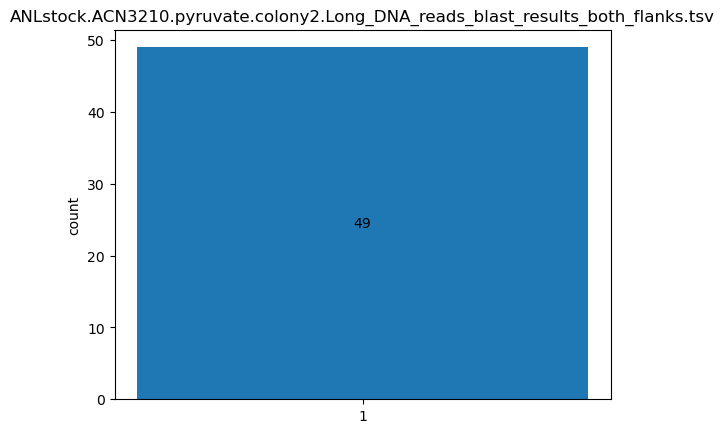

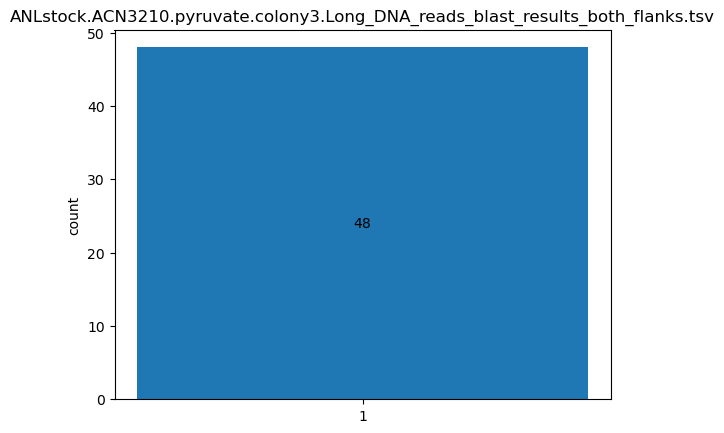

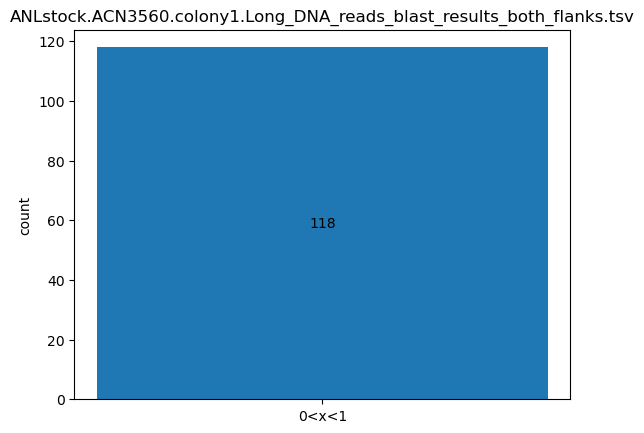

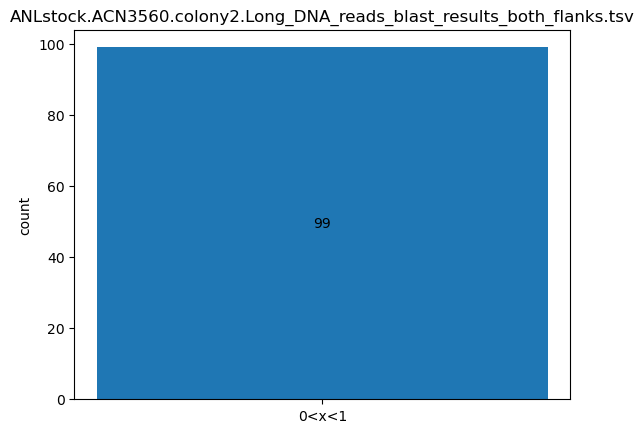

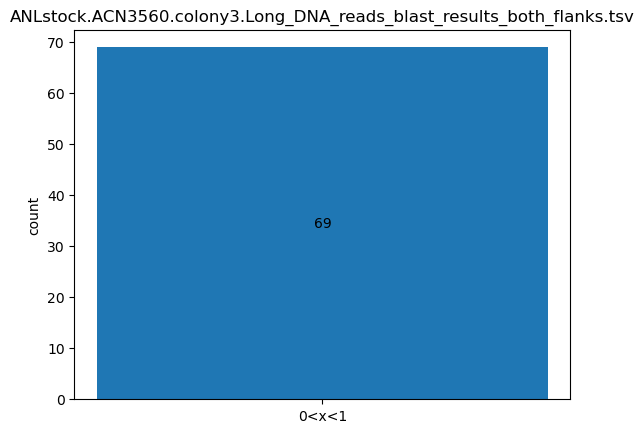

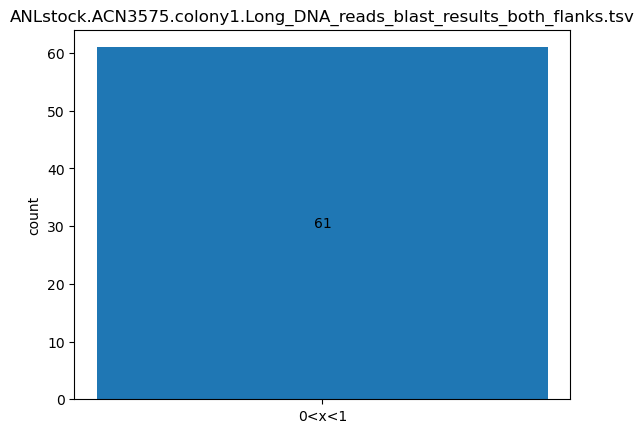

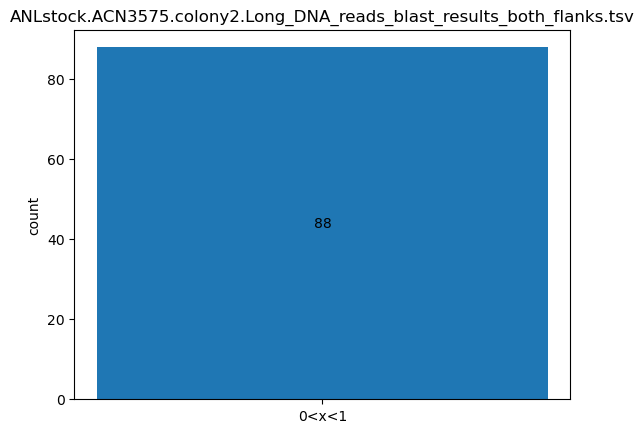

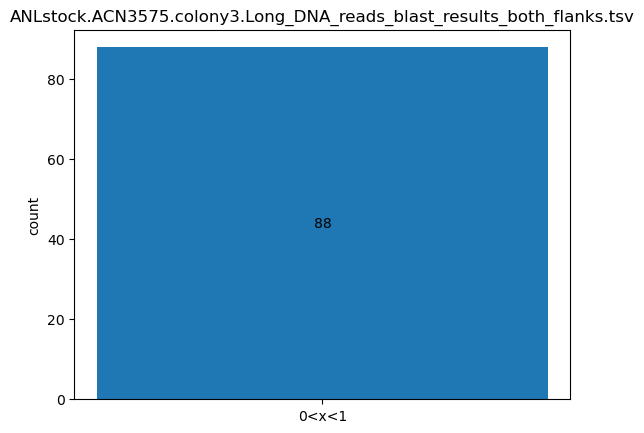

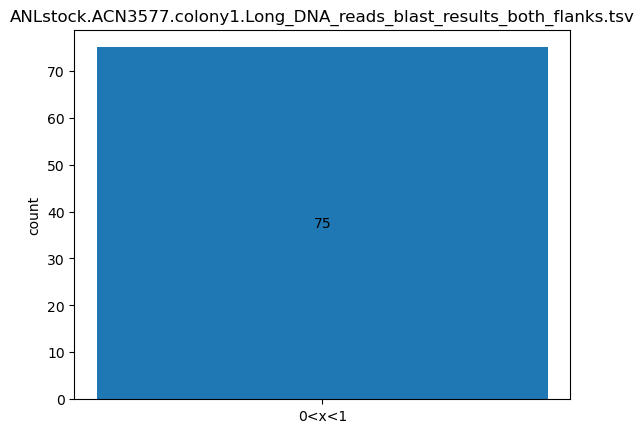

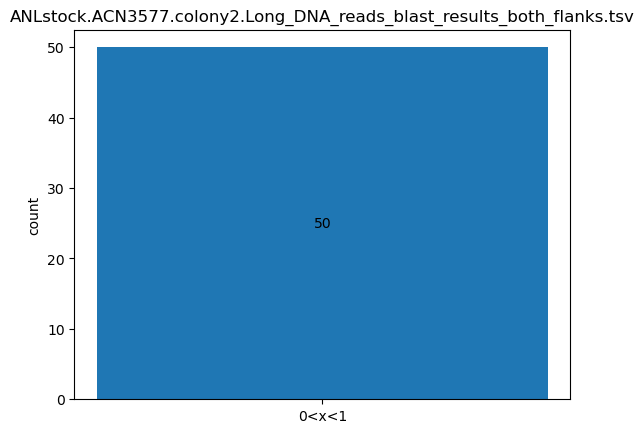

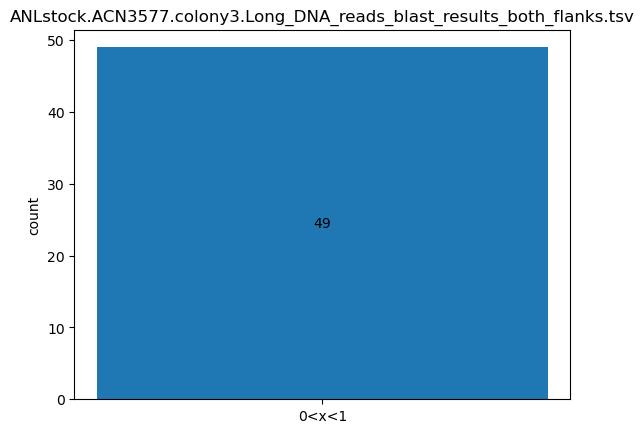

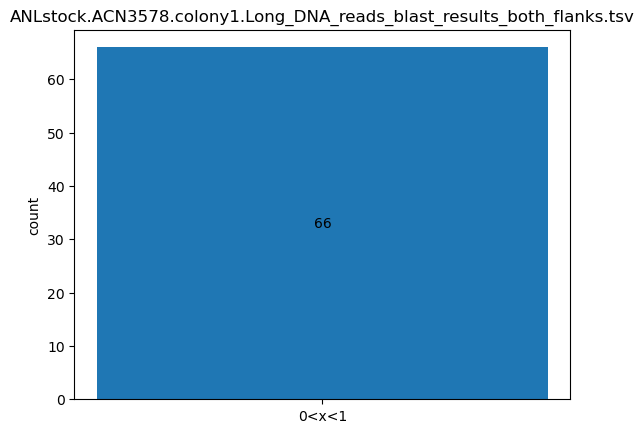

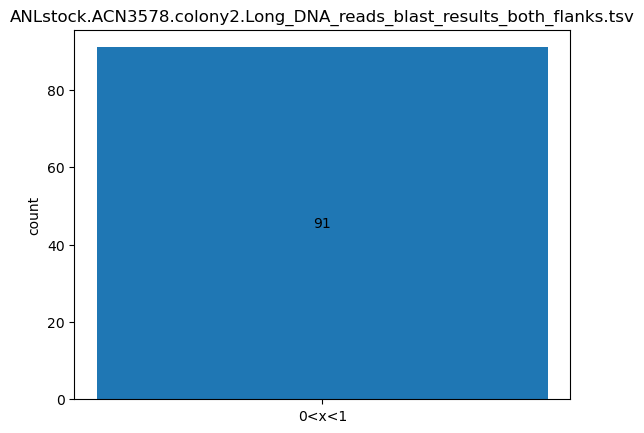

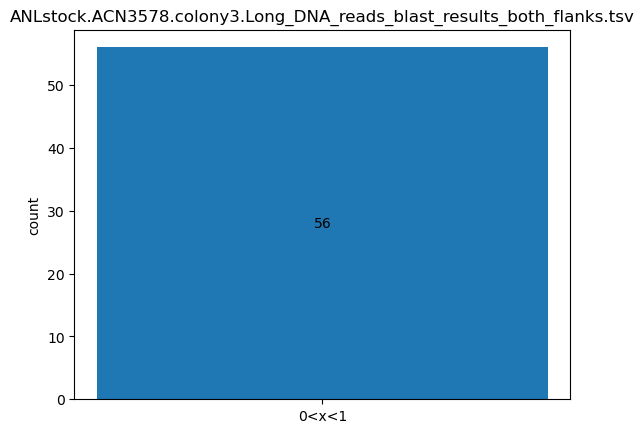

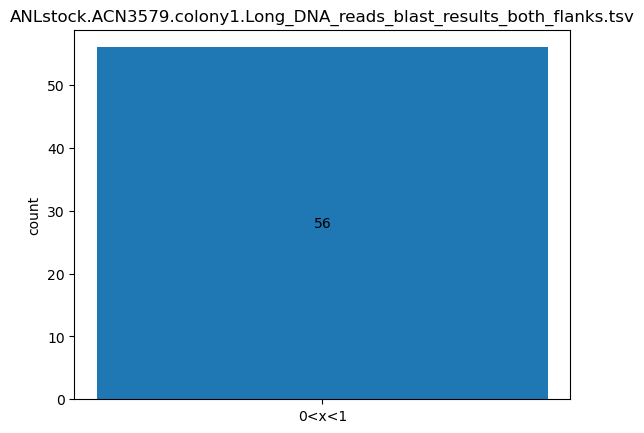

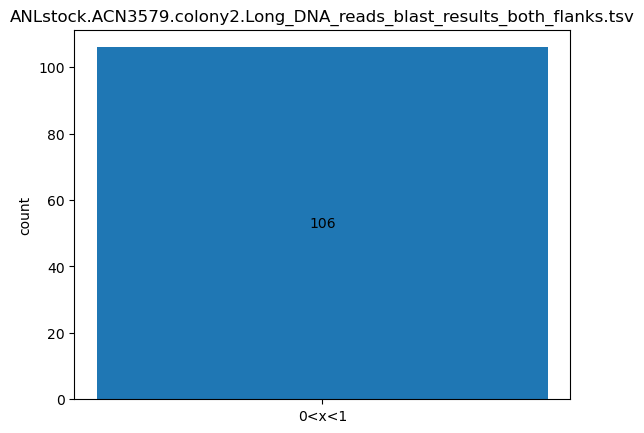

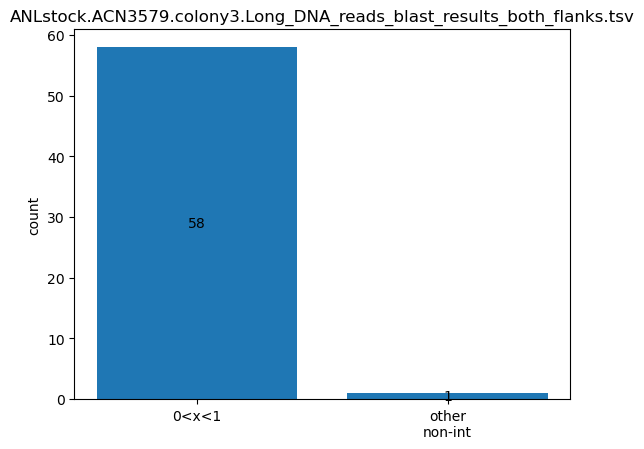

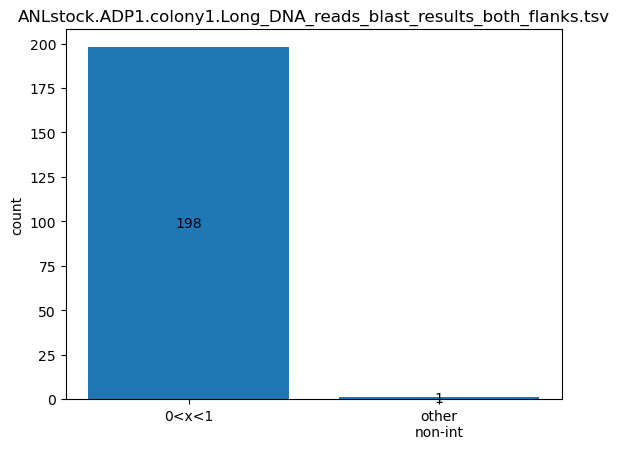

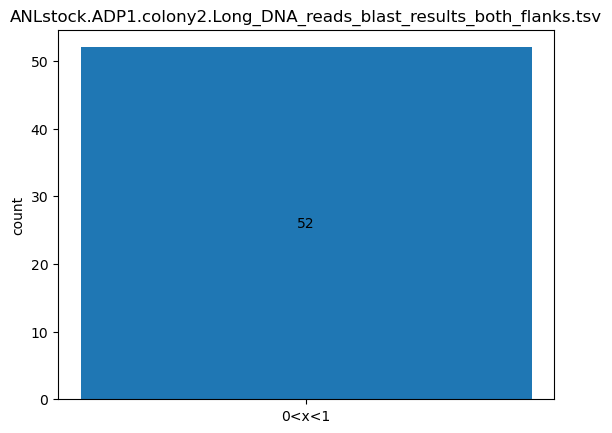

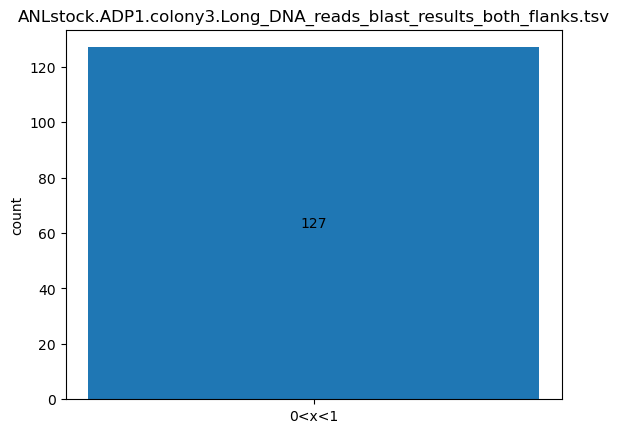

In [120]:
from blast import excise_insertion_seq

manifest['amplicon_multiple'] = [
    excise_insertion_seq(
        x,
        expect_amplicon_len = 6553,
        out_pdf = x.replace('.tsv', '_amplicon_multiples.pdf')
    )['n_amplicons'].mean()
    if x is not None else None
    for x in manifest['both_flanks_blast_results']
]

In [121]:
summary_name = os.path.join(base_dir, 'summary.csv')
manifest.to_csv(summary_name, index=False)
manifest

sample_name  \
0    ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads   
1    ANLstock.ACN2853.pyruvate.colony2.Long_DNA_reads   
2    ANLstock.ACN2853.pyruvate.colony3.Long_DNA_reads   
3   ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony1....   
4   ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony2....   
5   ANLstock.ACN2853_T_dgoA-Best.pyruvate.colony3....   
6    ANLstock.ACN3210.pyruvate.colony1.Long_DNA_reads   
7    ANLstock.ACN3210.pyruvate.colony2.Long_DNA_reads   
8    ANLstock.ACN3210.pyruvate.colony3.Long_DNA_reads   
9             ANLstock.ACN3560.colony1.Long_DNA_reads   
10            ANLstock.ACN3560.colony2.Long_DNA_reads   
11            ANLstock.ACN3560.colony3.Long_DNA_reads   
12            ANLstock.ACN3575.colony1.Long_DNA_reads   
13            ANLstock.ACN3575.colony2.Long_DNA_reads   
14            ANLstock.ACN3575.colony3.Long_DNA_reads   
15            ANLstock.ACN3577.colony1.Long_DNA_reads   
16            ANLstock.ACN3577.colony2.Long_DNA_reads   
17            ANLstock.ACN3577.colony3.Long_DNA_reads   
18            ANLstock.ACN3578.colony1.Long_DNA_reads   
19            ANLstock.ACN3578.colony2.Long_DNA_reads   
20            ANLstock.ACN3578.colony3.Long_DNA_reads   
21            ANLstock.ACN3579.colony1.Long_DNA_reads   
22            ANLstock.ACN3579.colony2.Long_DNA_reads   
23            ANLstock.ACN3579.colony3.Long_DNA_reads   
24               ANLstock.ADP1.colony1.Long_DNA_reads   
25               ANLstock.ADP1.colony2.Long_DNA_reads   
26               ANLstock.ADP1.colony3.Long_DNA_reads   

                                       nanopore_fastq  \
0   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
1   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
2   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
3   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
4   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
5   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
6   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
7   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
8   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
9   /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
10  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
11  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
12  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
13  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
14  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
15  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
16  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
17  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
18  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
19  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
20  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
21  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
22  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
23  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
24  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
25  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   
26  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   

                                        blast_results  n_reads  \
0   /Users/nataschaspahr/data/seq_data/Plasmidsaur...    75111   
1   /Users/nataschaspahr/data/seq_data/Plasmidsaur...    87920   
2   /Users/nataschaspahr/data/seq_data/Plasmidsaur...    66082   
3   /Users/nataschaspahr/data/seq_data/Plasmidsaur...    51495   
4   /Users/nataschaspahr/data/seq_data/Plasmidsaur...    49483   
5   /Users/nataschaspahr/data/seq_data/Plasmidsaur...    25866   
6   /Users/nataschaspahr/data/seq_data/Plasmidsaur...    20390   
7   /Users/nataschaspahr/data/seq_data/Plasmidsaur...    58105   
8   /Users/nataschaspahr/data/seq_data/Plasmidsaur...    53573   
9   /Users/nataschaspahr/data/seq_data/Plasmidsaur...    68618   
10  /Users/nataschaspahr/data/seq_data/Plasmidsaur...    48179   
11  /Users/nataschaspahr/data/seq_data/Plasmidsaur...   

## Investigations: Comparing low frequency mutation from long vs. short reads

**Hypothesis:** Illumina sequencing produces consistent sequencing errors that result in breseq calling low-frequency mutations. Because the sequencing chemistry in nanopore sequencing is very different, nanopore reads will not produce these kinds of mutations.

In [1]:
## Necessary for running locally (Natascha's laptop)
## Make sure running in appropriate environement

import sys

sys.path.append('/Users/nataschaspahr/code/ai_synbio_data_processing')

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
from breseq import run_breseq

reference = '/Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoAEcoli_NSS_dgoAasGene.gbk'
base_dir = '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F'
out_dir = os.path.join(base_dir, 'research', 'mutations_in_long_vs_short_reads', 'ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads')
os.makedirs('out_dir', exist_ok=True)
nanopore_fastq = '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/filtered/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads_nanopore_filtered.fastq.gz'

run_breseq(reference,
           out_dir,
           nanopore_fastq,
           '--long-read-split-length', '150',
           '--long-read-distribute-remainder',
           polymorphism_prediction=True,
           fold_coverage=300
           )

Running breseq with command: breseq -r /Users/nataschaspahr/Reference_DBs/genomes/ACN2821_CDM_dgoAEcoli_NSS_dgoAasGene.gbk /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/long_reads/filtered/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads_nanopore_filtered.fastq.gz --long-read-split-length 150 --long-read-distribute-remainder --genbank-field-for-seq-id ACCESSION --output /Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/research/mutations_in_long_vs_short_reads/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads -j 10 --polymorphism-prediction --limit-fold-coverage 300


breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

150 bases


----------------------------------> WARNING <-----------------------------------
CDS feature(s) found with nucleotide length(s) that are not a multiple of 3:
ACIAD_RS05600 (sohB), ACIAD_RS10750 (ACIAD_RS10750)

Translations of mutations in these genes may be incorrect.
It is recommended that you fix these feature annotations in your reference file!
Another solution is to mark them as pseudogenes:
  GenBank: add '/pseudo' as a new line within the CDS feature
  GFF3: add 'Pseudo=true' to the semicolon-separated list at the end of the CDS line.
--------------------------------------------------------------------------------
+++   NOW PROCESSING Read alignment to reference genome
[system] bowtie2-build -q "/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/research/mutations_in_long_vs_short_reads/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads/data/reference.fasta" "/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/research/mutations_in_long_vs_short_reads/

Preprocessing alignments.


    ALIGNED READ:100000
    ALIGNED READ:200000
    ALIGNED READ:300000
    ALIGNED READ:400000
    ALIGNED READ:500000
    ALIGNED READ:600000
    ALIGNED READ:700000
    ALIGNED READ:800000
    ALIGNED READ:900000
    ALIGNED READ:1000000
    ALIGNED READ:1100000
    ALIGNED READ:1200000
    ALIGNED READ:1300000
    ALIGNED READ:1400000
    ALIGNED READ:1500000
    ALIGNED READ:1600000
    ALIGNED READ:1700000
    ALIGNED READ:1800000
    ALIGNED READ:1900000
    ALIGNED READ:2000000
    ALIGNED READ:2100000
    ALIGNED READ:2200000
    ALIGNED READ:2300000
    ALIGNED READ:2400000
    ALIGNED READ:2500000
    ALIGNED READ:2600000
    ALIGNED READ:2700000
    ALIGNED READ:2800000
    ALIGNED READ:2900000
    ALIGNED READ:3000000
    ALIGNED READ:3100000
    ALIGNED READ:3200000
    ALIGNED READ:3300000
    ALIGNED READ:3400000
    ALIGNED READ:3500000
    ALIGNED READ:3600000
    ALIGNED READ:3700000
    ALIGNED READ:3800000
    ALIGNED READ:3900000
    ALIGNED READ:4000000
    ALIGN

rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!
rejected!


Drawing coverage plots...
Creating coverage plot for region: NC_005966:1-3599271
Creating evidence file: SNP_2.html
Creating evidence file: DEL_3.html
Creating evidence file: DEL_6.html
Creating read alignment for region: NC_005966:99454.0-99454.0
Creating read alignment for region: NC_005966:130508.0-130508.0
Creating read alignment for region: NC_005966:177651.0-177651.0
Creating evidence file: INS_9.html
Creating read alignment for region: NC_005966:178461.1-178461.3
Creating evidence file: DEL_10.html
Creating read alignment for region: NC_005966:185087.0-185087.0
Creating evidence file: SNP_15.html
Creating read alignment for region: NC_005966:261022.0-261022.0
Creating evidence file: INS_17.html
Creating read alignment for region: NC_005966:306868.1-306868.3
Creating evidence file: DEL_18.html
Creating read alignment for region: NC_005966:318718.0-318718.0
Creating evidence file: SNP_19.html
Creating read alignment for region: NC_005966:356636.0-356636.0
Creating evidence file: S

'/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/research/mutations_in_long_vs_short_reads/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads'

In [6]:
# Before doing the genome diff file comparison, must rename files so that they are named correctly in the html output
# Also, must replace '.' in file names, else everything after '.' is discarded

import shutil

old_gdiff_long = '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/research/mutations_in_long_vs_short_reads/ANLstock.ACN2853.pyruvate.colony1.Long_DNA_reads/output/output.gd'
new_gdiff_long = '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/research/mutations_in_long_vs_short_reads' + '/ACN2853_colony1_long.gd'
shutil.copy(old_gdiff_long, new_gdiff_long)

old_gdiff_short = '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/short_reads/breseq/ANLstock.ACN2853.pyruvate.colony1.Short_DNA_reads/output/output.gd'
new_gdiff_short = '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/research/mutations_in_long_vs_short_reads' + '/ACN2853_colony1_short.gd'
shutil.copy(old_gdiff_short, new_gdiff_short)

'/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/research/mutations_in_long_vs_short_reads/ACN2853_colony1_short.gd'

In [7]:
from breseq import compare_gdiff

out_dir = '/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/research/mutations_in_long_vs_short_reads/ACN2853_colony1_longVshort.html'

compare_gdiff(
    reference,
    out_dir,
    [new_gdiff_long, new_gdiff_short]
)

breseq 0.39.0     http://barricklab.org/breseq

Active Developers: Barrick JE, Deatherage DE
Contact:           <jeffrey.e.barrick@gmail.com>

breseq is free software; you can redistribute it and/or modify it under the
terms the GNU General Public License as published by the Free Software 
Foundation; either version 2, or (at your option) any later version.

Copyright (c) 2008-2010 Michigan State University
Copyright (c) 2011-2022 The University of Texas at Austin

If you use breseq in your research, please cite:

  Deatherage, D.E., Barrick, J.E. (2014) Identification of mutations
  in laboratory-evolved microbes from next-generation sequencing
  data using breseq. Methods Mol. Biol. 1151: 165–188.

If you use structural variation (junction) predictions, please cite:

  Barrick, J.E., Colburn, G., Deatherage D.E., Traverse, C.C.,
  Strand, M.D., Borges, J.J., Knoester, D.B., Reba, A., Meyer, A.G. 
  (2014) Identifying structural variation in haploid microbial genomes 
  from short-rea

'/Users/nataschaspahr/data/seq_data/Plasmidsaurus_9-13-2025_HTGS8F/research/mutations_in_long_vs_short_reads/ACN2853_colony1_longVshort.html'

In [23]:
samples = input()

In [24]:
samples

'TFMN1.fba.P44L.1, TFMN1.fba.P44L.2, TFMN1.fba.P44L.4, TFMN1.fba.P44L.3, TFMN1.fba.P44L.5 TFMN1.fba.P44L.1, TFMN1.fba.P44L.2, TFMN1.fba.P44L.4, TFMN1.fba.P44L.3, TFMN1.fba.P44L.5 TFMN1.fba.P44L.1, TFMN1.fba.P44L.2, TFMN1.fba.P44L.4, TFMN1.fba.P44L.3, TFMN1.fba.P44L.5 TFMN1.fba.P44L.1, TFMN1.fba.P44L.2, TFMN1.fba.P44L.4, TFMN1.fba.P44L.3, TFMN1.fba.P44L.5 TFMN1.fba.P44L.1, TFMN1.fba.P44L.2, TFMN1.fba.P44L.4, TFMN1.fba.P44L.3, TFMN1.fba.P44L.5 TFMN1.sohB.truncation.1, TFMN1.sohB.truncation.2, TFMN1.sohB.truncation.3, TFMN1.sohB.truncation.4, TFMN1.sohB.truncation.5 TFMN1.sohB.truncation.1, TFMN1.sohB.truncation.2, TFMN1.sohB.truncation.3, TFMN1.sohB.truncation.4, TFMN1.sohB.truncation.5 TFMN1.sohB.truncation.1, TFMN1.sohB.truncation.2, TFMN1.sohB.truncation.3, TFMN1.sohB.truncation.4, TFMN1.sohB.truncation.5 TFMN1.sohB.truncation.1, TFMN1.sohB.truncation.2, TFMN1.sohB.truncation.3, TFMN1.sohB.truncation.4, TFMN1.sohB.truncation.5 TFMN1.sohB.truncation.1, TFMN1.sohB.truncation.2, TFMN1.so

In [22]:
samples = samples.split(' ')

for i in [x.replace('.truncation', '').replace('.A177V', '').replace('.G275D', '').replace('.P44L', '') for x in samples]:
    print(i)

TFMN1.fba.1,
TFMN1.fba.2,
TFMN1.fba.4,
TFMN1.fba.3,
TFMN1.fba.5
TFMN1.fba.1,
TFMN1.fba.2,
TFMN1.fba.4,
TFMN1.fba.3,
TFMN1.fba.5
TFMN1.fba.1,
TFMN1.fba.2,
TFMN1.fba.4,
TFMN1.fba.3,
TFMN1.fba.5
TFMN1.fba.1,
TFMN1.fba.2,
TFMN1.fba.4,
TFMN1.fba.3,
TFMN1.fba.5
TFMN1.fba.1,
TFMN1.fba.2,
TFMN1.fba.4,
TFMN1.fba.3,
TFMN1.fba.5
TFMN1.sohB.1,
TFMN1.sohB.2,
TFMN1.sohB.3,
TFMN1.sohB.4,
TFMN1.sohB.5
TFMN1.sohB.1,
TFMN1.sohB.2,
TFMN1.sohB.3,
TFMN1.sohB.4,
TFMN1.sohB.5
TFMN1.sohB.1,
TFMN1.sohB.2,
TFMN1.sohB.3,
TFMN1.sohB.4,
TFMN1.sohB.5
TFMN1.sohB.1,
TFMN1.sohB.2,
TFMN1.sohB.3,
TFMN1.sohB.4,
TFMN1.sohB.5
TFMN1.sohB.1,
TFMN1.sohB.2,
TFMN1.sohB.3,
TFMN1.sohB.4,
TFMN1.sohB.5
TFMN1.pgi.1,
TFMN1.pgi.2,
TFMN1.pgi.3,
TFMN1.pgi.4,
TFMN1.pgi.5
TFMN1.pgi.1,
TFMN1.pgi.2,
TFMN1.pgi.3,
TFMN1.pgi.4,
TFMN1.pgi.5
TFMN1.pgi.1,
TFMN1.pgi.2,
TFMN1.pgi.3,
TFMN1.pgi.4,
TFMN1.pgi.5
TFMN1.pgi.1,
TFMN1.pgi.2,
TFMN1.pgi.3,
TFMN1.pgi.4,
TFMN1.pgi.5
TFMN1.pgi.1,
TFMN1.pgi.2,
TFMN1.pgi.3,
TFMN1.pgi.4,
TFMN1.pgi.5
TFMN1.tpiA.1,
T